In [1]:
# import general packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# to manage directories and save/load data
import glob
import pickle as pkl

# import pandas to manage xls files
import pandas as pd

# import optimizer
from scipy.optimize import curve_fit

In [2]:
from rt_module import rt_data_manage as rdm

In [3]:
# create the database or load the database file 
db_folder = 'Real_time_data/Database/'
db_filename = 'LAMP_COVID'        # current or new database name
#db_filename = 'database_BstLF'

db_name = 'BstLF COVID experiments'
db_description = 'this database include experiments and analysis performed around BstLF home made production and testing on RT-LAMP COVID detection'

database = rdm.load_or_create_database(db_folder, db_filename, db_name=db_name, db_description=db_description)
    


Database " LAMP_COVID.pkl " is currently in the folder

do you want to load it? (y/n): y

Database " LAMP_COVID.pkl " was succefully loaded


In [4]:
rdm.print_list(database.list_names)

[0] wells
[1] well_sets
[2] figures
[3] components
[4] reactions
[5] enzymes


to add elements to the previous list use  `database.append_objs()`<br>
to add new list elements use `database.add_element(element, list_name)`<br>
to save or uptdate the database use `database.save()`<br>

In [5]:
## Indicated by the user:
file_type ='xlsx' 
books_folder_path  = 'Real_time_data/Raw_data/BstLF_experiments/'  #folder where databooks are stored 
files =glob.glob1(books_folder_path,"*."+file_type)

## just to display
rdm.print_list(files)

[0] BstLF_MMLV_matrix_data_R1.xlsx
[1] BstLF_MMLV_matrix_R2_data.xlsx
[2] BstLF_MMLV_matrix_R3_data.xlsx
[3] Bst_Units_1_data.xlsx
[4] Bst_Units_2_data.xlsx
[5] Bst_Units_3_data.xlsx
[6] N2_dilutions_pretest.xlsx
[7] RT-LAMP_screaning_data.xlsx


In [6]:
fnumber = 3      # put the desired number from the previous list

################################################
fname = books_folder_path + files[fnumber]

p_file = pd.read_excel(fname, sheet_name = None, index_col=None, header=None)
sheet_names = list(p_file.keys())

## just to display

print(fname+'\n')
print('Available Sheets: \n')

rdm.print_list(sheet_names)

Real_time_data/Raw_data/BstLF_experiments/Bst_Units_1_data.xlsx

Available Sheets: 

[0] Sample Setup
[1] Results
[2] Raw Data
[3] Multicomponent Data
[4] Amplification Data
[5] BioGroup Analysis Result
[6] Technical Analysis Result
[7] Melt Region Temperature Data
[8] Melt Region Normalized Data
[9] Melt Region Derivative Data


In [7]:
#enter the number of the sheet of interest
ws_number = 1

### make the assignation ##
ws_name = sheet_names[ws_number]
s_sheet = p_file[ws_name]

# display
s_sheet

0   \
0                    Block Type   
1                     Chemistry   
2          Experiment File Name   
3       Experiment Run End Time   
4               Instrument Type   
5             Passive Reference   
6                           NaN   
7                          Well   
8                            A1   
9                            A2   
10                           A3   
11                           A4   
12                           B1   
13                           B2   
14                           B3   
15                           B4   
16                           C1   
17                           C2   
18                           C3   
19                           C4   
20                           C5   
21                           D1   
22                           D2   
23                           D3   
24                           D4   
25                           D5   
26                           E1   
27                           E2   
28                           E3   
29                           E4   
30                           E5   
31                           F1   
32                           F2   
33                           F3   
34                           F4   
35                           F5   
36                           G1   
37                           G2   
38                           G3   
39                           G4   
40                           G5   
41                           H1   
42                           H2   
43                           H3   
44                           H4   
45                          NaN   
46                Analysis Type   
47           Endogenous Control   
48  RQ Min/Max Confidence Level   
49             Reference Sample   

                                                   1                   2   \
0                                              96well                 NaN   
1                                          SYBR_GREEN                 NaN   
2   D:\Applied Biosystems\StepOne Software v2.2\ex...                 NaN   
3                          2020-08-24 21:27:12 PM PDT                 NaN   
4                                         steponeplus                 NaN   
5                                                 NaN                 NaN   
6                                                 NaN                 NaN   
7                                         Sample Name         Target Name   
8                                             Bst2-B2  Gen N 10000 copies   
9                                             Bst2-B2  Gen N 10000 copies   
10                                           Bst2-BLF  Gen N 10000 copies   
11                                           Bst2-BLF  Gen N 10000 copies   
12                                           BstLF-B2  Gen N 10000 copies   
13                                           BstLF-B2  Gen N 10000 copies   
14                                          BstLF-BLF  Gen N 10000 copies   
15                                          BstLF-BLF  Gen N 10000 copies   
16                                           BstHM-B2  Gen N 10000 copies   
17                                           BstHM-B2  Gen N 10000 copies   
18                                          BstHM-BLF  Gen N 10000 copies   
19                                          BstHM-BLF  Gen N 10000 copies   
20                                                 ND  Gen N 10000 copies   
21                                        BstHM-D2-B2  Gen N 10000 copies   
22                                        BstHM-D2-B2  Gen N 10000 copies   
23                                       BstHM-D2-BLF  Gen N 10000 copies   
24                                       BstHM-D2-BLF  Gen N 10000 copies   
25                                                ND2  Gen N 10000 copies   
26                                        BstHM-D3-B2  Gen N 10000 copies   
27                                        BstHM-D3-B2  Gen N 10000 copies   
28        

In [8]:
# enter the row number of desired row headers from previous displayed data
r_headers = 7

## create the header list and check it
headers = list(s_sheet.iloc[r_headers])
print(headers)

['Well', 'Sample Name', 'Target Name', 'Task', 'Reporter', 'Quencher', 'RQ', 'RQ Min', 'RQ Max', 'Cт', 'Cт Mean', 'Cт SD', 'ΔCт', 'ΔCт Mean', 'ΔCт SE', 'HK Control ΔCт Mean', 'HK Control ΔCт SE', 'ΔΔCт', 'Automatic Ct Threshold', 'Ct Threshold', 'Automatic Baseline', 'Baseline Start', 'Baseline End', 'Efficiency', 'Tm1', 'Tm2', 'Tm3', 'Comments', 'HIGHSD', 'EXPFAIL', 'MTP']


In [9]:
wells = []  #list to store the measurements objects

exp_name = 'Home made BstLF units estimation - rep 1'

# indicate the columns where each attribute is registered

c_well = 'Well'
c_sample = 'Sample Name'
c_reporter = 'Reporter'
c_target = 'Target Name'

## non template control definition
c_task = 'Task'       # it's not a direct attribute but here non-template controls are indicated
non_template = 'NTC'   # non template control data value asociated

# indicate some attribute(s) and value(s) which your are not interested in create the object
# otherwise all the rows between headers and null row will be created as objects (included empty wells)

ignore = {'Sample Name': ['']}  #dictionary with the cathegory and the element(s) value(s) list which exclude the well to be created

###########################
# create the well objects #
###########################

is_null = s_sheet.iloc[:, headers.index(c_well)].isnull()  # cells "null evaluation" based on c_well column

row = r_headers + 1   # start from the row next to headers

max_row = s_sheet.shape[0] 
while row < max_row and not is_null[row]:  # create objects until last row or "well name" row value is null
    
    ## check if it should be ignored
    include = True
    
    for ignored_header in list(ignore.keys()):
        
        obj_ex_value = s_sheet.iloc[row, headers.index(ignored_header)]
        ignored_values = ignore[ignored_header]
        
        if obj_ex_value in ignored_values:
            include = False  
    
    ## Get the values of interest
    if  include == True:
        
        # Get the attributes values
        pos_name      = s_sheet.iloc[row, headers.index(c_well)]
        sample_name   = s_sheet.iloc[row, headers.index(c_sample)]
        reporter_name = s_sheet.iloc[row, headers.index(c_reporter)] + '_GREEN'
        target_name   = s_sheet.iloc[row, headers.index(c_target)]
        task          = s_sheet.iloc[row, headers.index(c_task)]
        

        if task == non_template:
            target_name = task
        
        #############################
        # create the object
        
        obj = rdm.Well(fname=files[fnumber], exp = exp_name, wpos=pos_name, s_name = sample_name,
                       reporter=reporter_name, target= target_name, data = list(), analysis = list())
        
        wells.append(obj)
    row+=1

print(str(len(wells)) + ' objects where created')

37 objects where created


In [10]:
# display an element
rdm.inspect(wells[0])

{'analysis': [],
 'caths': [],
 'data': [],
 'exp': 'Home made BstLF units estimation - rep 1',
 'fname': 'Bst_Units_1_data.xlsx',
 'reporter': 'SYBR_GREEN',
 's_name': 'Bst2-B2',
 'target': 'Gen N 10000 copies',
 'wpos': 'A1'}

## create and assign reactions
You can start from pre-made reactions and complete them with the specific information

In [11]:
# explore reactions stored in database
d_reactions = database.elements['reactions']
rdm.print_list(d_reactions)

[0] RT-LAMP_N2_HMB
[1] RT-LAMP_N2_DTT_HMB
[2] RT-LAMP_N2_DTT_HMB_enzymes
[3] RT-LAMP_N2_DTT_HMB_enzymes
[4] RT-LAMP_N2_DTT_HMB_enzymes
[5] RT-LAMP_N2_DTT_HMB_enzymes
[6] RT-LAMP_N2_DTT_HMB_enzymes
[7] RT-LAMP_N2_DTT_HMB_enzymes
[8] RT-LAMP_N2_DTT_HMB_enzymes
[9] RT-LAMP_N2_DTT_HMB_enzymes
[10] RT-LAMP_N2_DTT_HMB_enzymes
[11] RT-LAMP_N2_DTT_HMB_enzymes
[12] RT-LAMP_N2_DTT_HMB_enzymes
[13] RT-LAMP_N2_HMB_enzymes
[14] RT-LAMP_N2_DTT_HMB_enzymes
[15] RT-LAMP_N2_DTT_HMB_enzymes
[16] RT-LAMP_N2_DTT_HMB_enzymes
[17] LAMP_N2_NEBIAB
[18] LAMP_N2_TPRB


In [12]:
# explore reaction of your interest #
rdm.inspect(d_reactions[18])

{'components': {'Evagreen': <rt_module.rt_data_manage.Component at 0x2150320a0b8>,
  'MgSO4': <rt_module.rt_data_manage.Component at 0x215031eeda0>,
  'N2 set primers Mix': <rt_module.rt_data_manage.Component at 0x215031eeef0>,
  'ThermoPol® Reaction Buffer': <rt_module.rt_data_manage.Component at 0x215031ee4e0>,
  'dNTPs': <rt_module.rt_data_manage.Component at 0x215031eedd8>},
 'concentrations': {'Evagreen': 1.0,
  'MgSO4': 6.0,
  'N2 set primers Mix': 1.0,
  'ThermoPol® Reaction Buffer': 1.0,
  'dNTPs': 1.4},
 'description': 'LAMP reaction, NEB ThermoPol Reaction Buffer plus N2 primers',
 'name': 'LAMP_N2_TPRB',
 'units': {'Evagreen': 'X',
  'MgSO4': 'mM',
  'N2 set primers Mix': 'X',
  'ThermoPol® Reaction Buffer': 'X',
  'dNTPs': 'mM'},
 'vols': {'Evagreen': 1.25,
  'MgSO4': 1.5,
  'N2 set primers Mix': 2.5,
  'ThermoPol® Reaction Buffer': 2.5,
  'dNTPs': 3.5},
 'volume': 25}

In [13]:
# explore the available enzymes
enzymes = database.elements['enzymes']
rdm.print_list(enzymes)

[0] 'Bst2.0 warmstart' at 0.22188924430346288 $\mu g/ \mu L$
[1] 'BstLF NEB' at None $\mu g/ \mu L$
[2] 'BstLF' at 2.0 $\mu g/ \mu L$
[3] 'BstLF' at 0.4136136133303303 $\mu g/ \mu L$
[4] 'BstLF' at 0.22188924430346288 $\mu g/ \mu L$
[5] 'BstLF' at 0.11094462215173144 $\mu g/ \mu L$
[6] 'BstLF' at 0.13333333333333333 $\mu g/ \mu L$
[7] 'BstLF' at 0.26666666666666666 $\mu g/ \mu L$
[8] 'BstLF' at 0.5333333333333333 $\mu g/ \mu L$
[9] 'MMLV' at 200 $ ng/ \mu L$
[10] 'MMLV' at 6.25 $ ng/ \mu L$
[11] 'MMLV' at 3.125 $ ng/ \mu L$
[12] 'MMLV' at 1.5625 $ ng/ \mu L$
[13] 'RTx warmstart NEB' at None $\mu g/ \mu L$
[14] 'BstLF' at 1.0666666666666667 $\mu g/ \mu L$
[15] 'BstLF' at 0.06666666666666667 $\mu g/ \mu L$


### create new reactions based on template from database

If there are some nedded reactions which are not previously created, then you can define them using stored reactions as template<br><br>
In order to know which reactions should be defined, lets explore the names of the selected wells

In [14]:
nr_wnames = list()
for well in wells:
    nr_wnames.append(well.s_name)
nr_wnames = rdm.nr_list(nr_wnames)

non redundant list: 

0: 'Bst2-B2'
1: 'Bst2-BLF'
2: 'BstLF-B2'
3: 'BstLF-BLF'
4: 'BstHM-B2'
5: 'BstHM-BLF'
6: 'ND'
7: 'BstHM-D2-B2'
8: 'BstHM-D2-BLF'
9: 'ND2'
10: 'BstHM-D3-B2'
11: 'BstHM-D3-BLF'
12: 'ND3'
13: 'BstHM-D4-B2'
14: 'BstHM-D4-BLF'
15: 'ND4'
16: 'BstHM-D5-B2'
17: 'BstHM-D5-BLF'
18: 'ND5'
19: 'B2'
20: 'BLF'


##### Define the relation between names and the enzymes (from available enzyme list)
This part is quite "manual" <br> 
It's important the keys have to be exclusive for each group of interest (e.g. if there are two different groups called *B2_HMB* and *B2_TPIB* the `key` couldn´t be "B2" if they have a different template or enzyme relation).

In [15]:
# needed enzyme indexs from enzyme list
# keys will be used for name the reactions

bst_enzymes = {
    'Bst2': 0,
    'BstLF' : 1,
    'BstHM' : 2,
    'BstHM-D2' : 14,
    'BstHM-D3' : 8,
    'BstHM-D4' : 7,
    'BstHM-D5' : 6,
    'BstHM-ND5' : 15,
    'w/o_Bst' : None
}

In [16]:
# Nedeed template reaction
template_reactions = {
    'NEB_IAB': 17,
    'NEB_TPRB' : 18,
}

In [17]:
reactions = list()   # temporal list to store reactions

In [18]:
## define some values common to all reaction in this experiment
base_name = 'LAMP_N2_'
base_description = 'LAMP reaction, NEB buffer plus N2 primers and '
bst_vol = 1         # bst polymerase added volumen

### create each reaction ###

names_bst_enzymes = list(bst_enzymes.keys())
names_template_reactions = list(template_reactions.keys())

for name_template in names_template_reactions:
    
    ## define the template reaction
    template = d_reactions[template_reactions[name_template]]
    
    ## define the Bst enzyme
    for name_enzyme in names_bst_enzymes:
        
        bst_idx = bst_enzymes[name_enzyme]
        
        str_enzyme = 'without Bst polymerase'    # to be used in the rx description
        
        if bst_idx != None:
            bst_enzyme = enzymes[bst_idx]
            str_enzyme = str(bst_enzyme)
    
        #create the reaction
        rx_name = base_name + name_template + '_' + name_enzyme
        rx_description = base_description + str_enzyme 

        new_r = rdm.reaction_from_template(template, rx_name, rx_description)
        reactions.append(new_r)

        ## add the enzyme
        if bst_idx != None:
            new_r.add_enzyme(bst_enzyme, bst_vol)
            setattr(new_r, 'polymerase', bst_enzyme)
        else:
            setattr(new_r, 'polymerase', None)
    

Check everything is right

In [19]:
rdm.print_list(reactions)

[0] LAMP_N2_NEB_IAB_Bst2
[1] LAMP_N2_NEB_IAB_BstLF
[2] LAMP_N2_NEB_IAB_BstHM
[3] LAMP_N2_NEB_IAB_BstHM-D2
[4] LAMP_N2_NEB_IAB_BstHM-D3
[5] LAMP_N2_NEB_IAB_BstHM-D4
[6] LAMP_N2_NEB_IAB_BstHM-D5
[7] LAMP_N2_NEB_IAB_BstHM-ND5
[8] LAMP_N2_NEB_IAB_w/o_Bst
[9] LAMP_N2_NEB_TPRB_Bst2
[10] LAMP_N2_NEB_TPRB_BstLF
[11] LAMP_N2_NEB_TPRB_BstHM
[12] LAMP_N2_NEB_TPRB_BstHM-D2
[13] LAMP_N2_NEB_TPRB_BstHM-D3
[14] LAMP_N2_NEB_TPRB_BstHM-D4
[15] LAMP_N2_NEB_TPRB_BstHM-D5
[16] LAMP_N2_NEB_TPRB_BstHM-ND5
[17] LAMP_N2_NEB_TPRB_w/o_Bst


In [20]:
for reaction in reactions:
    print(reaction.polymerase)

'Bst2.0 warmstart' at 0.22188924430346288 $\mu g/ \mu L$
'BstLF NEB' at None $\mu g/ \mu L$
'BstLF' at 2.0 $\mu g/ \mu L$
'BstLF' at 1.0666666666666667 $\mu g/ \mu L$
'BstLF' at 0.5333333333333333 $\mu g/ \mu L$
'BstLF' at 0.26666666666666666 $\mu g/ \mu L$
'BstLF' at 0.13333333333333333 $\mu g/ \mu L$
'BstLF' at 0.06666666666666667 $\mu g/ \mu L$
None
'Bst2.0 warmstart' at 0.22188924430346288 $\mu g/ \mu L$
'BstLF NEB' at None $\mu g/ \mu L$
'BstLF' at 2.0 $\mu g/ \mu L$
'BstLF' at 1.0666666666666667 $\mu g/ \mu L$
'BstLF' at 0.5333333333333333 $\mu g/ \mu L$
'BstLF' at 0.26666666666666666 $\mu g/ \mu L$
'BstLF' at 0.13333333333333333 $\mu g/ \mu L$
'BstLF' at 0.06666666666666667 $\mu g/ \mu L$
None


In [21]:
rdm.inspect(reactions[1])

{'components': {'BstLF NEB': <rt_module.rt_data_manage.Enzyme at 0x2150320a0f0>,
  'Evagreen': <rt_module.rt_data_manage.Component at 0x2157f74f358>,
  'MgSO4': <rt_module.rt_data_manage.Component at 0x2157fa2ec88>,
  'N2 set primers Mix': <rt_module.rt_data_manage.Component at 0x2157f2ddbe0>,
  'NEB Isothermal Amplification Buffer': <rt_module.rt_data_manage.Component at 0x2157f74f710>,
  'dNTPs': <rt_module.rt_data_manage.Component at 0x2157fa2e898>},
 'concentrations': {'BstLF NEB': [None, 0.32],
  'Evagreen': 1.0,
  'MgSO4': 6.0,
  'N2 set primers Mix': 1.0,
  'NEB Isothermal Amplification Buffer': 1.0,
  'dNTPs': 1.4},
 'description': "LAMP reaction, NEB buffer plus N2 primers and 'BstLF NEB' at None $\\mu g/ \\mu L$",
 'name': 'LAMP_N2_NEB_IAB_BstLF',
 'polymerase': <rt_module.rt_data_manage.Enzyme at 0x2150320a0f0>,
 'units': {'BstLF NEB': ['$\\mu g/ \\mu L$', 'U/uL'],
  'Evagreen': 'X',
  'MgSO4': 'mM',
  'N2 set primers Mix': 'X',
  'NEB Isothermal Amplification Buffer': 'X',


add new reactions to databae reaction list

In [22]:
database.append_objs('reactions', reactions)

##### assign reactions to wells

inspect currently available reactions

In [23]:
rdm.print_list(d_reactions)

[0] RT-LAMP_N2_HMB
[1] RT-LAMP_N2_DTT_HMB
[2] RT-LAMP_N2_DTT_HMB_enzymes
[3] RT-LAMP_N2_DTT_HMB_enzymes
[4] RT-LAMP_N2_DTT_HMB_enzymes
[5] RT-LAMP_N2_DTT_HMB_enzymes
[6] RT-LAMP_N2_DTT_HMB_enzymes
[7] RT-LAMP_N2_DTT_HMB_enzymes
[8] RT-LAMP_N2_DTT_HMB_enzymes
[9] RT-LAMP_N2_DTT_HMB_enzymes
[10] RT-LAMP_N2_DTT_HMB_enzymes
[11] RT-LAMP_N2_DTT_HMB_enzymes
[12] RT-LAMP_N2_DTT_HMB_enzymes
[13] RT-LAMP_N2_HMB_enzymes
[14] RT-LAMP_N2_DTT_HMB_enzymes
[15] RT-LAMP_N2_DTT_HMB_enzymes
[16] RT-LAMP_N2_DTT_HMB_enzymes
[17] LAMP_N2_NEBIAB
[18] LAMP_N2_TPRB
[19] LAMP_N2_NEB_IAB_Bst2
[20] LAMP_N2_NEB_IAB_BstLF
[21] LAMP_N2_NEB_IAB_BstHM
[22] LAMP_N2_NEB_IAB_BstHM-D2
[23] LAMP_N2_NEB_IAB_BstHM-D3
[24] LAMP_N2_NEB_IAB_BstHM-D4
[25] LAMP_N2_NEB_IAB_BstHM-D5
[26] LAMP_N2_NEB_IAB_BstHM-ND5
[27] LAMP_N2_NEB_IAB_w/o_Bst
[28] LAMP_N2_NEB_TPRB_Bst2
[29] LAMP_N2_NEB_TPRB_BstLF
[30] LAMP_N2_NEB_TPRB_BstHM
[31] LAMP_N2_NEB_TPRB_BstHM-D2
[32] LAMP_N2_NEB_TPRB_BstHM-D3
[33] LAMP_N2_NEB_TPRB_BstHM-D4
[34] LAMP_N2_NEB

In [24]:
# use this box to build the name_reaction_relation dictionary
for name in nr_wnames:
    print("'"+name+"'"+ " : ,")

'Bst2-B2' : ,
'Bst2-BLF' : ,
'BstLF-B2' : ,
'BstLF-BLF' : ,
'BstHM-B2' : ,
'BstHM-BLF' : ,
'ND' : ,
'BstHM-D2-B2' : ,
'BstHM-D2-BLF' : ,
'ND2' : ,
'BstHM-D3-B2' : ,
'BstHM-D3-BLF' : ,
'ND3' : ,
'BstHM-D4-B2' : ,
'BstHM-D4-BLF' : ,
'ND4' : ,
'BstHM-D5-B2' : ,
'BstHM-D5-BLF' : ,
'ND5' : ,
'B2' : ,
'BLF' : ,


In [25]:
name_reaction_relation = {
    
    'Bst2-B2' : 19 ,
    'Bst2-BLF' : 28,
    'BstLF-B2' : 20,
    'BstLF-BLF' : 29,
    'BstHM-B2' : 21,
    'BstHM-BLF' : 30,
    'ND' : 22,
    'BstHM-D2-B2' : 22,
    'BstHM-D2-BLF' : 31,
    'ND2' : 23,
    'BstHM-D3-B2' : 23,
    'BstHM-D3-BLF' : 32,
    'ND3' : 24,
    'BstHM-D4-B2' : 24,
    'BstHM-D4-BLF' : 33,
    'ND4' : 25,
    'BstHM-D5-B2' : 25,
    'BstHM-D5-BLF' : 34,
    'ND5' : 26,
    'B2' : 27,
    'BLF' : 36
                         }


In [26]:
for well in wells:
    
    well_name = well.s_name
    
    reaction_idx = name_reaction_relation[well_name]
    reaction = d_reactions[reaction_idx]
    
    setattr(well, 'reaction', reaction)
    
    try:
        included_names = reaction.coded_names
        if well_name not in included_names:
            reaction.coded_names.append(well_name)
    except:
        setattr(reaction, 'coded_names', [well_name])
        

In [27]:
rdm.inspect(wells[-1])

{'analysis': [],
 'caths': [],
 'data': [],
 'exp': 'Home made BstLF units estimation - rep 1',
 'fname': 'Bst_Units_1_data.xlsx',
 'reaction': <rt_module.rt_data_manage.Reaction at 0x2157f76e940>,
 'reporter': 'SYBR_GREEN',
 's_name': 'BLF',
 'target': 'Gen N 10000 copies',
 'wpos': 'H4'}

###### Now it's time to add some data

In [28]:
#enter the number of the sheet of interest
ws_number = 4

### make the assignation ##
ws_name = sheet_names[ws_number]
s_sheet = p_file[ws_name]

# display
print(ws_name)
p_file[ws_name]    
#print(p_file[ws_name])  # or print it

Amplification Data


0  \
0                  Block Type   
1                   Chemistry   
2        Experiment File Name   
3     Experiment Run End Time   
4             Instrument Type   
5           Passive Reference   
6                         NaN   
7                        Well   
8                          A1   
9                          A1   
10                         A1   
11                         A1   
12                         A1   
13                         A1   
14                         A1   
15                         A1   
16                         A1   
17                         A1   
18                         A1   
19                         A1   
20                         A1   
21                         A1   
22                         A1   
23                         A1   
24                         A1   
25                         A1   
26                         A1   
27                         A1   
28                         A1   
29                         A1   
...                       ...   
2858                      H12   
2859                      H12   
2860                      H12   
2861                      H12   
2862                      H12   
2863                      H12   
2864                      H12   
2865                      H12   
2866                      H12   
2867                      H12   
2868                      H12   
2869                      H12   
2870                      H12   
2871                      H12   
2872                      H12   
2873                      H12   
2874                      H12   
2875                      H12   
2876                      H12   
2877                      H12   
2878                      H12   
2879                      H12   
2880                      H12   
2881                      H12   
2882                      H12   
2883                      H12   
2884                      H12   
2885                      H12   
2886                      H12   
2887                      H12   

                                                      1                   2  \
0                                                96well                 NaN   
1                                            SYBR_GREEN                 NaN   
2     D:\Applied Biosystems\StepOne Software v2.2\ex...                 NaN   
3                            2020-08-24 21:27:12 PM PDT                 NaN   
4                                           steponeplus                 NaN   
5                                                   NaN                 NaN   
6                                                   NaN                 NaN   
7                                                 Cycle         Target Name   
8                                                     1  Gen N 10000 copies   
9                                                     2  Gen N 10000 copies   
10                                                    3  Gen N 10000 copies   
11                                                    4  Gen N 10000 copies   
12                                                    5  Gen N 10000 copies   
13                                                    6  Gen N 10000 copies   
14                                                    7  Gen N 10000 copies   
15                                                    8  Gen N 10000 copies   
16                                                    9  Gen N 10000 copies   
17                                                   10  Gen N 10000 copies   
18                                                   11  Gen N 10000 copies   
19                                                   12  Gen N 10000 copies   
20                                                   13  Gen N 10000 copies   
21                                                   14  Gen N 10000 copies   
22                                                   15  Gen N 10000 copies   
23                                                   16  Gen N 10000 copies   
24    

In [29]:
# enter the row number of desired row headers from previous displayed data
r_headers = 7

## create the header list and check it
headers = list(s_sheet.iloc[r_headers])
print(headers)

['Well', 'Cycle', 'Target Name', 'Rn', 'ΔRn']


In [30]:
# fill with any name you want to assing to the reading
reading_name = 'Amplification data' 
signal_name = 'Whole DNA Fluorescence'

# indicate the columns where each attribute is registered
c_well = 'Well'          # well position (e.g. 'A1') column name or header 
d_headers = ['Cycle','ΔRn']    # put it or them inside brackets. it has to be a list element

#create the reading and assign/append them to each well (in well.data list)
rdm.create_readings(wells, p_file, ws_name, headers, r_headers, c_well, d_headers, reading_name, signal_name)#, d_units='', display = True)

Amplification data  was added to  A1  in position  0
Amplification data  was added to  A2  in position  0
Amplification data  was added to  A3  in position  0
Amplification data  was added to  A4  in position  0
Amplification data  was added to  B1  in position  0
Amplification data  was added to  B2  in position  0
Amplification data  was added to  B3  in position  0
Amplification data  was added to  B4  in position  0
Amplification data  was added to  C1  in position  0
Amplification data  was added to  C2  in position  0
Amplification data  was added to  C3  in position  0
Amplification data  was added to  C4  in position  0
Amplification data  was added to  C5  in position  0
Amplification data  was added to  D1  in position  0
Amplification data  was added to  D2  in position  0
Amplification data  was added to  D3  in position  0
Amplification data  was added to  D4  in position  0
Amplification data  was added to  D5  in position  0
Amplification data  was added to  E1  in posit

In [31]:
# unconment next line to reset wells data
#rdm.reset_wells_data(wells)

as LAMP reaction is continuous in time, its better to assign to its data a time serie instead of cycles serie. To do it, the next step creates the time serie from cycle number and the elapsed time between each measurement.

In [32]:
### fill the information ###
time_per_cycle = 2
t_units = 'min'
cycle_header = 'Cycle'

# add the time series to each of the recently created reading object (based on "reading name")
rdm.add_time(wells, reading_name, cycle_header, time_per_cycle, t_units)

Time serie was added to Bst2-B2 in data 0
Time serie was added to Bst2-B2 in data 0
Time serie was added to Bst2-BLF in data 0
Time serie was added to Bst2-BLF in data 0
Time serie was added to BstLF-B2 in data 0
Time serie was added to BstLF-B2 in data 0
Time serie was added to BstLF-BLF in data 0
Time serie was added to BstLF-BLF in data 0
Time serie was added to BstHM-B2 in data 0
Time serie was added to BstHM-B2 in data 0
Time serie was added to BstHM-BLF in data 0
Time serie was added to BstHM-BLF in data 0
Time serie was added to ND in data 0
Time serie was added to BstHM-D2-B2 in data 0
Time serie was added to BstHM-D2-B2 in data 0
Time serie was added to BstHM-D2-BLF in data 0
Time serie was added to BstHM-D2-BLF in data 0
Time serie was added to ND2 in data 0
Time serie was added to BstHM-D3-B2 in data 0
Time serie was added to BstHM-D3-B2 in data 0
Time serie was added to BstHM-D3-BLF in data 0
Time serie was added to BstHM-D3-BLF in data 0
Time serie was added to ND3 in data

###### Get melting data

In [33]:
#enter the number of the sheet of interest
ws_number = 9

### make the assignation ##
ws_name = sheet_names[ws_number]

# display
print(ws_name)
p_file[ws_name]    
#print(p_file[ws_name])  # or print it

Melt Region Derivative Data


0    \
0                Block Type   
1                 Chemistry   
2      Experiment File Name   
3   Experiment Run End Time   
4           Instrument Type   
5         Passive Reference   
6                       NaN   
7                      Well   
8                         1   
9                         2   
10                        3   
11                        4   
12                       13   
13                       14   
14                       15   
15                       16   
16                       25   
17                       26   
18                       27   
19                       28   
20                       29   
21                       37   
22                       38   
23                       39   
24                       40   
25                       41   
26                       49   
27                       50   
28                       51   
29                       52   
30                       53   
31                       61   
32                       62   
33                       63   
34                       64   
35                       65   
36                       73   
37                       74   
38                       75   
39                       76   
40                       77   
41                       85   
42                       86   
43                       87   
44                       88   

                                                  1                   2    \
0                                              96well                 NaN   
1                                          SYBR_GREEN                 NaN   
2   D:\Applied Biosystems\StepOne Software v2.2\ex...                 NaN   
3                          2020-08-24 21:27:12 PM PDT                 NaN   
4                                         steponeplus                 NaN   
5                                                 NaN                 NaN   
6                                                 NaN                 NaN   
7                                       Well Location              Target   
8                                                  A1  Gen N 10000 copies   
9                                                  A2  Gen N 10000 copies   
10                                                 A3  Gen N 10000 copies   
11                                                 A4  Gen N 10000 copies   
12                                                 B1  Gen N 10000 copies   
13                                                 B2  Gen N 10000 copies   
14                                                 B3  Gen N 10000 copies   
15                                                 B4  Gen N 10000 copies   
16                                                 C1  Gen N 10000 copies   
17                                                 C2  Gen N 10000 copies   
18                                                 C3  Gen N 10000 copies   
19                                                 C4  Gen N 10000 copies   
20                                                 C5  Gen N 10000 copies   
21                                                 D1  Gen N 10000 copies   
22                                                 D2  Gen N 10000 copies   
23                                                 D3  Gen N 10000 copies   
24                                                 D4  Gen N 10000 copies   
25                                                 D5  Gen N 10000 copies   
26                                                 E1  Gen N 10000 copies   
27                                                 E2  Gen N 10000 copies   
28                                                 E3  Gen N 10000 copies   
29                                                 E4  Gen N 10000 copies   
30                                                 E5  Gen N 10000 copies   
31                                                 F1  Gen N 10000 copies   
32                                                 F2  G

Melting data is scattered in three sheets

In [34]:
melt_sheets = sheet_names[7:10]
print(melt_sheets)

['Melt Region Temperature Data', 'Melt Region Normalized Data', 'Melt Region Derivative Data']


In [35]:
# fill with any name you want to assing to the reading
reading_name = 'Melting data' 
signal_name = 'Melting DNA Fluorescence'

# indicate the proper values
c_well_value = 'Well Location'          # well position (e.g. 'A1') column name or header 
c_data_idx = 4                          #starting column data index
melt_sheets = melt_sheets
data_names = ['Temperature','Normalized F', 'dF/dT']    # put it or them inside brackets. it has to be a list element
data_units = ['°C','','']

# create the reading and assing/append them to each well (in well.data list)
rdm.melting_readings(wells, p_file, melt_sheets, c_well_value, c_data_idx,
                     data_names, reading_name, signal_name, data_units)#, d_units='', display = True)

Melting data  was added to  A1  in position  2
Melting data  was added to  A2  in position  2
Melting data  was added to  A3  in position  2
Melting data  was added to  A4  in position  2
Melting data  was added to  B1  in position  2
Melting data  was added to  B2  in position  2
Melting data  was added to  B3  in position  2
Melting data  was added to  B4  in position  2
Melting data  was added to  C1  in position  2
Melting data  was added to  C2  in position  2
Melting data  was added to  C3  in position  2
Melting data  was added to  C4  in position  2
Melting data  was added to  C5  in position  2
Melting data  was added to  D1  in position  2
Melting data  was added to  D2  in position  2
Melting data  was added to  D3  in position  2
Melting data  was added to  D4  in position  2
Melting data  was added to  D5  in position  2
Melting data  was added to  E1  in position  2
Melting data  was added to  E2  in position  2
Melting data  was added to  E3  in position  2
Melting data 

**Now the logic is:**<br> 
<ol>
<li>select the wells of interests based on some attribute(s) value(s) using `select_objects`</li> (see next example for AND/OR logic selection)
<li>create some "labels" of concatenate attributes values to group them in some cathegories of interest using `get_attribute_labels` function. For example, you can create groups labels based on the values of *"s_name"* and *"target"*. e.g: if for well1.s_name = *'Enzime 1'* and well1.target = *'gen N'*, then the label of him will be *'Enzime 1 - gen N'*.<br>Anyway, you can create a custom "non-attibute based" cathegory classification by input it directly on `assign_caths_to_wells` function</li>
<li>create the classifications.They are objects wich include lists with the cathegories and the wells inside them.</li>
</ol>

In [36]:
## just wells with buffer B2
s_wells = rdm.select_objects(wells, 's_name',['B2','BLF'])

#just to check the name of selected wells
for well in s_wells:
    print(well.s_name)

#print('\n',str(len(s_wells)), 'wells were selected')

32 objects were selected based on ['s_name'] attribute
Bst2-B2
Bst2-B2
Bst2-BLF
Bst2-BLF
BstLF-B2
BstLF-B2
BstLF-BLF
BstLF-BLF
BstHM-B2
BstHM-B2
BstHM-BLF
BstHM-BLF
BstHM-D2-B2
BstHM-D2-B2
BstHM-D2-BLF
BstHM-D2-BLF
BstHM-D3-B2
BstHM-D3-B2
BstHM-D3-BLF
BstHM-D3-BLF
BstHM-D4-B2
BstHM-D4-B2
BstHM-D4-BLF
BstHM-D4-BLF
BstHM-D5-B2
BstHM-D5-B2
BstHM-D5-BLF
BstHM-D5-BLF
B2
B2
BLF
BLF

 32 wells were selected


##### Create Well_Set

In [37]:
well_sets = list()

In [38]:
## Create a Well set using the selected wells ##
## complete the information
name = 'Rep1, BstHM, Bst2.0 and BstLF in IA and TPR buffers NEB'
ws_wells = s_wells
ws_fname = fname.split('/')[-1]
description = "Test different [BstHM] in IA buffer and TPR buffer from NEB."\
            "Also includes Bst2.0 and BstLF from NEB as reference"
    
# create it #
well_set = rdm.Well_set(ws_wells, name, ws_fname, description)

In [39]:
well_sets.append(well_set)

##### Create Classifications inside Well_set

use `well_set.remove_clf()` to remove classification objects from it and well_caths from the proper wells.

In [40]:
# use this box to reset classifications from well_set and from each well.
well_set.clfs = []

for well in wells:
    well.clfs =[]

create classification based on the concentration of the Polymerase in the reactions

In [41]:
bst_well_values = []
for well in s_wells:
    if well.reaction.polymerase != None:
    
        bst_name = well.reaction.polymerase.name
        bst_value = well.reaction.concentrations[bst_name][0]
        bst_units = well.reaction.units[bst_name][0]
        
    else:
        bst_value = 0
        bst_units = '$\\mu g/ \\mu L$'
        
    bst_well_values.append(str(bst_value)+' '+str(bst_units))
print(bst_well_values)

['0.008875569772138514 $\\mu g/ \\mu L$', '0.008875569772138514 $\\mu g/ \\mu L$', '0.008875569772138514 $\\mu g/ \\mu L$', '0.008875569772138514 $\\mu g/ \\mu L$', 'None $\\mu g/ \\mu L$', 'None $\\mu g/ \\mu L$', 'None $\\mu g/ \\mu L$', 'None $\\mu g/ \\mu L$', '0.08 $\\mu g/ \\mu L$', '0.08 $\\mu g/ \\mu L$', '0.08 $\\mu g/ \\mu L$', '0.08 $\\mu g/ \\mu L$', '0.042666666666666665 $\\mu g/ \\mu L$', '0.042666666666666665 $\\mu g/ \\mu L$', '0.042666666666666665 $\\mu g/ \\mu L$', '0.042666666666666665 $\\mu g/ \\mu L$', '0.021333333333333333 $\\mu g/ \\mu L$', '0.021333333333333333 $\\mu g/ \\mu L$', '0.021333333333333333 $\\mu g/ \\mu L$', '0.021333333333333333 $\\mu g/ \\mu L$', '0.010666666666666666 $\\mu g/ \\mu L$', '0.010666666666666666 $\\mu g/ \\mu L$', '0.010666666666666666 $\\mu g/ \\mu L$', '0.010666666666666666 $\\mu g/ \\mu L$', '0.005333333333333333 $\\mu g/ \\mu L$', '0.005333333333333333 $\\mu g/ \\mu L$', '0.005333333333333333 $\\mu g/ \\mu L$', '0.00533333333333333

In [42]:
clf_name = 'Polymerase concentration in the reaction'
well_cath_values = bst_well_values
included_wells = s_wells
rdm.create_classification(well_set, included_wells, well_cath_values, clf_name)


8 Well_cath objects where created


wells in classification groups:

[ 0.008875569772138514 $\mu g/ \mu L$ ] -->  ['A1', 'A2', 'A3', 'A4']
[ None $\mu g/ \mu L$ ] -->  ['B1', 'B2', 'B3', 'B4']
[ 0.08 $\mu g/ \mu L$ ] -->  ['C1', 'C2', 'C3', 'C4']
[ 0.042666666666666665 $\mu g/ \mu L$ ] -->  ['D1', 'D2', 'D3', 'D4']
[ 0.021333333333333333 $\mu g/ \mu L$ ] -->  ['E1', 'E2', 'E3', 'E4']
[ 0.010666666666666666 $\mu g/ \mu L$ ] -->  ['F1', 'F2', 'F3', 'F4']
[ 0.005333333333333333 $\mu g/ \mu L$ ] -->  ['G1', 'G2', 'G3', 'G4']
[ 0 $\mu g/ \mu L$ ] -->  ['H1', 'H2', 'H3', 'H4']

'Polymerase concentration in the reaction' classification was append to 'Rep1, BstHM, Bst2.0 and BstLF in IA and TPR buffers NEB' well_set


create classification based on the polymerase name

In [43]:
ename_well_values = []
for well in s_wells:
    try: 
        e_name = well.reaction.polymerase.name
    except:
        e_name = 'w/o polymerase'
    ename_well_values.append(str(e_name))

print(ename_well_values)

['Bst2.0 warmstart', 'Bst2.0 warmstart', 'Bst2.0 warmstart', 'Bst2.0 warmstart', 'BstLF NEB', 'BstLF NEB', 'BstLF NEB', 'BstLF NEB', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'BstLF', 'w/o polymerase', 'w/o polymerase', 'w/o polymerase', 'w/o polymerase']


In [44]:
clf_name = 'Polymerase name'
well_cath_values = ename_well_values
included_wells = s_wells
rdm.create_classification(well_set, included_wells, well_cath_values, clf_name)


4 Well_cath objects where created


wells in classification groups:

[ Bst2.0 warmstart ] -->  ['A1', 'A2', 'A3', 'A4']
[ BstLF NEB ] -->  ['B1', 'B2', 'B3', 'B4']
[ BstLF ] -->  ['C1', 'C2', 'C3', 'C4', 'D1', 'D2', 'D3', 'D4', 'E1', 'E2', 'E3', 'E4', 'F1', 'F2', 'F3', 'F4', 'G1', 'G2', 'G3', 'G4']
[ w/o polymerase ] -->  ['H1', 'H2', 'H3', 'H4']

'Polymerase name' classification was append to 'Rep1, BstHM, Bst2.0 and BstLF in IA and TPR buffers NEB' well_set


create cathegory based on the included buffer

In [45]:
bname_well_values = []
for well in s_wells:
    components = list(well.reaction.components.keys())
    
    for component in components:
        if 'Buffer' in component:
            bname_well_values.append(component)
            break

print(bname_well_values)

['NEB Isothermal Amplification Buffer', 'NEB Isothermal Amplification Buffer', 'ThermoPol® Reaction Buffer', 'ThermoPol® Reaction Buffer', 'NEB Isothermal Amplification Buffer', 'NEB Isothermal Amplification Buffer', 'ThermoPol® Reaction Buffer', 'ThermoPol® Reaction Buffer', 'NEB Isothermal Amplification Buffer', 'NEB Isothermal Amplification Buffer', 'ThermoPol® Reaction Buffer', 'ThermoPol® Reaction Buffer', 'NEB Isothermal Amplification Buffer', 'NEB Isothermal Amplification Buffer', 'ThermoPol® Reaction Buffer', 'ThermoPol® Reaction Buffer', 'NEB Isothermal Amplification Buffer', 'NEB Isothermal Amplification Buffer', 'ThermoPol® Reaction Buffer', 'ThermoPol® Reaction Buffer', 'NEB Isothermal Amplification Buffer', 'NEB Isothermal Amplification Buffer', 'ThermoPol® Reaction Buffer', 'ThermoPol® Reaction Buffer', 'NEB Isothermal Amplification Buffer', 'NEB Isothermal Amplification Buffer', 'ThermoPol® Reaction Buffer', 'ThermoPol® Reaction Buffer', 'NEB Isothermal Amplification Buf

In [46]:
clf_name = 'Buffer'
well_cath_values = bname_well_values
included_wells = s_wells
rdm.create_classification(well_set, included_wells, well_cath_values, clf_name)


2 Well_cath objects where created


wells in classification groups:

[ NEB Isothermal Amplification Buffer ] -->  ['A1', 'A2', 'B1', 'B2', 'C1', 'C2', 'D1', 'D2', 'E1', 'E2', 'F1', 'F2', 'G1', 'G2', 'H1', 'H2']
[ ThermoPol® Reaction Buffer ] -->  ['A3', 'A4', 'B3', 'B4', 'C3', 'C4', 'D3', 'D4', 'E3', 'E4', 'F3', 'F4', 'G3', 'G4', 'H3', 'H4']

'Buffer' classification was append to 'Rep1, BstHM, Bst2.0 and BstLF in IA and TPR buffers NEB' well_set


create classification based on the polymerase presence or absecense

In [47]:
presence_well_values = []
for well in s_wells:
    if well.reaction.polymerase != None:
    
        bst_presence = 'with polymerase'
        
    else:
        bst_presence = 'w/o polymerase'
        
    presence_well_values.append(bst_presence)
print(presence_well_values)

['with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'with polymerase', 'w/o polymerase', 'w/o polymerase', 'w/o polymerase', 'w/o polymerase']


In [48]:
clf_name = 'Polymerase presence'
well_cath_values = presence_well_values
included_wells = s_wells
rdm.create_classification(well_set, included_wells, well_cath_values, clf_name)


2 Well_cath objects where created


wells in classification groups:

[ with polymerase ] -->  ['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3', 'C4', 'D1', 'D2', 'D3', 'D4', 'E1', 'E2', 'E3', 'E4', 'F1', 'F2', 'F3', 'F4', 'G1', 'G2', 'G3', 'G4']
[ w/o polymerase ] -->  ['H1', 'H2', 'H3', 'H4']

'Polymerase presence' classification was append to 'Rep1, BstHM, Bst2.0 and BstLF in IA and TPR buffers NEB' well_set


Check them

In [49]:
rdm.inspect(wells[0])

{'analysis': [],
 'caths': [<rt_module.rt_data_manage.Well_cath at 0x2157fa988d0>,
 'clfs': [],
 'data': [<rt_module.rt_data_manage.Reading at 0x2157f7ab828>,
 'exp': 'Home made BstLF units estimation - rep 1',
 'fname': 'Bst_Units_1_data.xlsx',
 'reaction': <rt_module.rt_data_manage.Reaction at 0x2157fa2e780>,
 'reporter': 'SYBR_GREEN',
 's_name': 'Bst2-B2',
 'target': 'Gen N 10000 copies',
 'wpos': 'A1'}

In [50]:
rdm.print_list(well_set.clfs)

[0] 'Polymerase concentration in the reaction' classification
[1] 'Polymerase name' classification
[2] 'Buffer' classification
[3] 'Polymerase presence' classification


#### join classifications
Create new classifications by joining the previous ones

In [51]:
clfs_idx = [0,1]
clf_name = 'Polymerase name and concentration'
included_wells = s_wells
rdm.join_clfs(well_set, included_wells, clfs_idx, clf_name, append = True)


8 Well_cath objects where created


wells in classification groups:

[ 0.008875569772138514 $\mu g/ \mu L$&Bst2.0 warmstart ] -->  ['A1', 'A2', 'A3', 'A4']
[ None $\mu g/ \mu L$&BstLF NEB ] -->  ['B1', 'B2', 'B3', 'B4']
[ 0.08 $\mu g/ \mu L$&BstLF ] -->  ['C1', 'C2', 'C3', 'C4']
[ 0.042666666666666665 $\mu g/ \mu L$&BstLF ] -->  ['D1', 'D2', 'D3', 'D4']
[ 0.021333333333333333 $\mu g/ \mu L$&BstLF ] -->  ['E1', 'E2', 'E3', 'E4']
[ 0.010666666666666666 $\mu g/ \mu L$&BstLF ] -->  ['F1', 'F2', 'F3', 'F4']
[ 0.005333333333333333 $\mu g/ \mu L$&BstLF ] -->  ['G1', 'G2', 'G3', 'G4']
[ 0 $\mu g/ \mu L$&w/o polymerase ] -->  ['H1', 'H2', 'H3', 'H4']

'Polymerase name and concentration' classification was append to 'Rep1, BstHM, Bst2.0 and BstLF in IA and TPR buffers NEB' well_set


In [52]:
clfs_idx = [0,1,2]
clf_name = 'Polymerase name, concentration and buffer'
included_wells = s_wells
rdm.join_clfs(well_set, included_wells, clfs_idx, clf_name, append = True)


16 Well_cath objects where created


wells in classification groups:

[ 0.008875569772138514 $\mu g/ \mu L$&Bst2.0 warmstart&NEB Isothermal Amplification Buffer ] -->  ['A1', 'A2']
[ 0.008875569772138514 $\mu g/ \mu L$&Bst2.0 warmstart&ThermoPol® Reaction Buffer ] -->  ['A3', 'A4']
[ None $\mu g/ \mu L$&BstLF NEB&NEB Isothermal Amplification Buffer ] -->  ['B1', 'B2']
[ None $\mu g/ \mu L$&BstLF NEB&ThermoPol® Reaction Buffer ] -->  ['B3', 'B4']
[ 0.08 $\mu g/ \mu L$&BstLF&NEB Isothermal Amplification Buffer ] -->  ['C1', 'C2']
[ 0.08 $\mu g/ \mu L$&BstLF&ThermoPol® Reaction Buffer ] -->  ['C3', 'C4']
[ 0.042666666666666665 $\mu g/ \mu L$&BstLF&NEB Isothermal Amplification Buffer ] -->  ['D1', 'D2']
[ 0.042666666666666665 $\mu g/ \mu L$&BstLF&ThermoPol® Reaction Buffer ] -->  ['D3', 'D4']
[ 0.021333333333333333 $\mu g/ \mu L$&BstLF&NEB Isothermal Amplification Buffer ] -->  ['E1', 'E2']
[ 0.021333333333333333 $\mu g/ \mu L$&BstLF&ThermoPol® Reaction Buffer ] -->  ['E3', 'E4']
[ 0.0106

In [53]:
clfs_idx = [2,3]
clf_name = 'Buffer and polymerase presence/absence'
included_wells = s_wells
rdm.join_clfs(well_set, included_wells, clfs_idx, clf_name, append = True)


4 Well_cath objects where created


wells in classification groups:

[ NEB Isothermal Amplification Buffer&with polymerase ] -->  ['A1', 'A2', 'B1', 'B2', 'C1', 'C2', 'D1', 'D2', 'E1', 'E2', 'F1', 'F2', 'G1', 'G2']
[ ThermoPol® Reaction Buffer&with polymerase ] -->  ['A3', 'A4', 'B3', 'B4', 'C3', 'C4', 'D3', 'D4', 'E3', 'E4', 'F3', 'F4', 'G3', 'G4']
[ NEB Isothermal Amplification Buffer&w/o polymerase ] -->  ['H1', 'H2']
[ ThermoPol® Reaction Buffer&w/o polymerase ] -->  ['H3', 'H4']

'Buffer and polymerase presence/absence' classification was append to 'Rep1, BstHM, Bst2.0 and BstLF in IA and TPR buffers NEB' well_set


##### add Data_sets to Well_set

In [ ]:
#well_set.dsets = list()  #to reset

In [54]:
dset_name = "Amplification data ΔRn vs Time" # 'Amplification data vs Cycle'
rdm.create_dataset(well_set, dset_name = dset_name )#,dset_name = None, append = False)

choose the data to use: 

[ 0 ] Amplification data
[ 1 ] Melting data

input the number: 0

" Amplification data " was selected

current series are: 

[ 0 ] Cycle
[ 1 ] ΔRn
[ 2 ] Time

choose x data index: 2

choose y data index: 1

"Amplification data ΔRn vs Time" was added to well_set


In [55]:
dset_name = "Melting data" # 
rdm.create_dataset(well_set, dset_name = dset_name )#,dset_name = None, append = False)

choose the data to use: 

[ 0 ] Amplification data
[ 1 ] Melting data

input the number: 1

" Melting data " was selected

current series are: 

[ 0 ] Temperature
[ 1 ] Normalized F
[ 2 ] dF/dT

choose x data index: 0

choose y data index: 2

"Melting data" was added to well_set


#### add/define some useful information for plotting
1) define Label<br>
2) define group colors

In [56]:
rdm.print_list(well_set.clfs)

[0] 'Polymerase concentration in the reaction' classification
[1] 'Polymerase name' classification
[2] 'Buffer' classification
[3] 'Polymerase presence' classification
[4] 'Polymerase name and concentration' classification
[5] 'Polymerase name, concentration and buffer' classification
[6] 'Buffer and polymerase presence/absence' classification


#### this is a debbiging section

In [60]:
previous_labels = [
    '0.32 $U/ \mu L$ Bst2.0 warmstart, IA Buffer',
    '0.32 $U/ \mu L$ Bst2.0 warmstart, ThermoPol Buffer',
    '0.32 $U/ \mu L$ BstLF (NEB), IA Buffer',
    '0.32 $U/ \mu L$ BstLF (NEB), ThermoPol Buffer',
    '0.08 $\mu g/ \mu L$ hmBstLF, IA Buffer',
    '0.08 $\mu g/ \mu L$ hmBstLF, ThermoPol Buffer',
    '0.0427 $\mu g/ \mu L$ hmBstLF, IA Buffer',
    '0.0427 $\mu g/ \mu L$ hmBstLF, ThermoPol Buffer',
    '0.0213 $\mu g/ \mu L$ hmBstLF, IA Buffer',
    '0.0213 $\mu g/ \mu L$ hmBstLF, ThermoPol Buffer',
    '0.0107 $\mu g/ \mu L$ hmBstLF, IA Buffer',
    '0.0107 $\mu g/ \mu L$ hmBstLF, ThermoPol Buffer',
    '0.0053 $\mu g/ \mu L$ hmBstLF, IA Buffer',
    '0.0053 $\mu g/ \mu L$ hmBstLF, ThermoPol Buffer',
    'IA Buffer w/o polymerase',
    'ThermoPol Buffer w/o polymerase'
    ]

In [61]:
clf_idx = 5
label_keys = list(well_set.clfs[clf_idx].labels.keys())
for i in range(0,len(label_keys)):
    key = label_keys[i]
    prev_l = previous_labels[i]
    well_set.clfs[clf_idx].labels[key] = prev_l

##### end of debbuging

In [62]:
# select a classification
clf_idx = 5
rdm.clf_labels(well_set.clfs[clf_idx])


There are 16 labels to define:


Group:  0.008875569772138514 $\mu g/ \mu L$&Bst2.0 warmstart&NEB Isothermal Amplification Buffer

current label: 0.32 $U/ \mu L$ Bst2.0 warmstart, IA Buffer
Press enter to keep it or input new one: 

---------------------------------------------------

Group:  0.008875569772138514 $\mu g/ \mu L$&Bst2.0 warmstart&ThermoPol® Reaction Buffer

current label: 0.32 $U/ \mu L$ Bst2.0 warmstart, ThermoPol Buffer
Press enter to keep it or input new one: 

---------------------------------------------------

Group:  None $\mu g/ \mu L$&BstLF NEB&NEB Isothermal Amplification Buffer

current label: 0.32 $U/ \mu L$ BstLF (NEB), IA Buffer
Press enter to keep it or input new one: 

---------------------------------------------------

Group:  None $\mu g/ \mu L$&BstLF NEB&ThermoPol® Reaction Buffer

current label: 0.32 $U/ \mu L$ BstLF (NEB), ThermoPol Buffer
Press enter to keep it or input new one: 

---------------------------------------------------

Group:  0.08 $

In [63]:
previous_labels = [
    'Isothermal Amplification Buffer',
    'ThermoPol® Reaction Buffer',
    'Isothermal Amplification Buffer w/o polymerase',
    'ThermoPol® Reaction Buffer w/o polymerase'
    ]

In [64]:
clf_idx = 6
label_keys = list(well_set.clfs[clf_idx].labels.keys())
for i in range(0,len(label_keys)):
    key = label_keys[i]
    prev_l = previous_labels[i]
    well_set.clfs[clf_idx].labels[key] = prev_l

In [65]:
# select a classification
clf_idx = 6
rdm.clf_labels(well_set.clfs[clf_idx])


There are 4 labels to define:


Group:  NEB Isothermal Amplification Buffer&with polymerase

current label: Isothermal Amplification Buffer
Press enter to keep it or input new one: 

---------------------------------------------------

Group:  ThermoPol® Reaction Buffer&with polymerase

current label: ThermoPol® Reaction Buffer
Press enter to keep it or input new one: 

---------------------------------------------------

Group:  NEB Isothermal Amplification Buffer&w/o polymerase

current label: Isothermal Amplification Buffer w/o polymerase
Press enter to keep it or input new one: 

---------------------------------------------------

Group:  ThermoPol® Reaction Buffer&w/o polymerase

current label: ThermoPol® Reaction Buffer w/o polymerase
Press enter to keep it or input new one: 

---------------------------------------------------


Color is defined for each group of classification and is custom in each case

In [66]:
# initialize the dictionary with the cathegory colors
caths_colors = dict()

clf_idx = 5
clfx =  well_set.clfs[clf_idx]
caths = list(clfx.groups.keys())

for i in range(0,len(caths)):
    caths_colors[caths[i]] = [0., 0., 0., 1.]  # assign black color by default

In [67]:
cmap_name = 'Greens_r'
color_nums = 5*2          # Multiply all colors by 2 to avoid too light colors
greens = plt.get_cmap(cmap_name)(np.linspace(0, 1, color_nums))

In [68]:
cmap_name = 'Purples_r'
color_nums = 5*2
purples = plt.get_cmap(cmap_name)(np.linspace(0, 1, color_nums))

In [69]:
cmap_name = 'Reds_r'
color_nums = 2*2
reds = plt.get_cmap(cmap_name)(np.linspace(0, 1, color_nums))

In [70]:
cmap_name = 'Blues_r'
color_nums = 2*2
blues = plt.get_cmap(cmap_name)(np.linspace(0, 1, color_nums))

In [71]:
cmap_name = 'Greys_r'
color_nums = 2*2
greys = plt.get_cmap(cmap_name)(np.linspace(0, 1, color_nums))

In [72]:
color_list = [
reds[0],
reds[1],
blues[0],
blues[1],
greens[0],
purples[0],
greens[1],
purples[1],
greens[2],
purples[2],
greens[3],
purples[3],
greens[4],
purples[4],
greys[0],
greys[1]
]

In [73]:
for i in range(0,len(caths)):
    caths_colors[caths[i]] = color_list[i]   # assign the proper color
    
setattr(clfx,'colors',caths_colors)

##### Plotting
for this it's necessary to choose a `classification` and a `data_set` from `well_set`.<br>
then for each `well` included in the `classification`, its `data_serie` from selected `data_set` will be used.

In [74]:
print('Classifications available:')
rdm.print_list(well_set.clfs)
print('\nData_sets available:')
rdm.print_list(well_set.dsets)

Classifications available:
[0] 'Polymerase concentration in the reaction' classification
[1] 'Polymerase name' classification
[2] 'Buffer' classification
[3] 'Polymerase presence' classification
[4] 'Polymerase name and concentration' classification
[5] 'Polymerase name, concentration and buffer' classification
[6] 'Buffer and polymerase presence/absence' classification

Data_sets available:
[0] 'Amplification data ΔRn vs Time' dataset
[1] 'Melting data' dataset


In [75]:
figures = list()

In [76]:
## first select classification and dataset to be used ##
clf_idx = 5
dset_idx = 0

# obtain proper values with them
f_ds = well_set.dsets[dset_idx]  
f_clf = well_set.clfs[clf_idx]
#f_groups = f_clf.groups
groups_keys = f_clf.groups.keys()

## Define parameters to create a figure  ##

f_title = "Amplification data Bst Units R1"
f_xtext = f_ds.x_name +' ['+f_ds.x_units+']'
f_ytext = f_ds.y_name + f_ds.y_units
f_ax_text_size = 12
f_x_lim = None
f_y_lim = None
f_log_scale = False          # True or False

################################################
################################################
## this section could be inside Figure definition...
#####################################
## Create lists of series and colors
f_series = list()
f_colors = list()

f_lgd_lines = list()
f_lgd_text = list()

for key in groups_keys:
    group = f_clf.groups[key]  
    g_color = f_clf.colors[key]
    
    for well in group:
        
        serie = f_ds.series[well]
        
        f_series.append(serie)
        f_colors.append(g_color)   # same color for the whole group
    
    #create legend lines and text
    lgd_line = Line2D([0], [0], color = g_color , lw=4)
    txt = f_clf.labels[key]
    
    f_lgd_lines.append(lgd_line)
    f_lgd_text.append(txt)
      
#######################################
###### create the figure element ###### 

#figures.append(rdm.Figure(f_ds, f_clf, f_series, f_colors, f_title, f_xtext, f_ytext, f_ax_text_size, f_x_lim, f_y_lim , f_lgd_text, f_lgd_lines, f_log_scale))
figure = rdm.Figure(f_ds, f_clf, f_series, f_colors, f_title, f_xtext, 
                    f_ytext, f_ax_text_size, f_x_lim, f_y_lim , f_lgd_text, 
                    f_lgd_lines, f_log_scale, lgd_loc = 'upper left', lgd_anchor=[1.01, 1.03])

32  lines were plotted



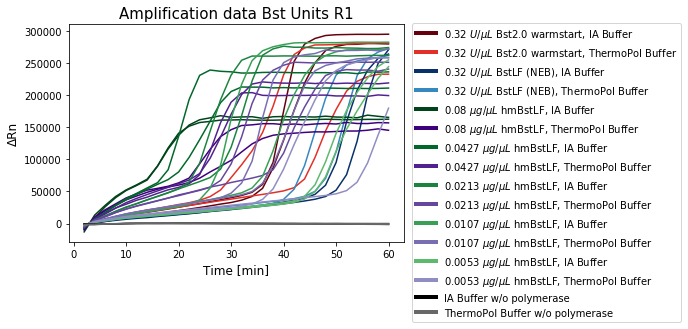

In [77]:
#fig_idx = -1
rdm.display_figure(figure)#, filename = 'Real_time_data/Plots/'+figure.title) # )#

In [78]:
# append to figures and to well_set
figures.append(figure)
well_set.fgs.append(figure)

In [79]:
## first select classification and dataset to be used ##
clf_idx = 6
dset_idx = 1

# obtain proper values with them
f_ds = well_set.dsets[dset_idx]  
f_clf = well_set.clfs[clf_idx]
#f_groups = f_clf.groups
groups_keys = f_clf.groups.keys()

## Define parameters to create a figure  ##

f_title = "Bst Units R1 - Melting"
f_xtext = f_ds.x_name +' ['+f_ds.x_units+']'
f_ytext = f_ds.y_name + f_ds.y_units
f_ax_text_size = 12
f_x_lim = None
f_y_lim = None
f_log_scale = False          # True or False

################################################
################################################
## this section could be inside Figure definition...
#####################################
## Create lists of series and colors
f_series = list()
f_colors = list()

f_lgd_lines = list()
f_lgd_text = list()

for key in groups_keys:
    group = f_clf.groups[key]  
    g_color = f_clf.colors[key]
    
    for well in group:
        
        serie = f_ds.series[well]
        
        f_series.append(serie)
        f_colors.append(g_color)   # same color for the whole group
    
    #create legend lines and text
    lgd_line = Line2D([0], [0], color = g_color , lw=4)
    txt = f_clf.labels[key]
    
    f_lgd_lines.append(lgd_line)
    f_lgd_text.append(txt)
      
#######################################
###### create the figure element ###### 

#figures.append(rdm.Figure(f_ds, f_clf, f_series, f_colors, f_title, f_xtext, f_ytext, f_ax_text_size, f_x_lim, f_y_lim , f_lgd_text, f_lgd_lines, f_log_scale))
figure = rdm.Figure(f_ds, f_clf, f_series, f_colors, f_title, f_xtext, 
                    f_ytext, f_ax_text_size, f_x_lim, f_y_lim , f_lgd_text, 
                    f_lgd_lines, f_log_scale, lgd_loc = 'upper left', lgd_anchor=[1.01, 1.03])

32  lines were plotted



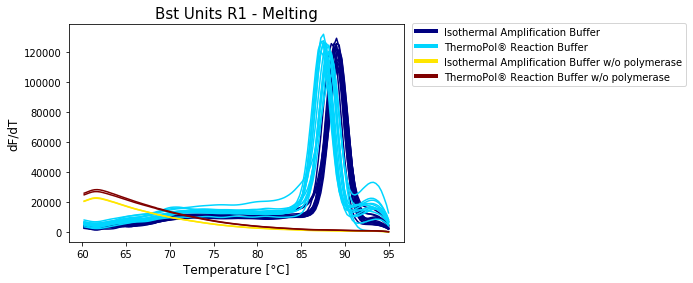

In [80]:
#fig_idx = -1
rdm.display_figure(figure)#,filename = 'Real_time_data/Plots/'+figure.title+'2') # )#

In [81]:
# append to figures and to well_set
figures.append(figure)
well_set.fgs.append(figure)

Melting curves analysis

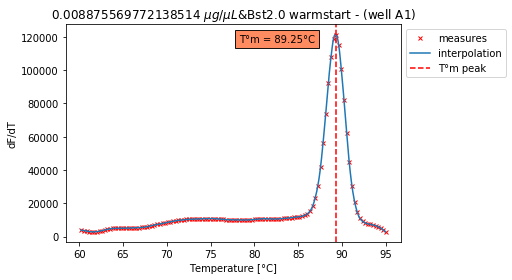

T°m peak : 89.25 °C


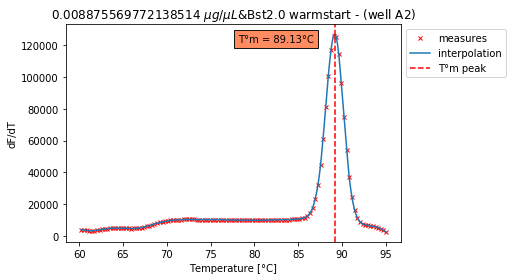

T°m peak : 89.13 °C


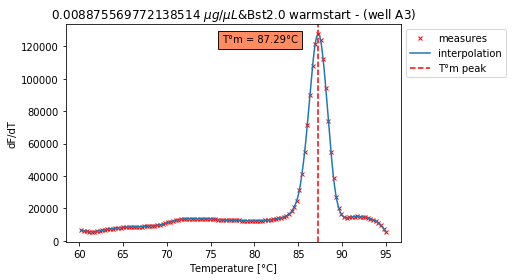

T°m peak : 87.29 °C


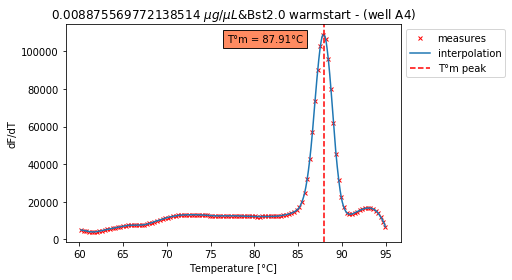

T°m peak : 87.91 °C


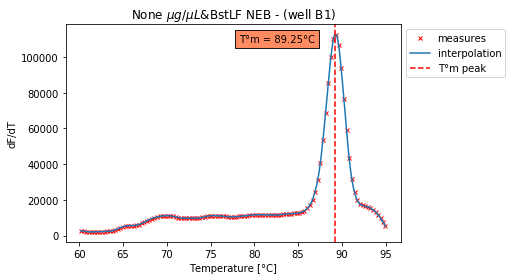

T°m peak : 89.25 °C


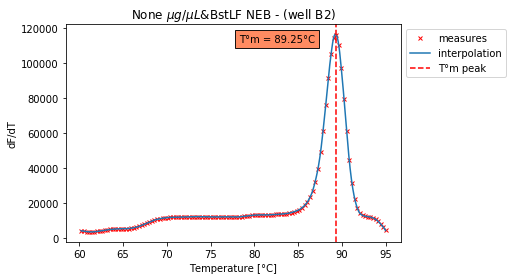

T°m peak : 89.25 °C


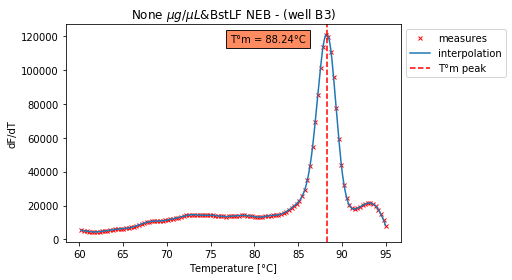

T°m peak : 88.24 °C


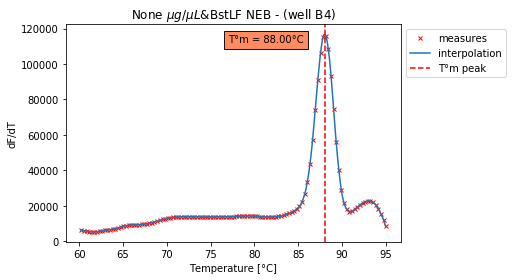

T°m peak : 88.00 °C


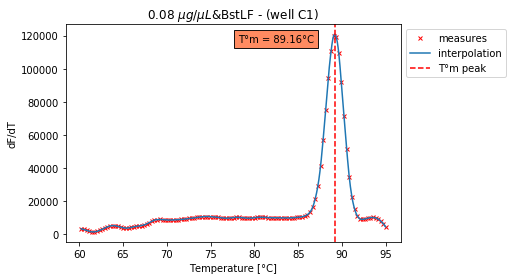

T°m peak : 89.16 °C


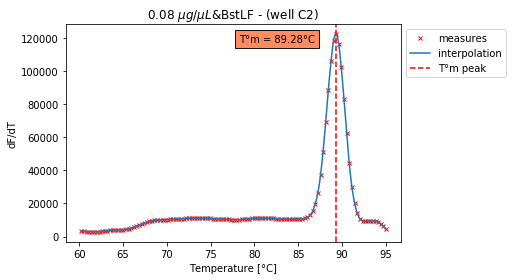

T°m peak : 89.28 °C


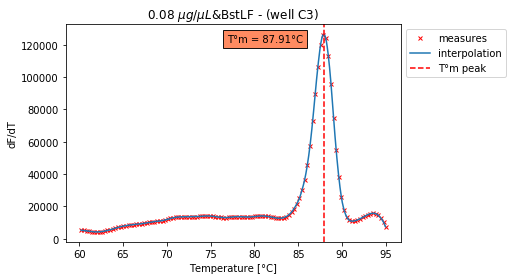

T°m peak : 87.91 °C


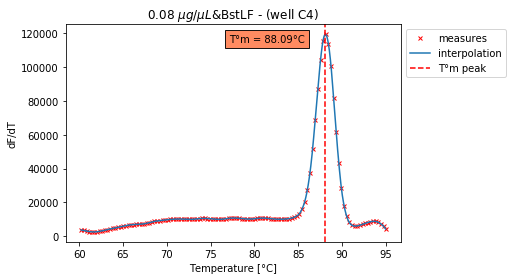

T°m peak : 88.09 °C


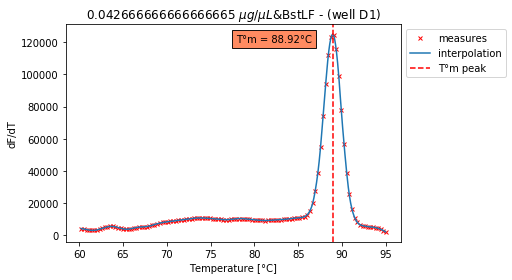

T°m peak : 88.92 °C


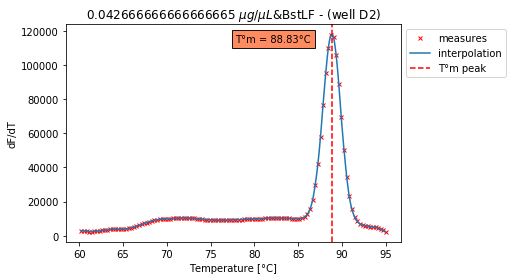

T°m peak : 88.83 °C


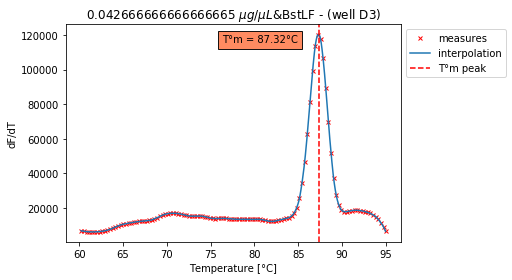

T°m peak : 87.32 °C


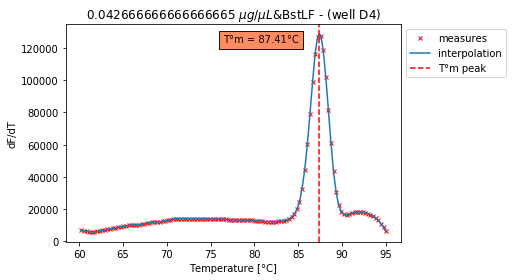

T°m peak : 87.41 °C


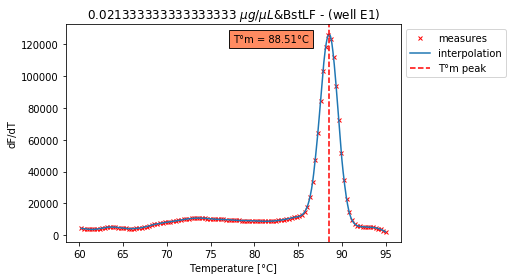

T°m peak : 88.51 °C


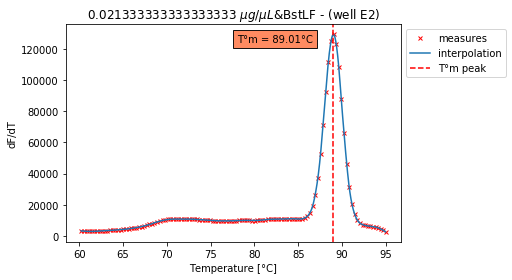

T°m peak : 89.01 °C


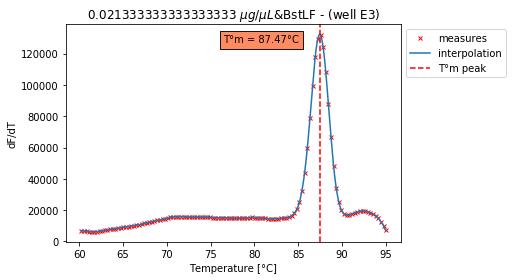

T°m peak : 87.47 °C


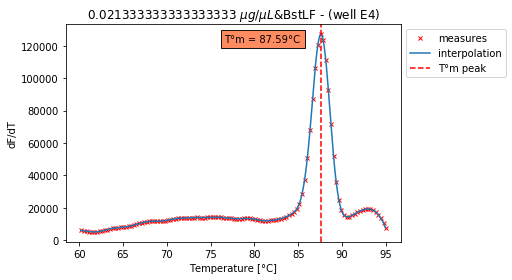

T°m peak : 87.59 °C


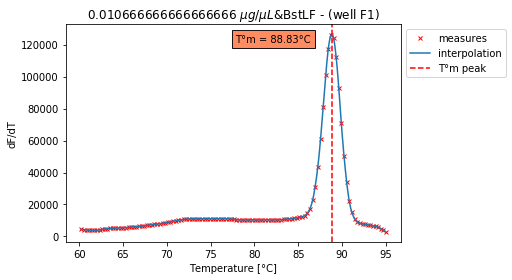

T°m peak : 88.83 °C


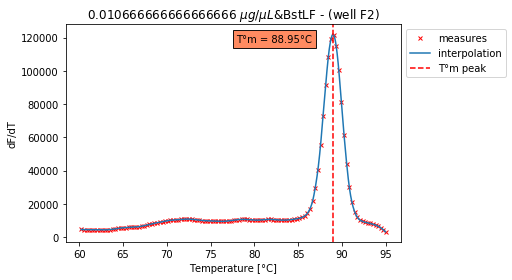

T°m peak : 88.95 °C


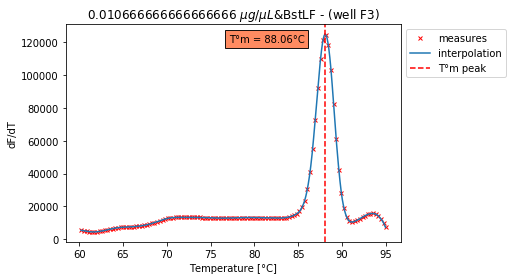

T°m peak : 88.06 °C


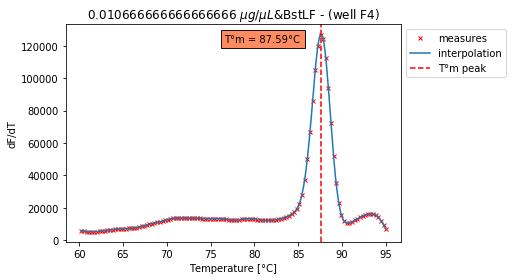

T°m peak : 87.59 °C


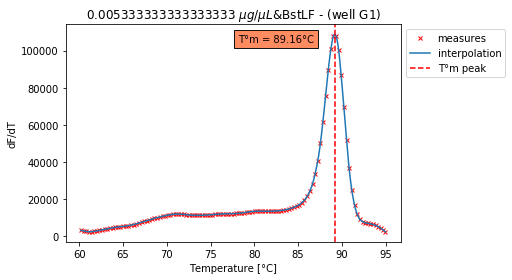

T°m peak : 89.16 °C


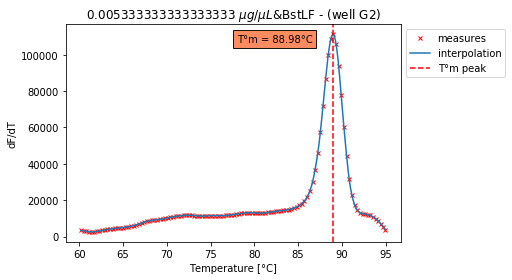

T°m peak : 88.98 °C


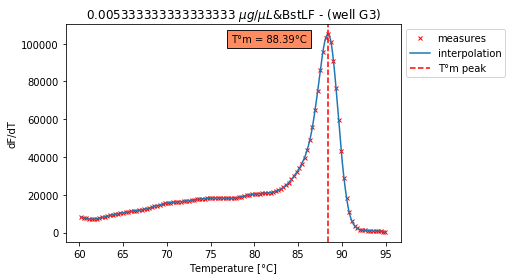

T°m peak : 88.39 °C


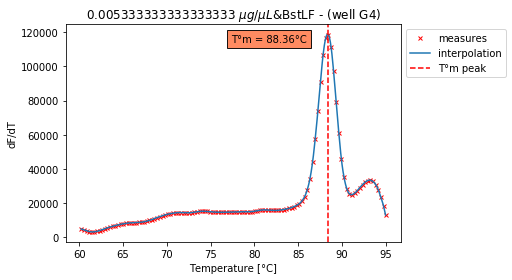

T°m peak : 88.36 °C


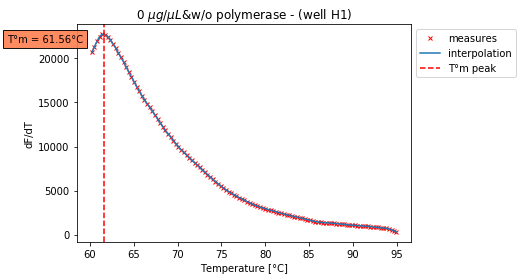

T°m peak : 61.56 °C


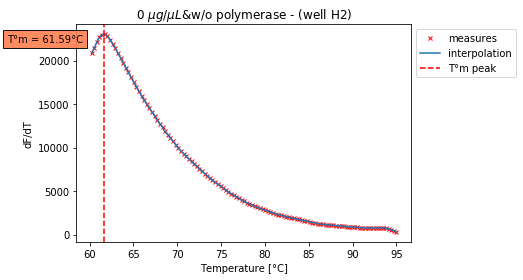

T°m peak : 61.59 °C


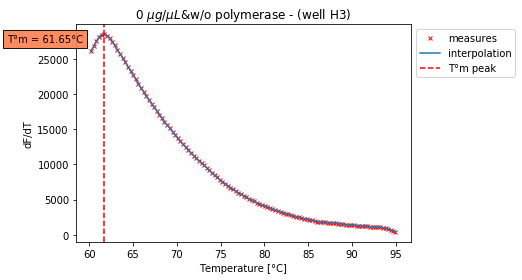

T°m peak : 61.65 °C


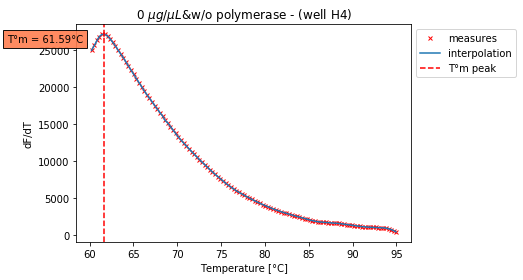

T°m peak : 61.59 °C


In [82]:
# fill with desired values
dset_idx = 1
clf_idx = 4

#################################
mdset = well_set.dsets[dset_idx]
mclf = well_set.clfs[clf_idx]

#rdm.get_Tm_peak(mdset, mclf, save = True)
well_peaks = rdm.get_Tm_peak(mdset, mclf, save = False)

assign the T°m peak values to data_set and to each well

In [83]:
mdset.peaks = well_peaks

In [84]:
pTm_name = "T°m peak"
pTm_descrip = "T°m peak value [T°, dF/dT]"
for well in list(mdset.peaks.keys()):    
    peak = mdset.peaks[well]
    Tm_p = rdm.Parameter(pTm_name , pTm_descrip, units = ['T°', 'dF/dT'], value=peak, properties='')
    rdm.well_param_assignation(Tm_p, well, ask = False)

In [85]:
list(mdset.peaks.keys())[0].analysis[0].__dict__

{'description': 'T°m peak value [T°, dF/dT]',
 'name': 'T°m peak',
 'properties': '',
 'units': ['T°', 'dF/dT'],
 'value': [89.25018808513344, 121542.72322594177]}

##### get mean T°m values

In [86]:
clf_idx = 6
for cls in well_set.clfs[clf_idx].classes:
    sum_val = 0
    count = 0
    clf_label = well_set.clfs[clf_idx].labels[cls]
    print('\n',clf_label)
    print('Class values: ')
    for well in well_set.clfs[clf_idx].groups[cls]:
        print(well.analysis[0].value[0])
        sum_val+=well.analysis[0].value[0]
        count+=1
    mean = sum_val/count
    print('T°m mean value = ',mean, ' °C')
        


 Isothermal Amplification Buffer
Class values: 
89.25018808513344
89.13133573246573
89.25018808513344
89.25018808513344
89.16104882063266
89.27990117330037
88.92334411529724
88.83420485079645
88.50736088096025
89.01248337979803
88.83420485079645
88.95305720346417
89.16104882063266
88.98277029163108
T°m mean value =  89.03795174108397  °C

 ThermoPol® Reaction Buffer
Class values: 
87.28935614358267
87.91333634023283
88.24018310990672
88.00247636832572
87.91333634023283
88.09161639641859
87.3190694862803
87.40820951437317
87.46763619976844
87.58648957055894
88.06190305372095
87.58648957055894
88.38874982339485
88.35903648069723
T°m mean value =  87.83056345700372  °C

 Isothermal Amplification Buffer w/o polymerase
Class values: 
61.557589913556676
61.587303001723605
T°m mean value =  61.57244645764014  °C

 ThermoPol® Reaction Buffer w/o polymerase
Class values: 
61.646741395530995
61.58731471013574
T°m mean value =  61.61702805283337  °C


###### get threshold values

In [87]:
# check available data_sets
rdm.print_list(well_set.dsets)

[0] 'Amplification data ΔRn vs Time' dataset
[1] 'Melting data' dataset


In [104]:
previous_values = [
[17, 20, 23],
[17, 20, 22],
[12, 19, 21],
[20, 23, 27],
[22, 26, 28],
[24, 27, 29],
[22, 26, 28],
[19, 23, 25],
[6, 9, 11],
[6, 9, 10],
[9, 12, 14],
[10, 16, 19],
[7, 10, 12],
[9, 12, 14],
[10, 13, 15],
[11, 14, 16],
[10, 13, 16],
[13, 16, 18],
[13, 16, 18],
[18, 21, 23],
[11, 14, 18],
[16, 19, 23],
[16, 20, 23],
[14, 18, 19],
[22, 25, 29],
[21, 25, 29],
[25, 29, 29],
[17, 21, 25]
]


In [112]:
for i in range(0,len(previous_values)):
    p_value = previous_values[i]
    value = list()
    for val in p_value:
        value.append(val)
    well = well_set.wells[i]
    p_name = 'Amplification response region' 
    p_description = 'x vector index of exponential response region of the well amplification data'

    rr_parameter = rdm.Parameter(p_name, p_description, units = '', value=value, properties='') 

    rdm.well_param_assignation(rr_parameter, well, ask = False)


There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002150BC73620> parameter values [0.94166937]
exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.08485488 -3.7701639 ]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:138: RuntimeWarning: invalid value encountered in log10


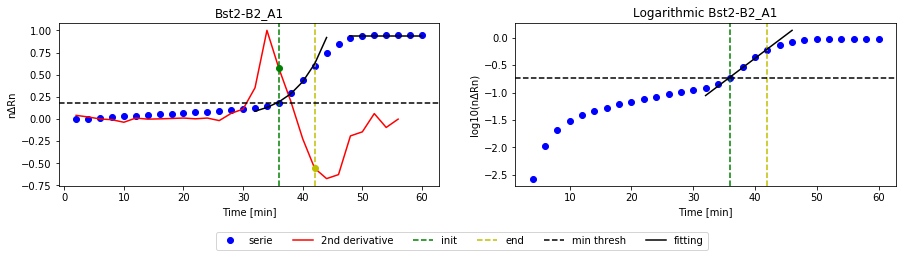


* init (green) = [ 36 , 0.5717806769748378 ]
* end (yellow) = [ 42 , -0.5555949165750289 ]
* maximum region beggining : x = 48
R^2 value (exp fitting) = 0.9925542667527559

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x0000021508922D90> parameter values [0.99548721]
exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.10578872 -4.49326577]


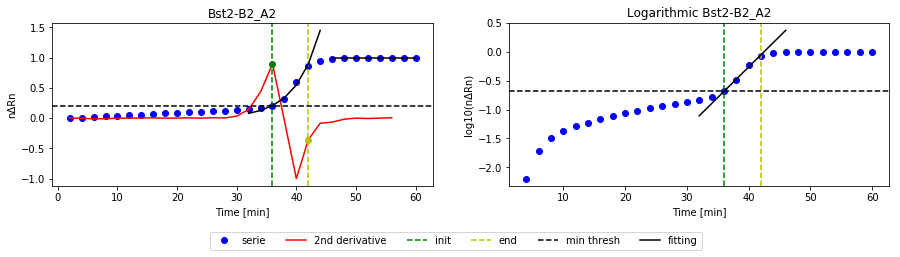


* init (green) = [ 36 , 0.8969114475510334 ]
* end (yellow) = [ 42 , -0.35842831405930875 ]
* maximum region beggining : x = 46
R^2 value (exp fitting) = 0.9919247883365007

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002150B61E048> parameter values [0.9461623]
exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.05295389 -2.21852668]


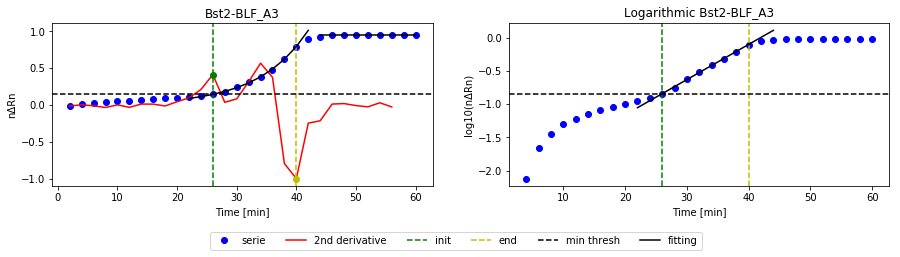


* init (green) = [ 26 , 0.4119272075249342 ]
* end (yellow) = [ 40 , -1.0 ]
* maximum region beggining : x = 44
R^2 value (exp fitting) = 0.9983103479358503

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x0000021508C6B378> parameter values [0.78418949]
exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.07045484 -3.70012264]


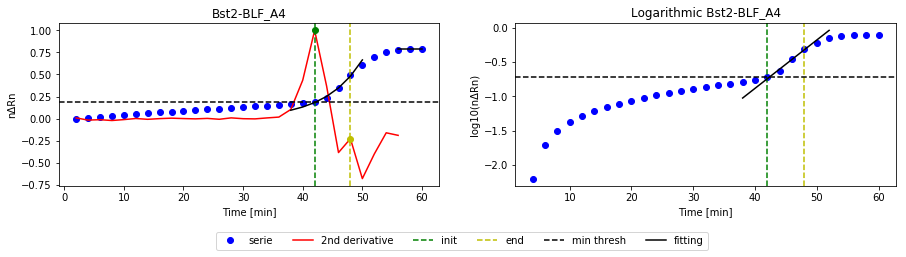


* init (green) = [ 42 , 1.0 ]
* end (yellow) = [ 48 , -0.22826395850314005 ]
* maximum region beggining : x = 56
R^2 value (exp fitting) = 0.9883937951716164

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002150B946C80> parameter values [0.88346427]
exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.08712207 -4.84023984]


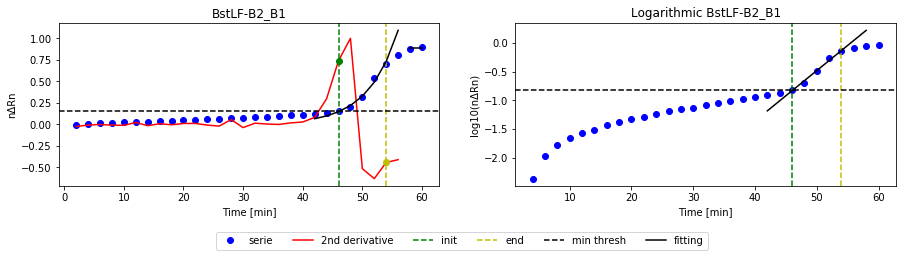


* init (green) = [ 46 , 0.7393084848217437 ]
* end (yellow) = [ 54 , -0.44218253618072717 ]
* maximum region beggining : x = 58
R^2 value (exp fitting) = 0.9881674906066484

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.09934177 -5.73377284]


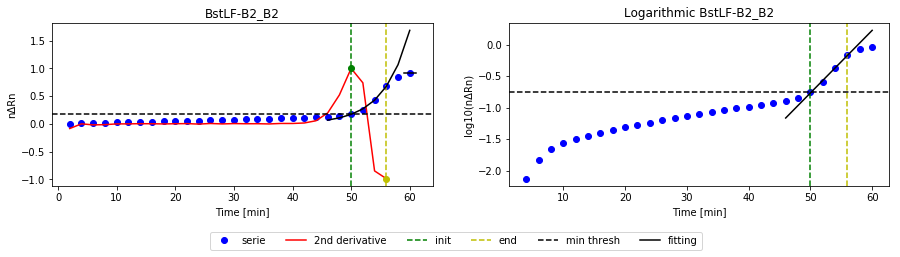


* init (green) = [ 50 , 1.0 ]
* end (yellow) = [ 56 , -0.9866561441342407 ]
* maximum region beggining : x = 60
R^2 value (exp fitting) = 0.9968928428845671

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002150A374A60> parameter values [0.91515422]
exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.08573724 -4.71760571]


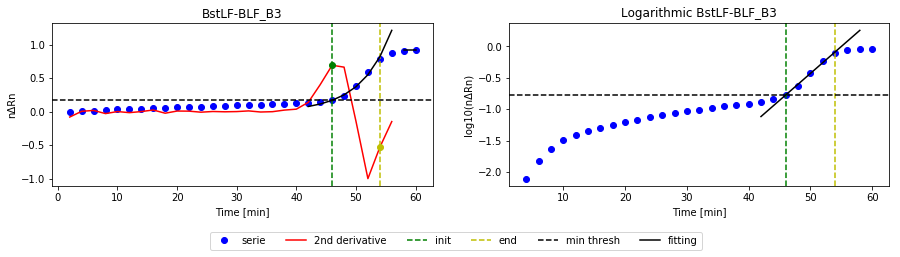


* init (green) = [ 46 , 0.6918569471780414 ]
* end (yellow) = [ 54 , -0.5321237422612496 ]
* maximum region beggining : x = 58
R^2 value (exp fitting) = 0.9943090203064762

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002150B8D0488> parameter values [0.8661346]
exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.09282447 -4.61308058]


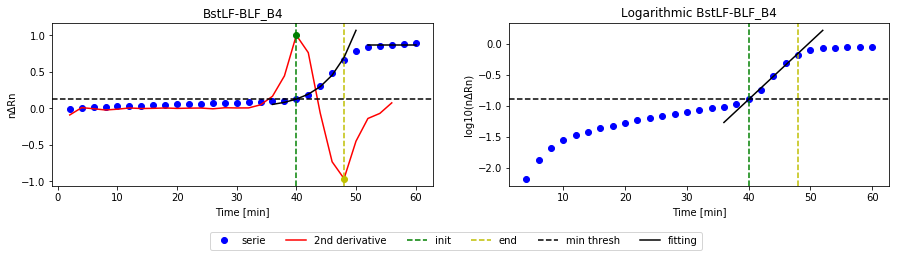


* init (green) = [ 40 , 1.0 ]
* end (yellow) = [ 48 , -0.9620103623570072 ]
* maximum region beggining : x = 52
R^2 value (exp fitting) = 0.9930905699590614

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002150BA7A158> parameter values [0.56240939]
exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.05174618 -1.35305816]


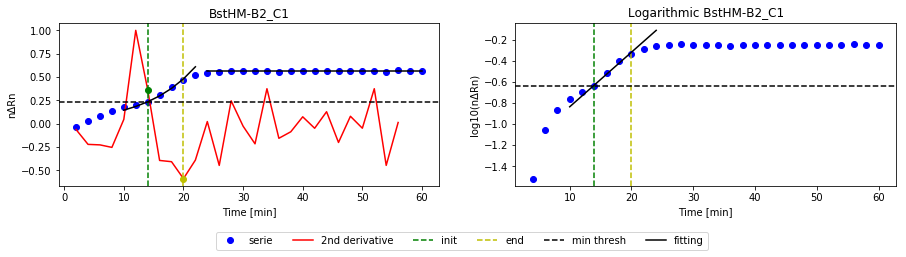


* init (green) = [ 14 , 0.3657692737528748 ]
* end (yellow) = [ 20 , -0.5871902406314885 ]
* maximum region beggining : x = 24
R^2 value (exp fitting) = 0.9886812546604534

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002150A2D7488> parameter values [0.54540261]
exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.05223939 -1.35477596]


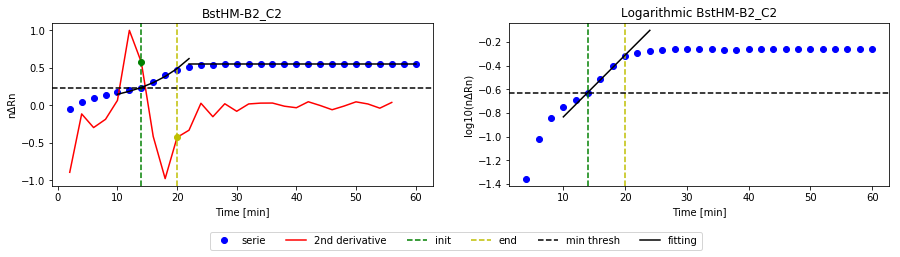


* init (green) = [ 14 , 0.5755565217167599 ]
* end (yellow) = [ 20 , -0.4280965966828656 ]
* maximum region beggining : x = 22
R^2 value (exp fitting) = 0.9917950696767203

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002150B6227B8> parameter values [0.52456178]
exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.04511189 -1.58653222]


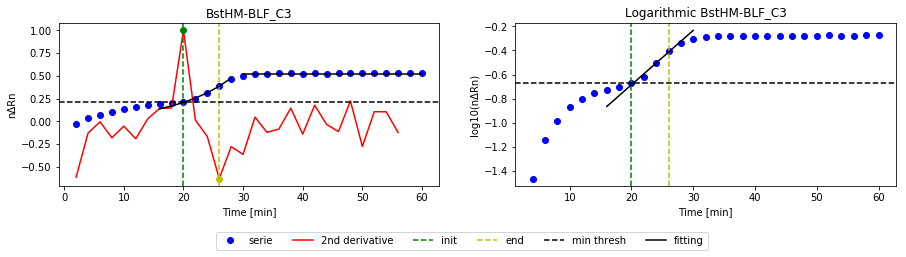


* init (green) = [ 20 , 1.0 ]
* end (yellow) = [ 26 , -0.6311710737974507 ]
* maximum region beggining : x = 30
R^2 value (exp fitting) = 0.9766717131861264

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002150B7F3AE8> parameter values [0.48618371]
exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.02412819 -1.19636529]


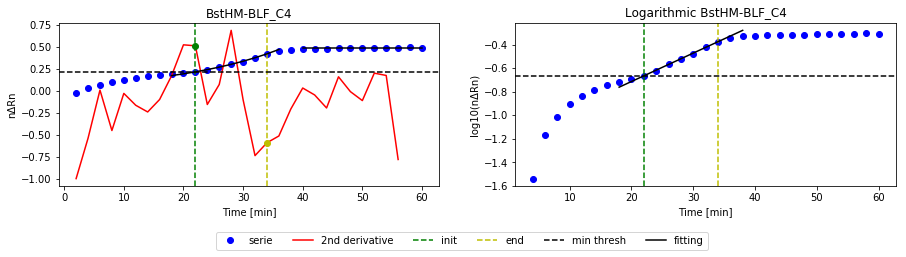


* init (green) = [ 22 , 0.5124480114103289 ]
* end (yellow) = [ 34 , -0.5916879542472554 ]
* maximum region beggining : x = 40
R^2 value (exp fitting) = 0.9991937293643091

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002150B9467B8> parameter values [0.7984232]
exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.08271079 -2.00476086]


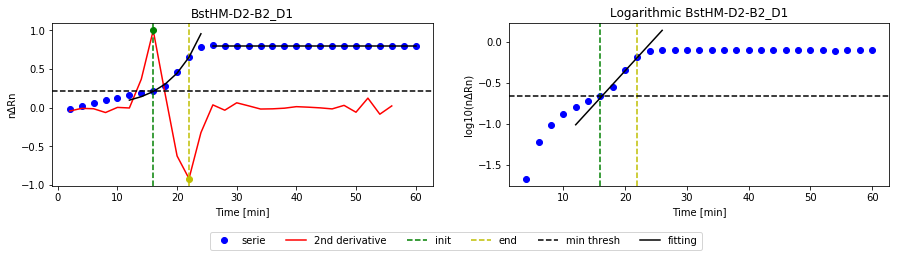


* init (green) = [ 16 , 1.0 ]
* end (yellow) = [ 22 , -0.9185973948084143 ]
* maximum region beggining : x = 26
R^2 value (exp fitting) = 0.9900653248967902

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002150B946048> parameter values [0.71507027]
exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.0498031 -1.5563244]


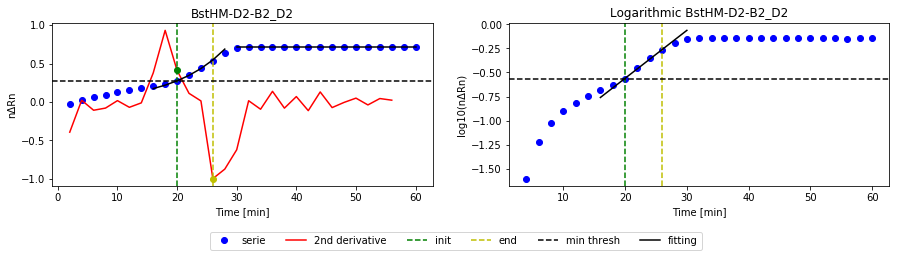


* init (green) = [ 20 , 0.41026759315993244 ]
* end (yellow) = [ 26 , -1.0 ]
* maximum region beggining : x = 30
R^2 value (exp fitting) = 0.9975412427317095

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002150B61E7B8> parameter values [0.67786219]
exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.06919437 -2.21946135]


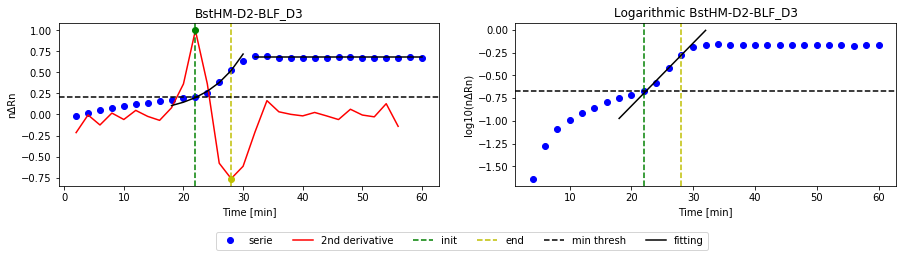


* init (green) = [ 22 , 1.0 ]
* end (yellow) = [ 28 , -0.7623450275698144 ]
* maximum region beggining : x = 32
R^2 value (exp fitting) = 0.9854186042559749

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x00000215035B16A8> parameter values [0.74125889]
exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.05711474 -1.9472307 ]


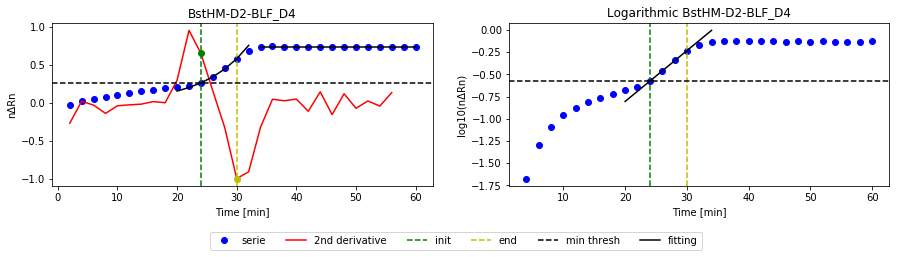


* init (green) = [ 24 , 0.6538148050481959 ]
* end (yellow) = [ 30 , -1.0 ]
* maximum region beggining : x = 34
R^2 value (exp fitting) = 0.9985863543634534

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x0000021508922D90> parameter values [0.88550923]
exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.08026324 -2.4195669 ]


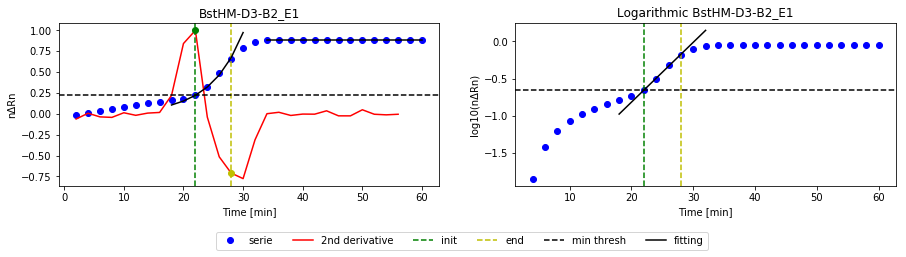


* init (green) = [ 22 , 1.0 ]
* end (yellow) = [ 28 , -0.7095388686148436 ]
* maximum region beggining : x = 34
R^2 value (exp fitting) = 0.9953378303492254

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002150A53C620> parameter values [0.9280646]
exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.0703082  -2.50567674]


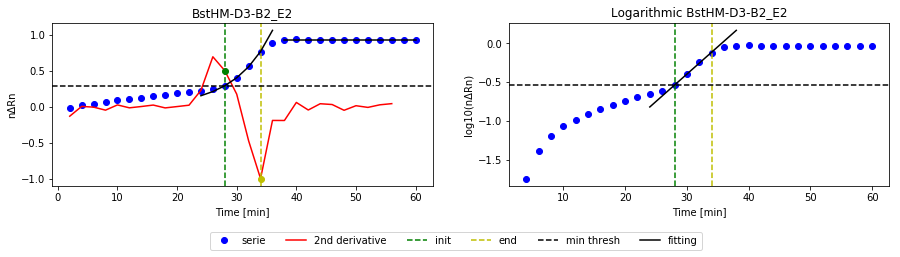


* init (green) = [ 28 , 0.5005176407827248 ]
* end (yellow) = [ 34 , -1.0 ]
* maximum region beggining : x = 38
R^2 value (exp fitting) = 0.9979290269558256

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002150A3B5A60> parameter values [0.84618447]
exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.07486388 -2.74142089]


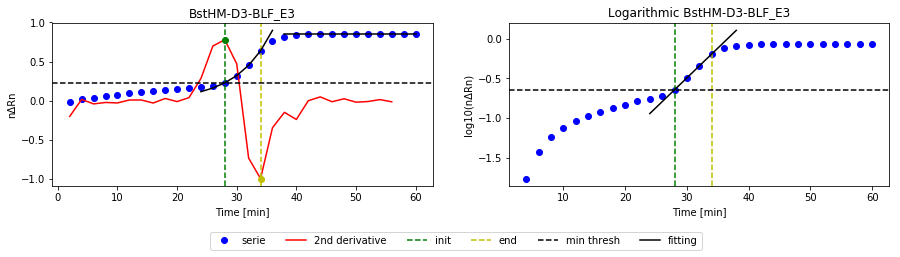


* init (green) = [ 28 , 0.7785054524111087 ]
* end (yellow) = [ 34 , -1.0 ]
* maximum region beggining : x = 38
R^2 value (exp fitting) = 0.9991642545452184

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002150A01C488> parameter values [0.80568266]
exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.05693968 -2.70544516]


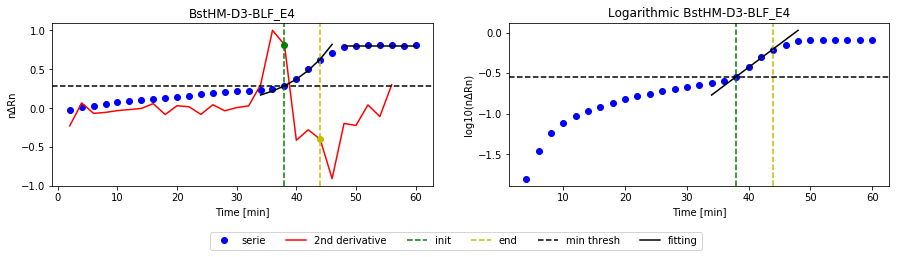


* init (green) = [ 38 , 0.8178878401304751 ]
* end (yellow) = [ 44 , -0.3988827129828377 ]
* maximum region beggining : x = 48
R^2 value (exp fitting) = 0.9932634031754962

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002150B674158> parameter values [0.95342287]
exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.10770306 -3.50841841]


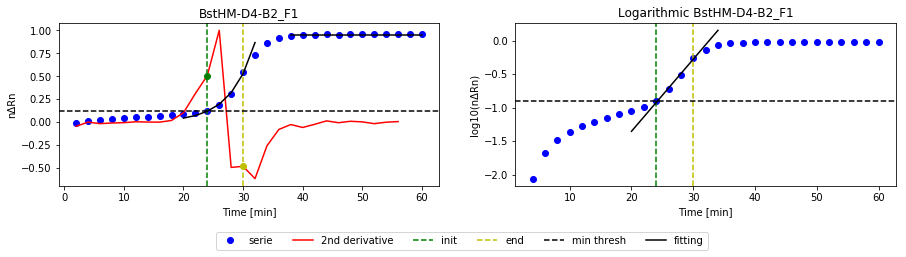


* init (green) = [ 24 , 0.5078957703332082 ]
* end (yellow) = [ 30 , -0.4802464693523632 ]
* maximum region beggining : x = 38
R^2 value (exp fitting) = 0.9935085451143907

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002150BBC8488> parameter values [0.91265895]
exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.07943202 -3.44022445]


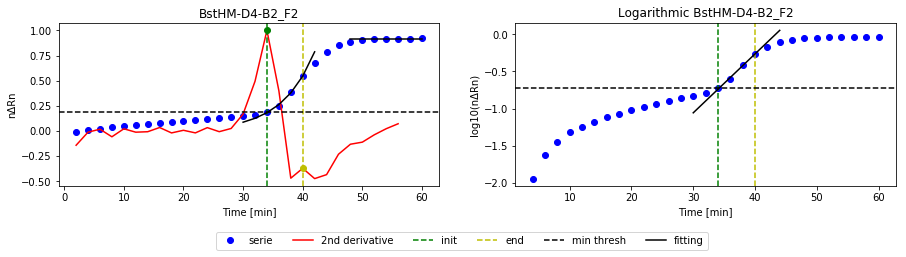


* init (green) = [ 34 , 1.0 ]
* end (yellow) = [ 40 , -0.3704983488258097 ]
* maximum region beggining : x = 48
R^2 value (exp fitting) = 0.9942886576026734

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002150B9447B8> parameter values [0.86215195]
exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.07072296 -3.19415235]


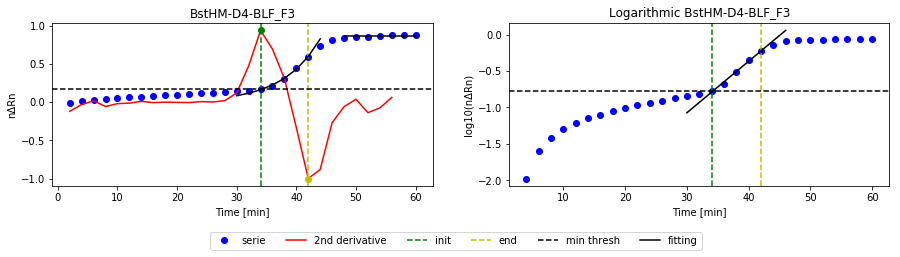


* init (green) = [ 34 , 0.939299335557275 ]
* end (yellow) = [ 42 , -1.0 ]
* maximum region beggining : x = 48
R^2 value (exp fitting) = 0.9946366197355511

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002150BC45AE8> parameter values [0.90233304]
exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.08833054 -3.46735146]


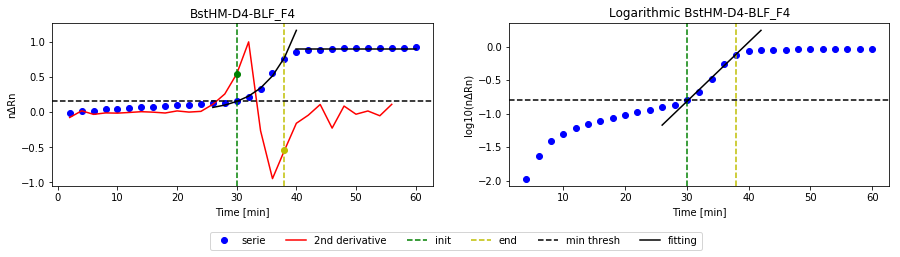


* init (green) = [ 30 , 0.5443809729601853 ]
* end (yellow) = [ 38 , -0.5446568965649723 ]
* maximum region beggining : x = 40
R^2 value (exp fitting) = 0.990584752382649

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.07999312 -4.44513681]


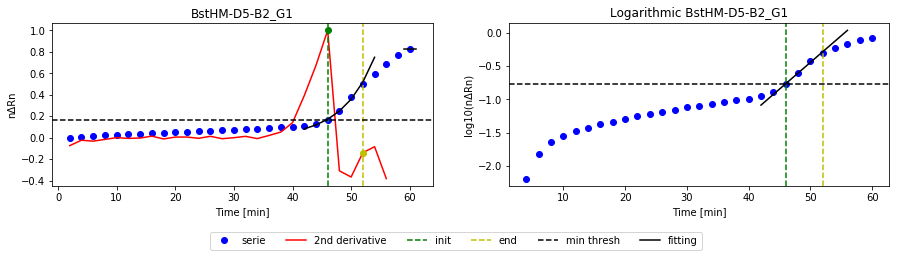


* init (green) = [ 46 , 1.0 ]
* end (yellow) = [ 52 , -0.13946622656156082 ]
* maximum region beggining : x = 60
R^2 value (exp fitting) = 0.991796764650962

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.08013643 -4.35958788]


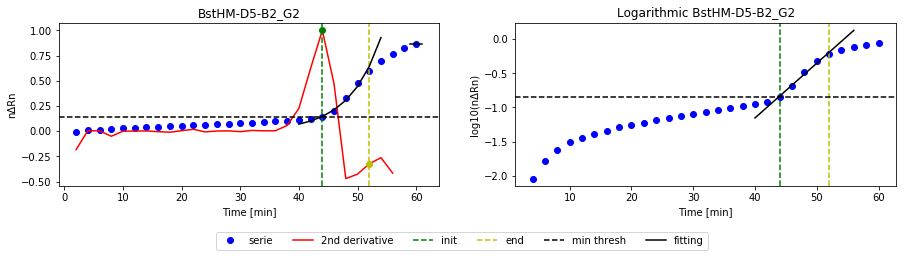


* init (green) = [ 44 , 1.0 ]
* end (yellow) = [ 52 , -0.3230146733426829 ]
* maximum region beggining : x = 60
R^2 value (exp fitting) = 0.9888014478691137

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.07098634 -4.4678869 ]


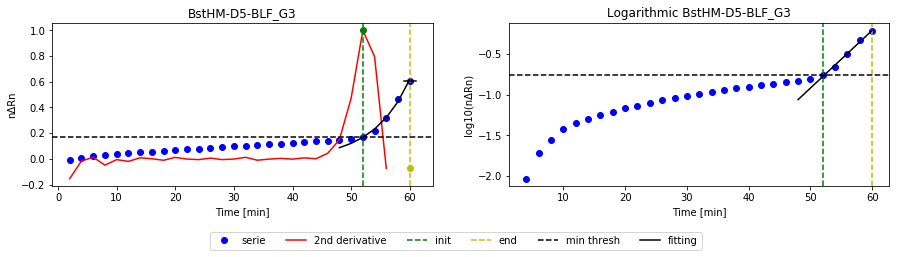


* init (green) = [ 52 , 1.0 ]
* end (yellow) = [ 60 , -0.07462821128085062 ]
* maximum region beggining : x = 60
R^2 value (exp fitting) = 0.9929105683921616

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002150BE08840> parameter values [0.86138713]
exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.08035532 -3.77911393]


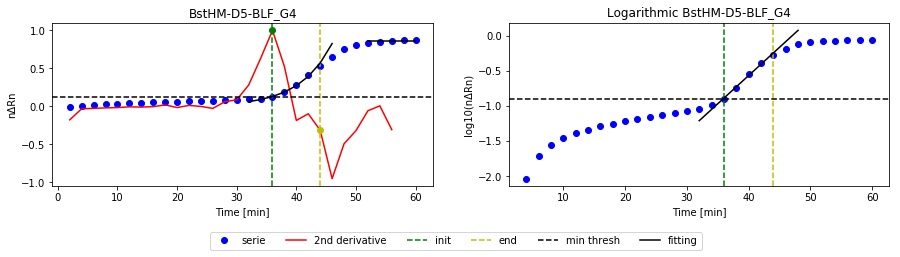


* init (green) = [ 36 , 1.0 ]
* end (yellow) = [ 44 , -0.31447129700761645 ]
* maximum region beggining : x = 52
R^2 value (exp fitting) = 0.9922983724344914

Are the min and max values appropiate to the exponential region?
(NE: No Exponential region)
(y/n/NE): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002150BE08950> parameter values [-0.00019028]


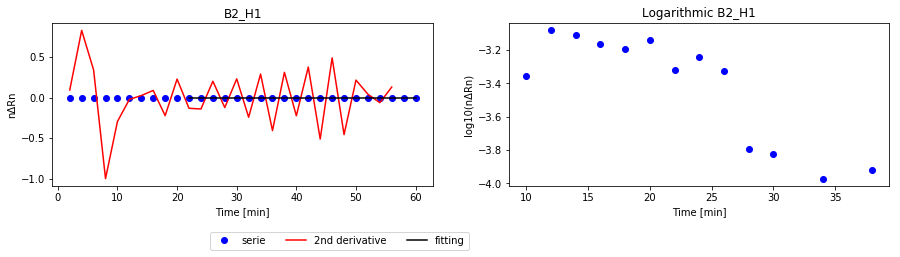

* maximum region beggining : x = 22
There is no exponential region. Is it correct?
(y/n): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x0000021508922E18> parameter values [-0.00138544]


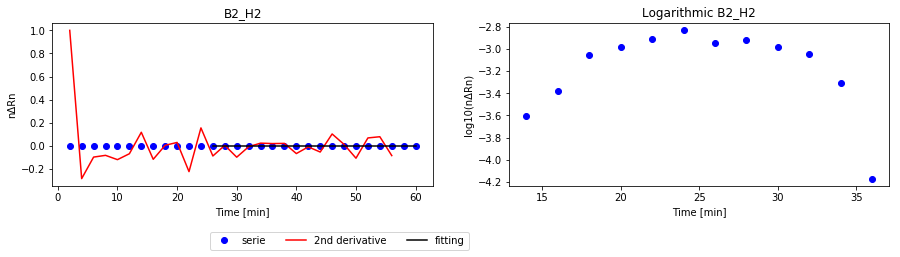

* maximum region beggining : x = 26
There is no exponential region. Is it correct?
(y/n): n
enter new x position of green line: 20
enter new x position of yellow line: 27

value(s) out of range, posible values are:

[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48
 50 52 54 56 58 60]


enter new x position of green line: 20
enter new x position of yellow line: 28
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002150BC73BF8> parameter values [-0.00138544]
exponential fit
fitted <function f_linear at 0x000002157F3C5C80> parameter values [ 0.00477277 -3.02980562]


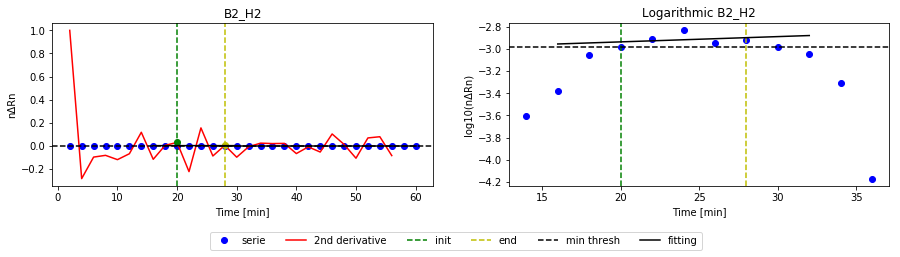


* init (green) = [ 20 , 0.028968481345882226 ]
* end (yellow) = [ 28 , 0.003889474418468103 ]
* maximum region beggining : x = 26
R^2 value (exp fitting) = 0.07654168942813355

are the new values appropiate?
(y/n/NE): NE
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x0000021507265BF8> parameter values [-0.00138544]


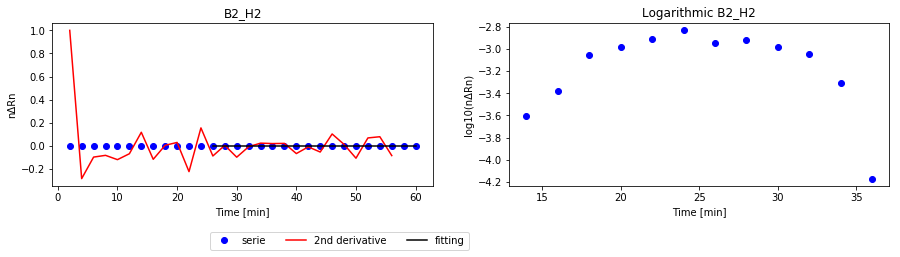

* maximum region beggining : x = 26

Is the start of maximum region appropiate?
(y/n): n
enter new x start position: 28
fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002150B61E8C8> parameter values [-0.00153424]


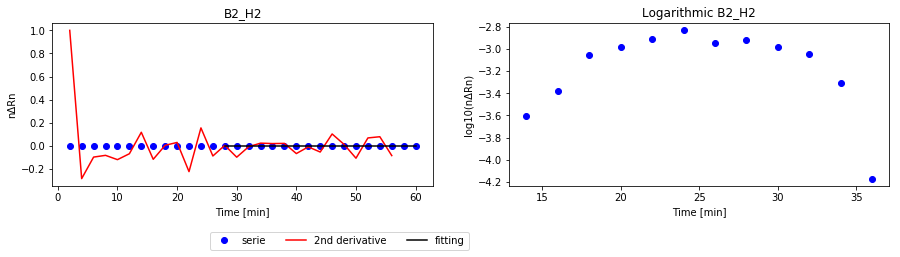

* maximum region beggining : x = 28

is the new value appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002150A4EBD90> parameter values [8.85745141e-05]


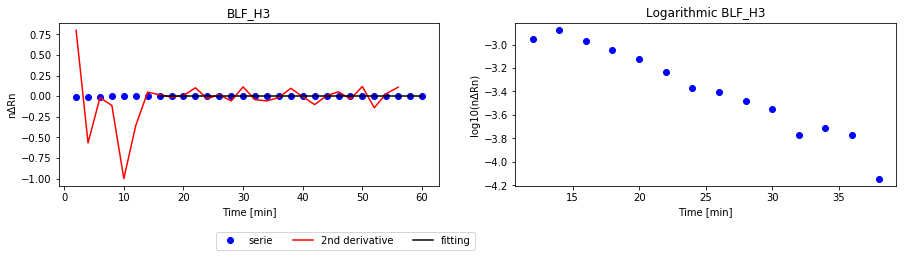

* maximum region beggining : x = 16
There is no exponential region. Is it correct?
(y/n): y

Is the start of maximum region appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function exponential_region.<locals>.response_reg_plot.<locals>.<lambda> at 0x000002150A1E4268> parameter values [-0.00180221]


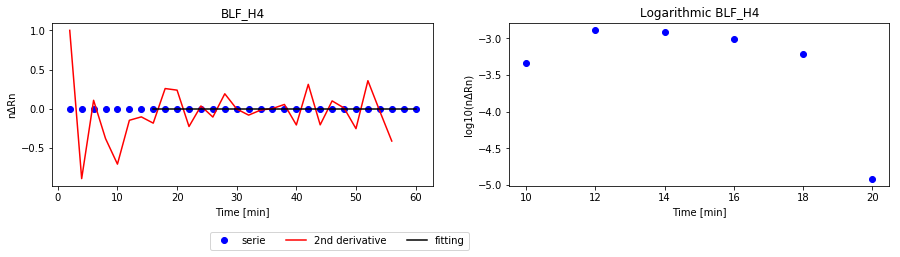

* maximum region beggining : x = 16
There is no exponential region. Is it correct?
(y/n): y

Is the start of maximum region appropiate?
(y/n): y


In [202]:
dset_idx = 0
wset_idx = 0

thr_lims, points = rdm.exponential_region(well_sets[wset_idx].dsets[dset_idx], derivative ='forward')

In [122]:
# This box is to rearrange the position of the analysis in case use previous values
# It is "neccessary" to move analysis [1] to [3]
for well in well_set.wells[0:-4]:
    #del well.analysis[1]
    #well.analysis.append(well.analysis[1])
    print(well.analysis[3].value)

[17, 20, 23]
[17, 20, 22]
[12, 19, 21]
[20, 23, 27]
[22, 26, 28]
[24, 27, 29]
[22, 26, 28]
[19, 23, 25]
[6, 9, 11]
[6, 9, 10]
[9, 12, 14]
[10, 16, 19]
[7, 10, 12]
[9, 12, 14]
[10, 13, 15]
[11, 14, 16]
[10, 13, 16]
[13, 16, 18]
[13, 16, 18]
[18, 21, 23]
[11, 14, 18]
[16, 19, 23]
[16, 20, 23]
[14, 18, 19]
[22, 25, 29]
[21, 25, 29]
[25, 29, 29]
[17, 21, 25]


In [206]:
#check current well analysis parameters
rdm.print_list(well_set.wells[5].analysis)

[0] T°m peak has a value of [89.25018808513344, 116352.37324397119] ['T°', 'dF/dT']
[1] max signal has a value of [0.9180939253161533, 270707.28125] 
[2] ['a', 'b', 'N'] has a value of [0.0993417685920366, -5.733772838773447, 294857.9375] 
[3] Amplification response region has a value of [24, 27, 29] 


In [212]:
points

[[17, 20, 23],
 [17, 20, 22],
 [12, 19, 21],
 [20, 23, 27],
 [22, 26, 28],
 [24, 27, 29],
 [22, 26, 28],
 [19, 23, 25],
 [6, 9, 11],
 [6, 9, 10],
 [9, 12, 14],
 [10, 16, 19],
 [7, 10, 12],
 [9, 12, 14],
 [10, 13, 15],
 [11, 14, 16],
 [10, 13, 16],
 [13, 16, 18],
 [13, 16, 18],
 [18, 21, 23],
 [11, 14, 18],
 [16, 19, 23],
 [16, 20, 23],
 [14, 18, 19],
 [22, 25, 29],
 [21, 25, 29],
 [25, 29, 29],
 [17, 21, 25],
 [-1, -1, 10],
 [-1, -1, 13],
 [-1, -1, 7],
 [-1, -1, 7]]

In [137]:
# compute threshold value selectable range
thr_range = [0,np.inf]

for lim in thr_lims:
    
    inf_lim = lim[0]
    sup_lim = lim[1]
    
    if inf_lim  > thr_range[0]:
        thr_range[0] = inf_lim
    
    if sup_lim  < thr_range[1]:
        thr_range[1] = sup_lim

print('theshold valid range is:',thr_range)

theshold valid range is: [84718.4453125, 214.41676330566406]


Use the lowest possible value:

Figure saved!


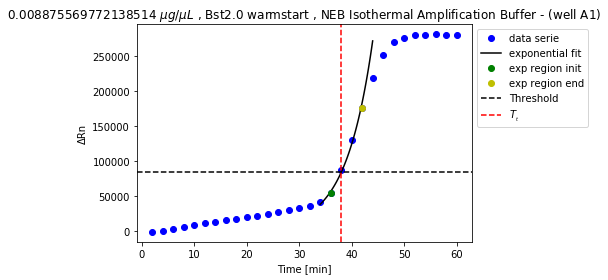

Tt value is: 38.047651334999436
Figure saved!


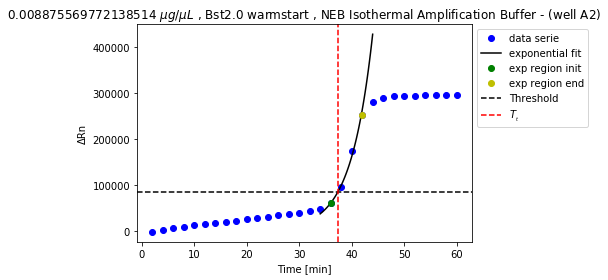

Tt value is: 37.35399165624451
Figure saved!


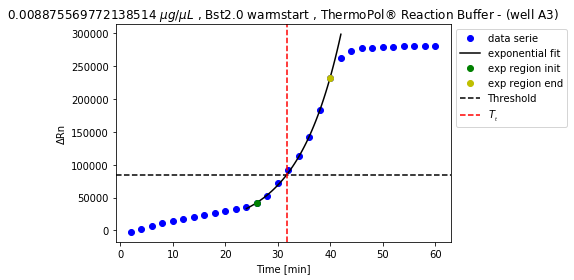

Tt value is: 31.66702169839895
Figure saved!


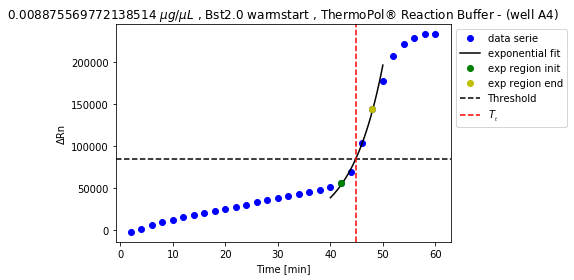

Tt value is: 44.829963055364296
Figure saved!


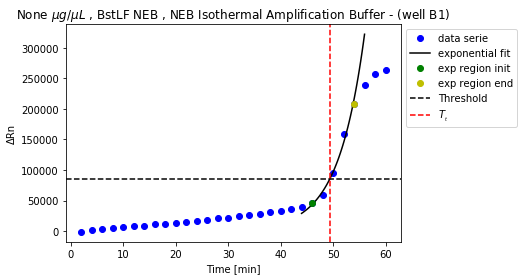

Tt value is: 49.34002429470676
Figure saved!


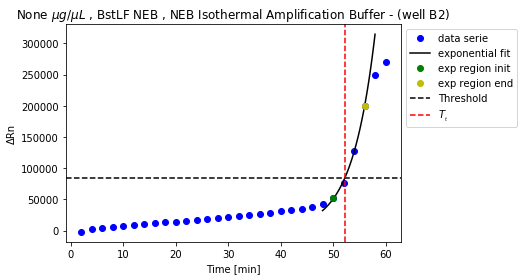

Tt value is: 52.265407253460246
Figure saved!


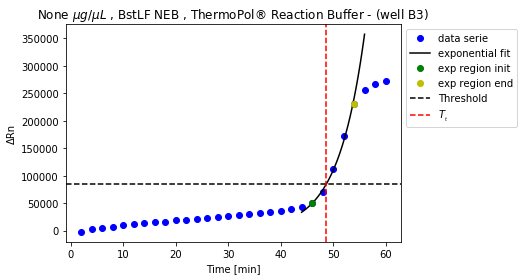

Tt value is: 48.70661867789871
Figure saved!


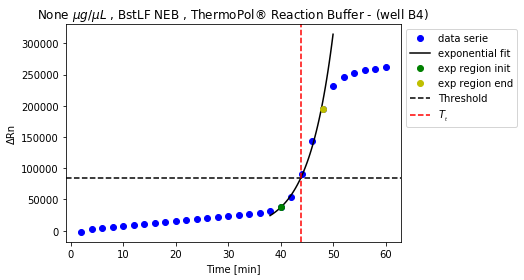

Tt value is: 43.861770759315746
Figure saved!


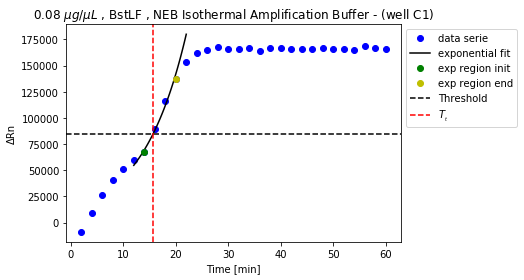

Tt value is: 15.680834187300556
Figure saved!


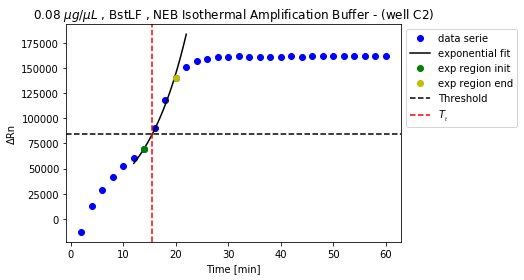

Tt value is: 15.565669636945913
Figure saved!


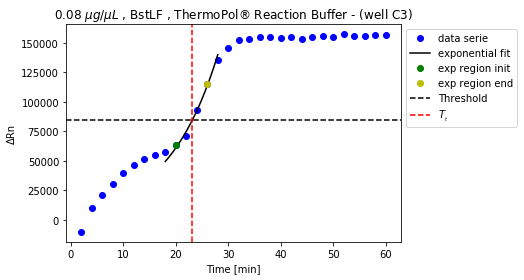

Tt value is: 23.162350237413946
Figure saved!


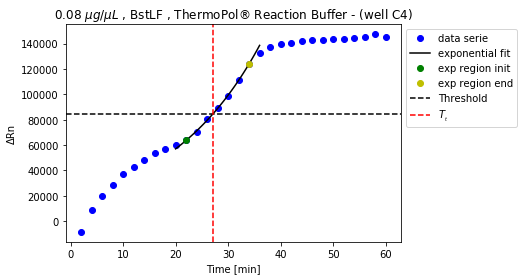

Tt value is: 27.135502398124476
Figure saved!


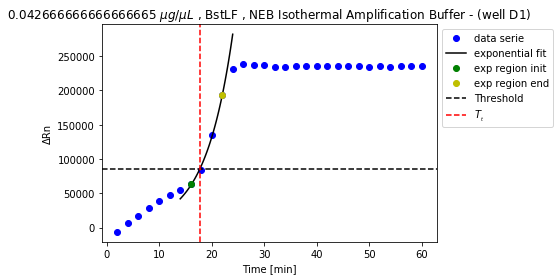

Tt value is: 17.689662610333656
Figure saved!


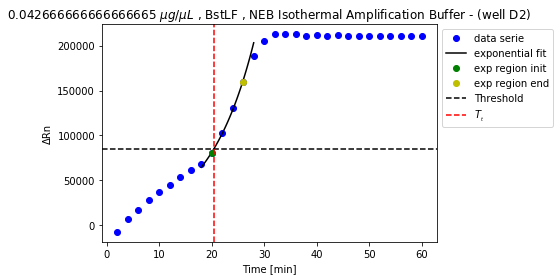

Tt value is: 20.37402244455851
Figure saved!


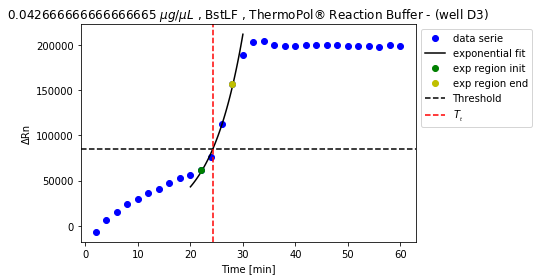

Tt value is: 24.248020071849044
Figure saved!


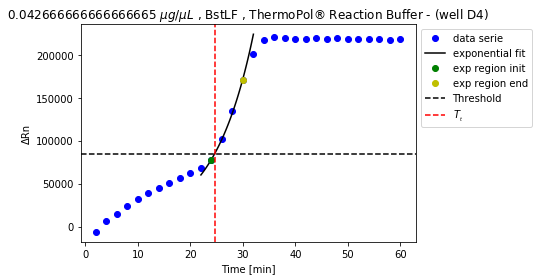

Tt value is: 24.610036195176452
Figure saved!


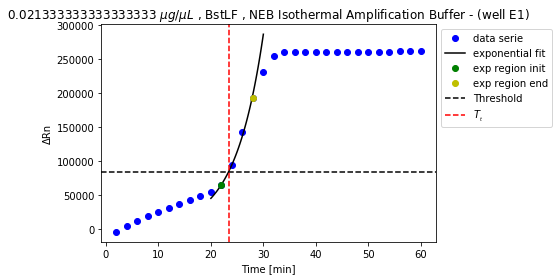

Tt value is: 23.39716239381161
Figure saved!


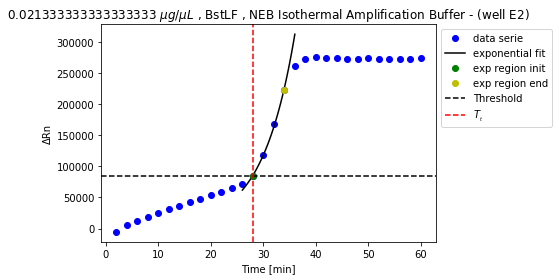

Tt value is: 27.934750571830136
Figure saved!


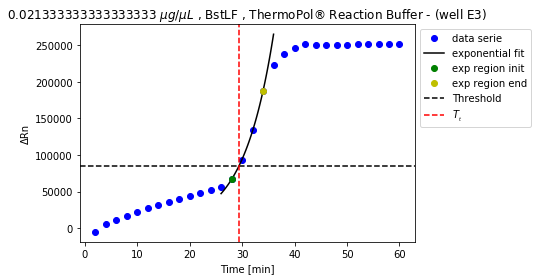

Tt value is: 29.38381140701009
Figure saved!


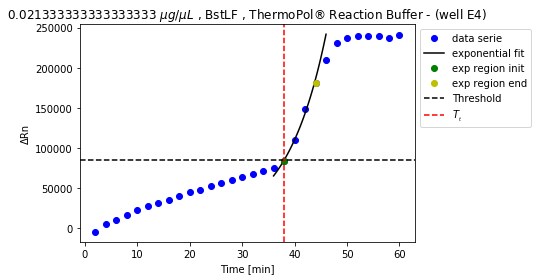

Tt value is: 38.00179684879634
Figure saved!


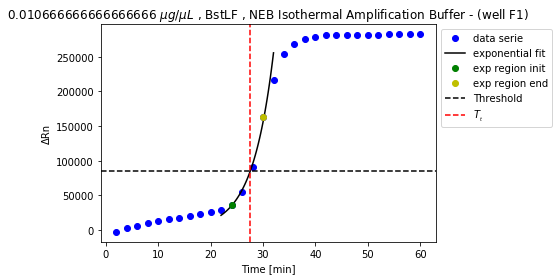

Tt value is: 27.545954682074182
Figure saved!


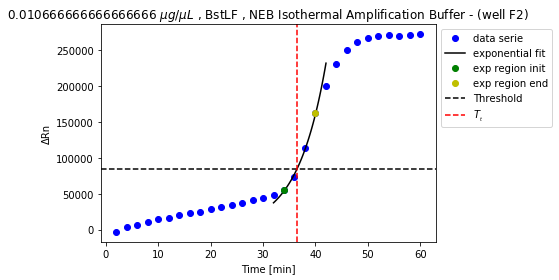

Tt value is: 36.49145198968853
Figure saved!


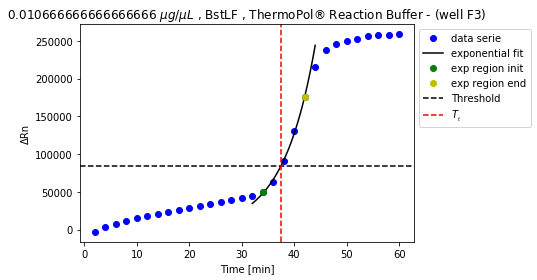

Tt value is: 37.50574894058021
Figure saved!


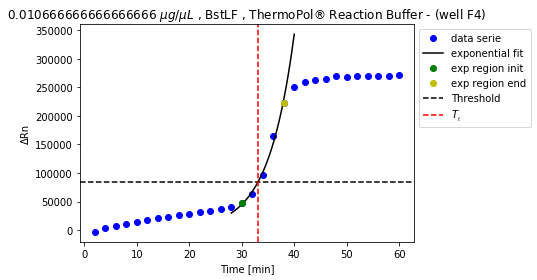

Tt value is: 33.122367715496694
Figure saved!


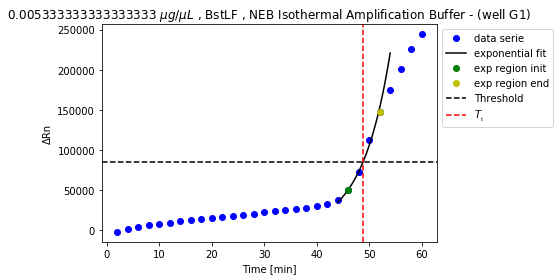

Tt value is: 48.79797246333371
Figure saved!


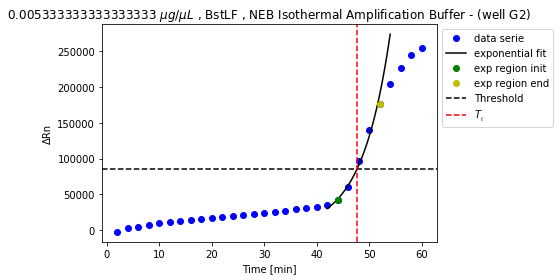

Tt value is: 47.64316200890749
Figure saved!


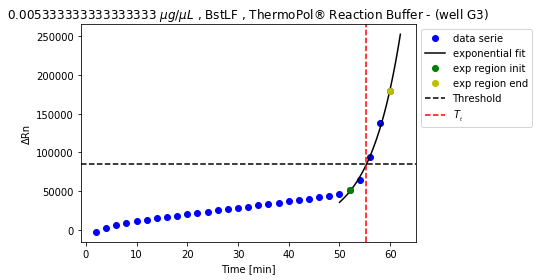

Tt value is: 55.30996561001536
Figure saved!


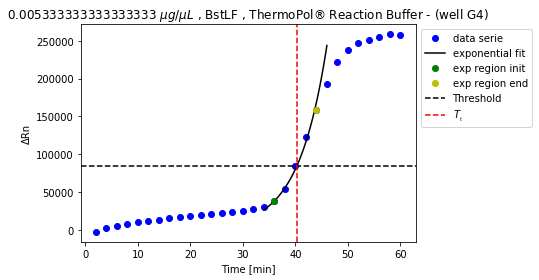

Tt value is: 40.289543059423494
Figure saved!


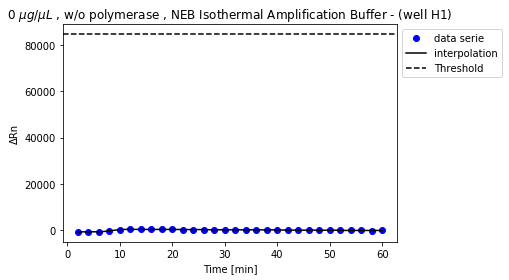

Tt value is: None
Figure saved!


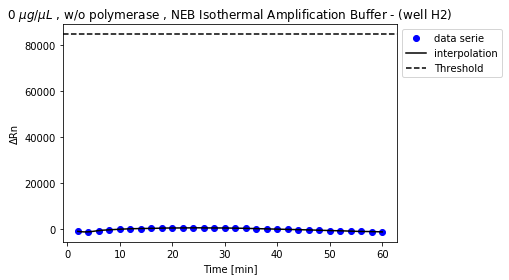

Tt value is: None
Figure saved!


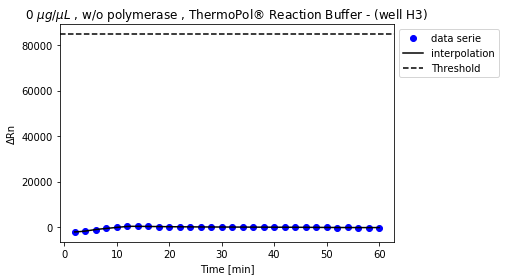

Tt value is: None
Figure saved!


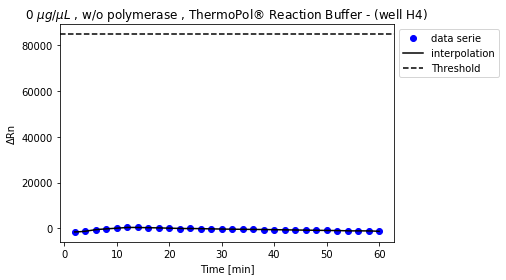

Tt value is: None


In [210]:
thr_value = thr_range[0]
clf_idx = 5
Tt_values, thr_figures = rdm.explore_thr(thr_value, well_sets[wset_idx].dsets[dset_idx], function = rdm.f_10exp_lineal,
           attr_name='exponential', lp_name='Amplification response region', 
           clf = well_sets[wset_idx].clfs[clf_idx] ,save = False)

In [215]:
rdm.print_list(figures)#,title)

[0] 'Amplification data Bst Units R1' figure
[1] 'Bst Units R1 - Melting' figure


32  lines were plotted



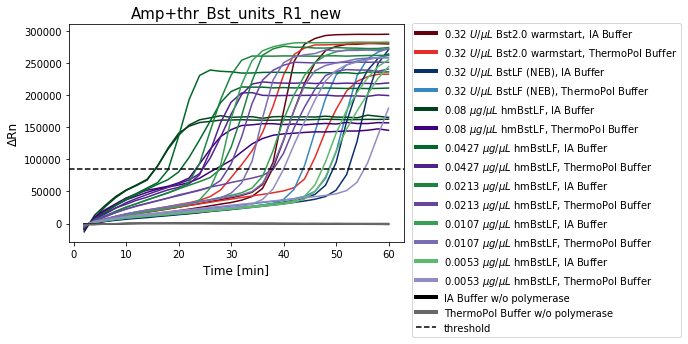

In [240]:
# choose the figure
fig_idx = 0

# copy and add threshold
fig_thr = rdm.copy_figure(figures[fig_idx])
fig_thr.thr_line = thr_value

# indicate the title
fig_thr.title = 'Amp+thr_Bst_units_R1_new'

#display it
rdm.display_figure(fig_thr,filename = 'Real_time_data/Plots/'+fig_thr.title) # )#

if threshold is fine: 
- add it as an attribute to data_set
- store the Tt value <br>

else: <br> 
- define a new threshold



In [243]:
# append the figure to figures and to well_set
figures.append(fig_thr)
well_set.fgs.append(fig_thr)

In [244]:
well_sets[wset_idx].dsets[dset_idx].threshold = thr_value
well_sets[wset_idx].dsets[dset_idx].Tt_values = Tt_values  ## Tt : Threshold time

#### Figure Management

In [ ]:
# then you can display any figure
well_sets[wset_idx].dsets[dset_idx].thr_figures[s_wells[0]][0]
# other way --> thr_figures[s_wells[0]]

In [ ]:
# or save it
fig = well_sets[wset_idx].dsets[dset_idx].thr_figures[s_wells[0]][0]
legend = well_sets[wset_idx].dsets[dset_idx].thr_figures[s_wells[0]][1]
rdm.save_fig('figura_test_save', fig, legend)

### Database update
Finally, store the elements of interest into the database

In [245]:
rdm.print_list(database.list_names)

[0] wells
[1] well_sets
[2] figures
[3] components
[4] reactions
[5] enzymes


In [246]:
## add all the new objects to the database
## .append_obj include only the elements which are not previosly stored in the database
database.append_objs('wells', wells)
database.append_objs('well_sets', well_sets)
database.append_objs('figures', figures)
database.append_objs('reactions', reactions)

LAMP_N2_NEB_IAB_Bst2 was previously in reactions. Not added again
LAMP_N2_NEB_IAB_BstLF was previously in reactions. Not added again
LAMP_N2_NEB_IAB_BstHM was previously in reactions. Not added again
LAMP_N2_NEB_IAB_BstHM-D2 was previously in reactions. Not added again
LAMP_N2_NEB_IAB_BstHM-D3 was previously in reactions. Not added again
LAMP_N2_NEB_IAB_BstHM-D4 was previously in reactions. Not added again
LAMP_N2_NEB_IAB_BstHM-D5 was previously in reactions. Not added again
LAMP_N2_NEB_IAB_BstHM-ND5 was previously in reactions. Not added again
LAMP_N2_NEB_IAB_w/o_Bst was previously in reactions. Not added again
LAMP_N2_NEB_TPRB_Bst2 was previously in reactions. Not added again
LAMP_N2_NEB_TPRB_BstLF was previously in reactions. Not added again
LAMP_N2_NEB_TPRB_BstHM was previously in reactions. Not added again
LAMP_N2_NEB_TPRB_BstHM-D2 was previously in reactions. Not added again
LAMP_N2_NEB_TPRB_BstHM-D3 was previously in reactions. Not added again
LAMP_N2_NEB_TPRB_BstHM-D4 was previ

In [247]:
# update the database
database.save()


there is a previous version of " LAMP_COVID.pkl " file

do you want to update it? (y/n): y

file " LAMP_COVID.pkl " was updated


In [213]:
rdm.print_list(s_wells[0].analysis)

[0] T°m peak has a value of [89.25018808513344, 121542.72322594177] ['T°', 'dF/dT']
[1] max signal has a value of [0.941669367470483, 277658.6874992762] 
[2] ['a', 'b', 'N'] has a value of [0.08485488439785396, -3.770163901672879, 294857.9375] 
[3] Amplification response region has a value of [17, 20, 23] 


The definitive threshold have to be up all the non-template control characteristic value. In case NTC have no step amplification it is just the maximum value reached by them. In case some of them display amplification, then threshold should be up their inferior limit.

In [214]:
rdm.print_list(well_set.clfs)

[0] 'Polymerase concentration in the reaction' classification
[1] 'Polymerase name' classification
[2] 'Buffer' classification
[3] 'Polymerase presence' classification
[4] 'Polymerase name and concentration' classification
[5] 'Polymerase name, concentration and buffer' classification
[6] 'Buffer and polymerase presence/absence' classification


In [96]:
clf_idx = 4  # it has to be the target classification (template/non template classification)
thr_range,sample_thrs,NTC_thrs = rdm.define_thr(well_sets[wset_idx],dset_idx,clf_idx)
#thr_range,sample_thrs,NTC_thrs = rdm.define_thr(well_sets[wset_idx],dset_idx,clf_idx)

41822.55859375
37057.51953125
57208.390625
62511.078125
50193.4765625
55552.2421875
70979.984375


In [97]:
# threshold valid range
thr_range

[99300.9140625, 122120.578125]

Figure saved!


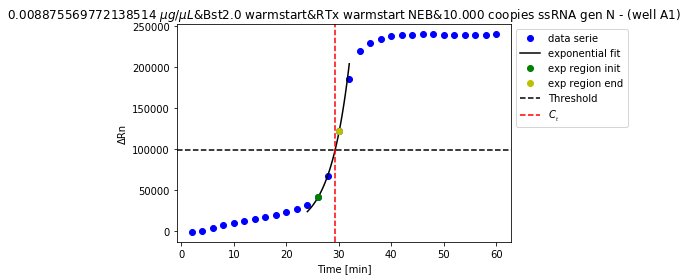

Ct value is: 29.310978371961674
Figure saved!


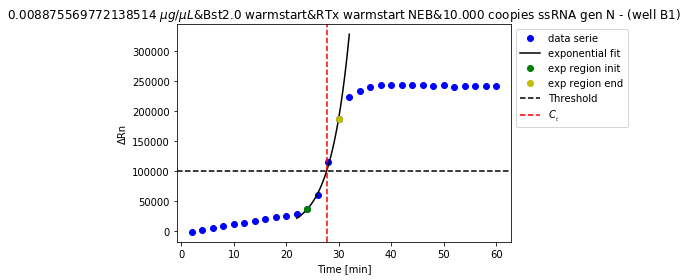

Ct value is: 27.659447754150683
Figure saved!


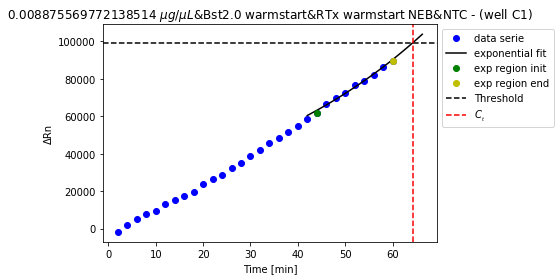

Ct value is: 64.28921956908329
Figure saved!


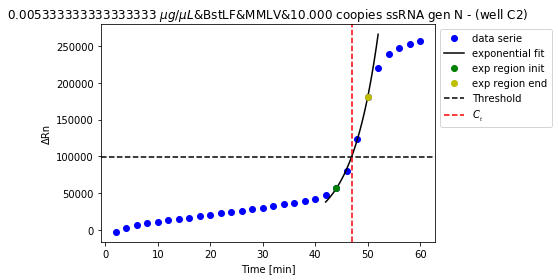

Ct value is: 46.931985964294135
Figure saved!


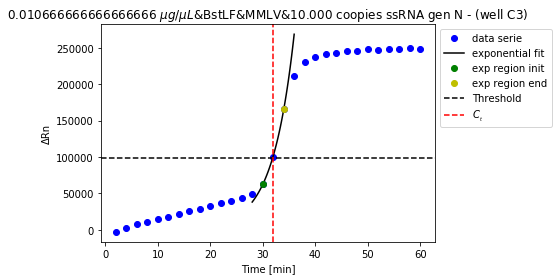

Ct value is: 31.917750091537638
Figure saved!


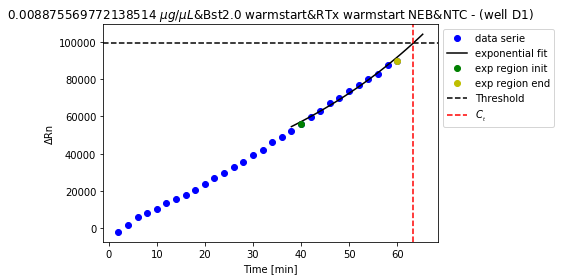

Ct value is: 63.31117625951641
Figure saved!


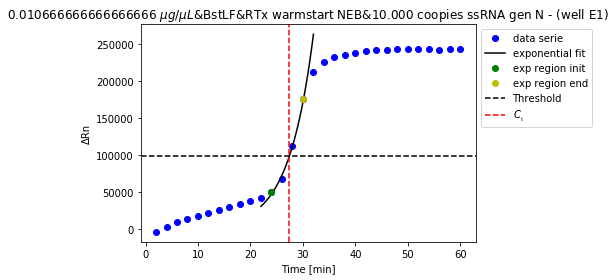

Ct value is: 27.422845957319343
Figure saved!


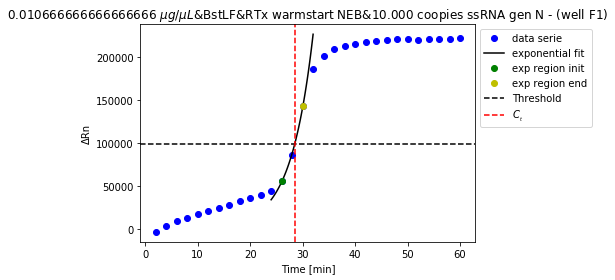

Ct value is: 28.50083374424002
Figure saved!


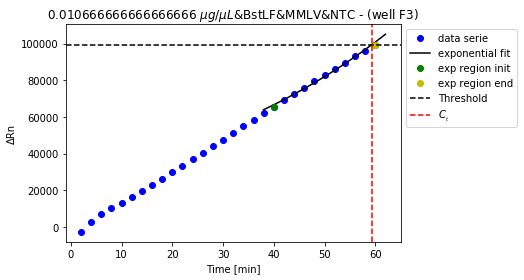

Ct value is: 59.27233463514969
Figure saved!


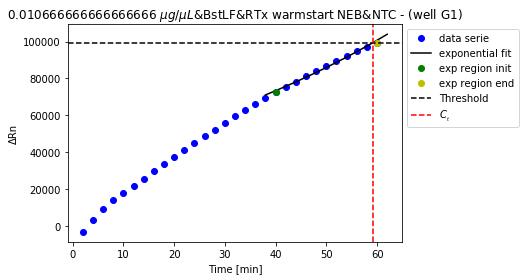

Ct value is: 59.10495833663732
Figure saved!


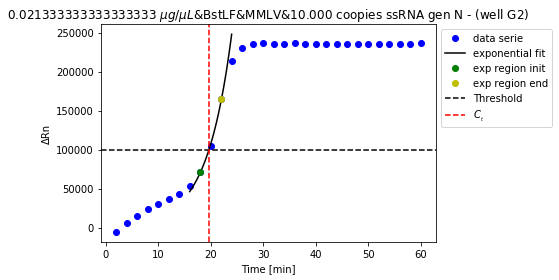

Ct value is: 19.64880699326149
Figure saved!


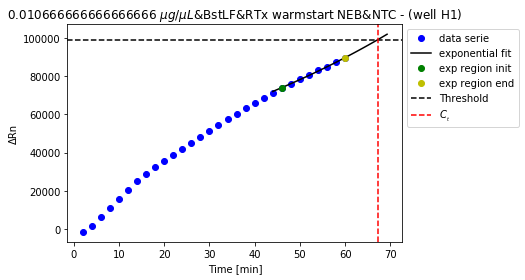

Ct value is: 67.24531311174535


In [99]:
thr_value = thr_range[0]
clf_idx = 7
Tt_values, thr_figures = rdm.explore_thr(thr_value, well_sets[wset_idx].dsets[dset_idx], function = rdm.f_10exp_lineal, 
           attr_name='exponential', lp_name='Amplification response region', 
           clf = well_sets[wset_idx].clfs[clf_idx] ,save = True)

In [100]:
rdm.print_list(figures)#,title)

[0] 'RT-LAMP_test' figure
[1] 'RT-LAMP_test - Melting' figure


12  lines were plotted



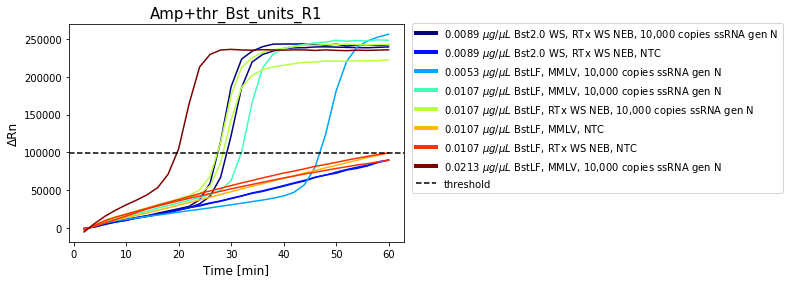

In [101]:
# choose the figure
fig_idx = 0

# copy and add threshold
fig_thr = rdm.copy_figure(figures[fig_idx])
fig_thr.thr_line = thr_value

# indicate the title
fig_thr.title = 'Amp+thr_Bst_units_R1'

#display it
rdm.display_figure(fig_thr)#,filename = 'Real_time_data/Plots/'+fig_thr.title) # )#

if threshold is fine: 
- add it as an attribute to data_set
- store the Tt value <br>

else: <br> 
- define a new threshold



In [102]:
# append the figure to figures and to well_set
figures.append(fig_thr)
well_set.fgs.append(fig_thr)

In [103]:
well_sets[wset_idx].dsets[dset_idx].threshold = thr_value
well_sets[wset_idx].dsets[dset_idx].Tt_values = Tt_values  ## Tt : Threshold time

##### Figure management

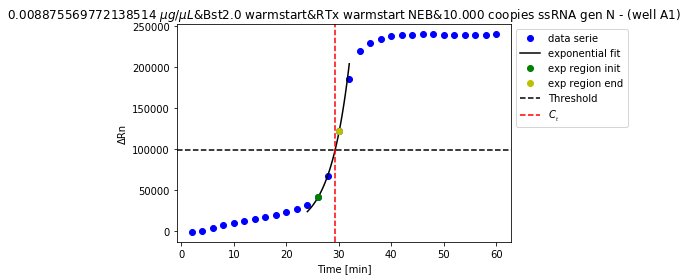

In [104]:
# then you can display any figure
well_sets[wset_idx].dsets[dset_idx].thr_figures[s_wells[0]][0]
# other way --> thr_figures[s_wells[0]]

In [106]:
# or save it
fig = well_sets[wset_idx].dsets[dset_idx].thr_figures[s_wells[0]][0]
legend = well_sets[wset_idx].dsets[dset_idx].thr_figures[s_wells[0]][1]
rdm.save_fig('figura_test_save', fig, legend)

### Database update
Finally, store the elements of interest into the database

In [107]:
rdm.print_list(database.list_names)

[0] wells
[1] well_sets
[2] figures
[3] components
[4] reactions
[5] enzymes


In [125]:
## add all the new objects to the database
## .append_obj include only the elements which are not previosly stored in the database
database.append_objs('wells', wells)
database.append_objs('well_sets', well_sets)
database.append_objs('figures', figures)
database.append_objs('reactions', reactions)

In [126]:
# update the database
database.save()


there is a previous version of " LAMP_COVID.pkl " file

do you want to update it? (y/n): y

file " LAMP_COVID.pkl " was updated


In [24]:
classifications = list()    # create a list to store the classifications

In [25]:
#if it's fine, append to the classification list or replace someone
classifications.append(classification)
#classifications[-1] = classification

With `create_dataset` you are able to create sets of data for plotting. It allos you to further reduce the group by selecting just some desired labels (or sub labels) and/or some reduced list of wells.<br>
In the simplest way, just input the created classification

In [26]:
data_sets = list()

In [27]:
data_sets.append(rdm.create_dataset(classification))
#Amplification data BstLF Units R3

enter a name for the dataset: amplification
choose the data to use: 

[ 0 ] Amplification data

input the number: 0

" Amplification data " was selected

current series are: 

[ 0 ] Cycle
[ 1 ] ΔRn

choose x data index: 0

choose y data index: 1


Now you can properly define a figure and create it as an object.<br>
if there is already some figures, you can copy one of them with `copy_figure` and modify just some attributes afterwards.

In [6]:
wells = database.elements['wells']

In [8]:
s_wells = rdm.select_objects(wells, 'fname',['Bst_Units_3_data.xlsx'])

32 objects were selected based on ['fname'] attribute


In [33]:
for well in s_wells:
    n_value =  "Home made Isothermal Amplification Buffer (HM-IAB)"
    n_attribute = 'buffer'
    
    attr_to_new(well,'B2','s_name',n_attribute, n_value, ask = True)
    #print(well.s_name)


There is a previous version of buffer for A1 from Home made BstLF units estimation - rep 3 experiment in Bst_Units_3_data.xlsx file

It will be replaced. Please confirm (y/n): y

Attribute assigned

There is a previous version of buffer for A2 from Home made BstLF units estimation - rep 3 experiment in Bst_Units_3_data.xlsx file

It will be replaced. Please confirm (y/n): y

Attribute assigned

There is a previous version of buffer for B1 from Home made BstLF units estimation - rep 3 experiment in Bst_Units_3_data.xlsx file

It will be replaced. Please confirm (y/n): n
Old attribute version was keep and the new lost

There is a previous version of buffer for B2 from Home made BstLF units estimation - rep 3 experiment in Bst_Units_3_data.xlsx file

It will be replaced. Please confirm (y/n): y

Attribute assigned

There is a previous version of buffer for C1 from Home made BstLF units estimation - rep 3 experiment in Bst_Units_3_data.xlsx file

It will be replaced. Please confirm (y/n):

In [293]:
plt.get_cmap('Greens_r')(np.linspace(0, 1, 5))

array([[0.        , 0.26666667, 0.10588235, 1.        ],
       [0.13817762, 0.54608228, 0.27132641, 1.        ],
       [0.45767013, 0.76991926, 0.46502115, 1.        ],
       [0.78316032, 0.91483276, 0.75589389, 1.        ],
       [0.96862745, 0.98823529, 0.96078431, 1.        ]])

In [295]:
plt.get_cmap('jet')(np.linspace(0, 1, 5))

array([[0.        , 0.        , 0.5       , 1.        ],
       [0.        , 0.50392157, 1.        , 1.        ],
       [0.49019608, 1.        , 0.47754586, 1.        ],
       [1.        , 0.58169935, 0.        , 1.        ],
       [0.5       , 0.        , 0.        , 1.        ]])

In [ ]:
['BstHMD1','BstHMDE','BstHMDO','BstHMD20']

In [28]:
figures=list()  #create a list to store figure elements

In [30]:
#Data_serie(x, y, well_name, group, well_pos, well_idx)
#Data_set(set_name, group_names, idxs, series, x_name, y_name, x_units, y_units)
#Figure(data_set, colors, title, x_text, y_text, ax_tsize, x_lim, y_lim, lgd_text, lgd_lines, log_scale, thr_line )

#parameters to create a figure:
dataset_index = -1                 # data_set object index used in the figure
f_ds = data_sets[dataset_index]    
ds_group_names = f_ds.group_names    # data_set groups names
f_title = "RT-LAMP_test"
f_xtext = f_ds.x_name
f_ytext = f_ds.y_name
f_ax_text_size = 12
f_x_lim = None
f_y_lim = None
f_log_scale = False          # True or False
f_lgd_text = ds_group_names
f_color_list = list()        #initiate here and fill after define the lines colors
f_lgd_lines = list()         #initiate here and fill after define the lines colors


#####################################
# define color vectors for lines
#####################################

color_groups = ['Bst2','BstHM']
extras_name = 'Others'   # to indicate and display lines not indicated in color_groups --> it is important as a check!
color_groups.append(extras_name)

cmap_names = ['Blues_r','Reds_r','Greens_r','Greys_r']  # it has to be same lenght as color_groups + extra name
# to get a list of color available color maps, run this: list(plt.cm.datad.keys())

#### cathegorize the ds_group_names into a color_group #####

col_g_dic = {}

for g_name in color_groups:
    
    col_g_dic[g_name] = []
    

for ds_g_name in ds_group_names:   #each group name in dataset group names
    catergorized = False
    
    for g_name in color_groups:

        if g_name in ds_g_name: #if this color_group is part of this data_set group name

            col_g_dic[g_name].append(ds_g_name)
            catergorized = True   #--> to inidcate it was categorized
            break    # to cathegorize just one time
        
    if catergorized == False:
        # if isn´t in any group, it's categorized as "others group"

        col_g_dic[extras_name].append(ds_g_name)

print("color groups are: \n")
print(col_g_dic)


########## create colors vectors ###########

grouped_colors = {}
for c_group, cmap in zip(color_groups, cmap_names):
    grouped_colors[c_group] = plt.get_cmap(cmap)(np.linspace(0, 1, 2*len(col_g_dic[c_group]))) # 2*len() to avoid too light colors

line_colors = {}
for c_group in list(col_g_dic.keys()):
    group_names = col_g_dic[c_group]
    for i in range(0,len(group_names)): 
        line_colors[group_names[i]] = grouped_colors[c_group][i]

##### Define the color list #####
# this is a particular assignation way for this plot

for serie in f_ds.series:
    f_color_list.append(line_colors[serie.group])
 ## --> this way they are in the same order as the serie elements.

#####################################
# Finally, create the legend lines ##

#this is a particular definition for this plot
for txt in f_lgd_text:
    line = Line2D([0], [0], color = line_colors[txt], lw=4)
    f_lgd_lines.append(line)    
    
"""
if you want to make just one line legend for each color_groups:
f_lgd_text = color_groups
for txt in f_lgd_text:
    line = Line2D([0], [0], color = grouped_colors[txt], lw=4)
    f_lgd_lines.append(line)
"""
#######################################
###### create the figure element ###### 

figures.append(rdm.Figure(f_ds, f_color_list, f_title, f_xtext, f_ytext, f_ax_text_size, f_x_lim, f_y_lim , f_lgd_text, f_lgd_lines, f_log_scale))
#figures[-1] = (rdm.Figure(f_ds, f_color_list, f_title, f_xtext, f_ytext, f_ax_text_size, f_x_lim, f_y_lim , f_lgd_text, f_lgd_lines, f_log_scale))


color groups are: 

{'Bst2': ['Bst2+RTx'], 'BstHM': ['BstHM16+MML32', 'BstHM32+MMLV32', 'BstHM64+MMLV32'], 'Others': []}


7  lines were plotted



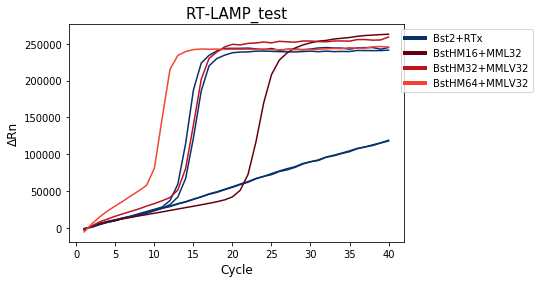

In [31]:
fig_idx = -1
rdm.display_figure(figures[fig_idx],filename = 'Real_time_data/Plots/'+figures[fig_idx].title) # )#

### Define dataset threshold

Here is convenient to understimate a bit the minimal value in each set because the dataset threshold will be $>=$ of that value


There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.12181804 -2.13000483]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.99995373e-08 8.76368608e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.14922651 -3.52564495]


D:\Github\BstLF\rt_module\rt_data_manage.py:1222: RuntimeWarning: invalid value encountered in log10
  
D:\Github\BstLF\rt_module\rt_data_manage.py:1231: RuntimeWarning: invalid value encountered in log10
  plt.axvline(xY,color='y', ls ='--', label = 'end' )


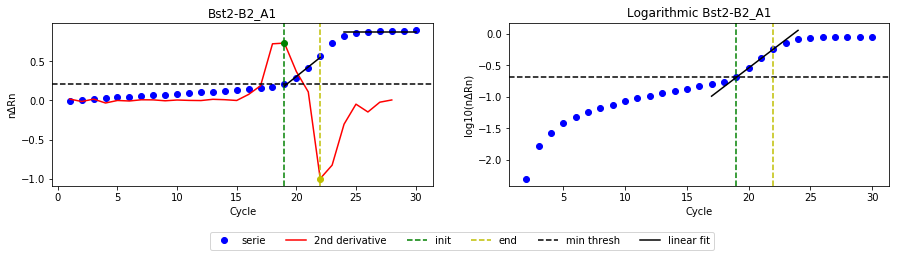


* init (green) = [ 19 , 0.7336738636194778 ]
* end (yellow) = [ 22 , -1.0 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.12167447 -1.71527308]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.98620925e-08 9.90093435e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.13858742 -2.86985909]


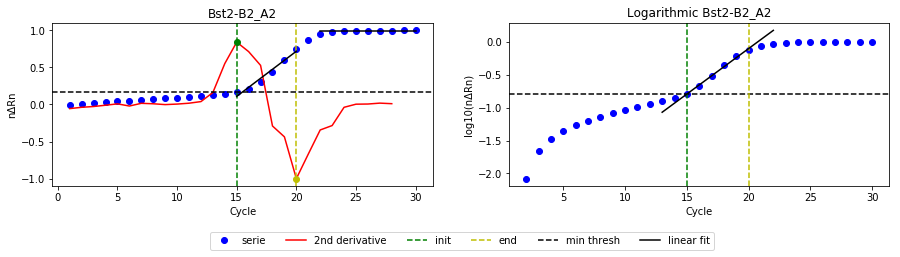


* init (green) = [ 15 , 0.8413716077314437 ]
* end (yellow) = [ 20 , -1.0 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.08536551 -1.84187283]
fitted <function f_linear at 0x000001A07B29F158> parameter values [5.68961855e-08 7.45678442e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.1005916  -3.06141502]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


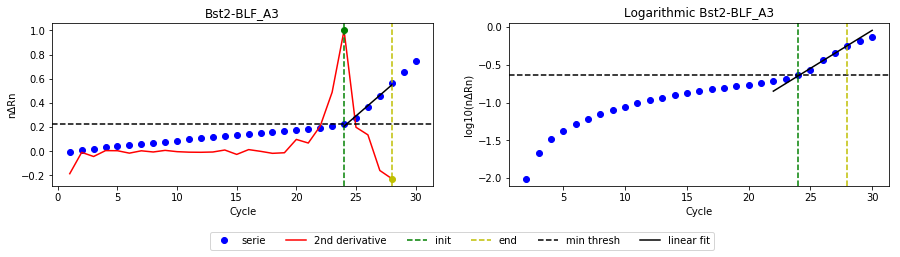


* init (green) = [ 24 , 1.0 ]
* end (yellow) = [ 28 , -0.22596307535500013 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.09025473 -1.95485514]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.90337803e-08 7.24123347e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.11470213 -3.40389384]


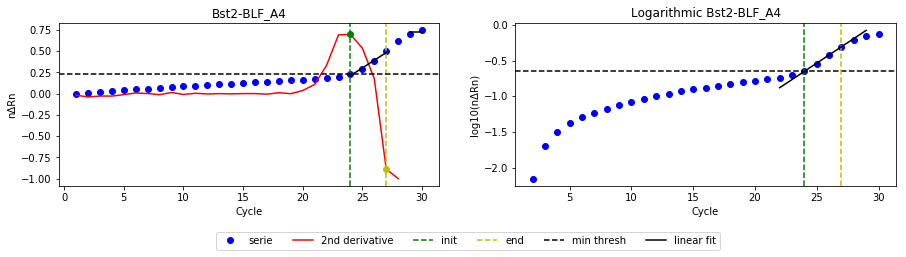


* init (green) = [ 24 , 0.6954756283103213 ]
* end (yellow) = [ 27 , -0.8870088185672431 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.14255492 -2.16884181]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.99883260e-08 9.63600401e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.15836598 -3.27081147]


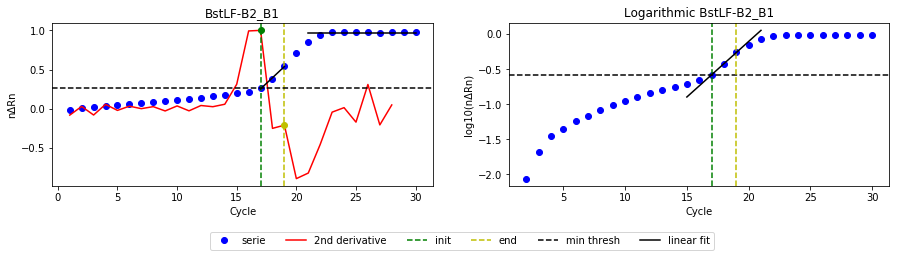


* init (green) = [ 17 , 1.0 ]
* end (yellow) = [ 19 , -0.20724423543572273 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.01244151 -0.14501982]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.02646601 -1.43445194]


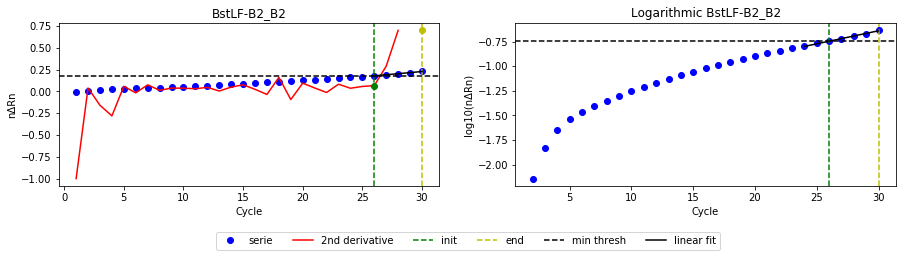


* init (green) = [ 26 , 0.0663925085467968 ]
* end (yellow) = [ 30 , 0.7001858916836868 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.11329055 -2.75020915]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.13652832 -4.21890133]


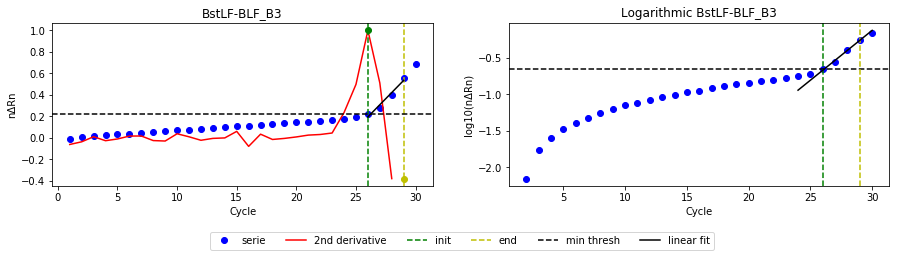


* init (green) = [ 26 , 1.0 ]
* end (yellow) = [ 29 , -0.3782815441741699 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.05410093 -1.26141545]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.08170965 -2.89119762]


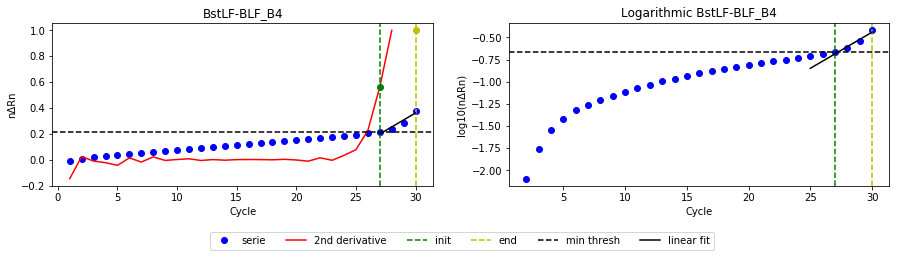


* init (green) = [ 27 , 0.563685839146603 ]
* end (yellow) = [ 30 , 1.0 ]

Are the min and max values appropiate to the response region?
(y/n): n
enter new x position of green line: 28
enter new x position of yellow line: 30
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.07066614 -1.74732835]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.100949   -3.45555204]


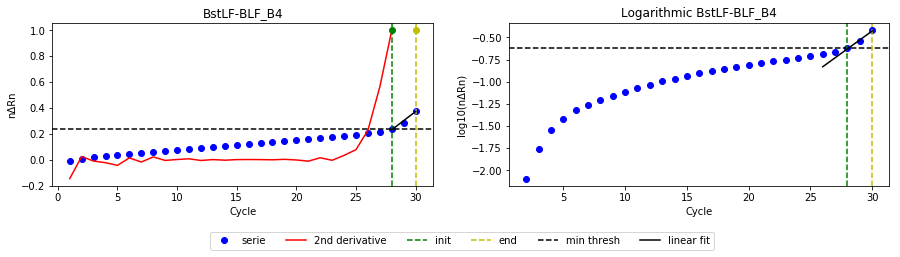


* init (green) = [ 28 , 1.0 ]
* end (yellow) = [ 30 , 1.0 ]

are the new values appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.07914348 -0.36435715]
fitted <function f_linear at 0x000001A07B29F158> parameter values [6.61884873e-17 6.11514608e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.08855764 -1.26452654]


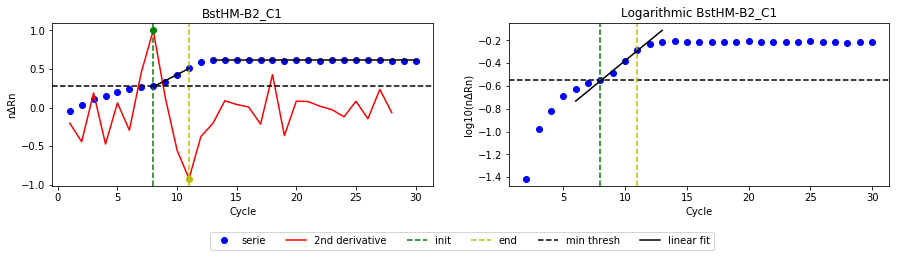


* init (green) = [ 8 , 1.0 ]
* end (yellow) = [ 11 , -0.9207048721210058 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.05344124 -0.15592652]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.9999881e-08 6.2054220e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.0576465  -1.00237605]


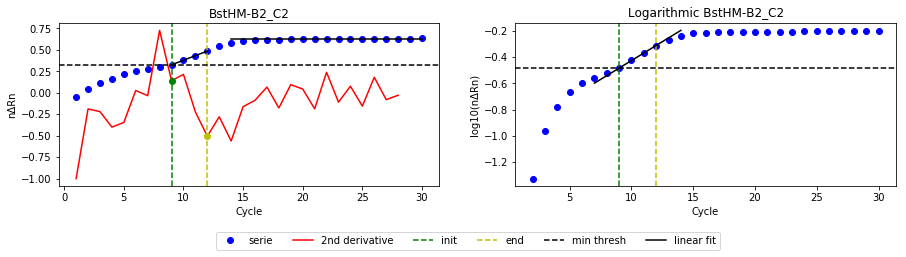


* init (green) = [ 9 , 0.13977050508659494 ]
* end (yellow) = [ 12 , -0.5054024136203987 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.08470229 -0.45684687]
fitted <function f_linear at 0x000001A07B29F158> parameter values [3.07021112e-19 6.00308383e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.10666684 -1.4884175 ]


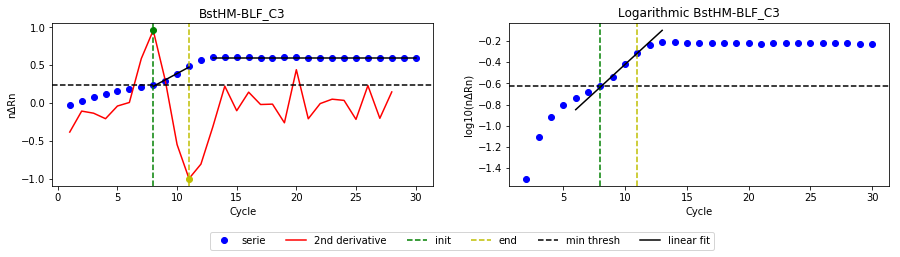


* init (green) = [ 8 , 0.9610946330982297 ]
* end (yellow) = [ 11 , -1.0 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.07274955 -0.53455807]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.97762736e-08 5.40670360e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.093402   -1.59808841]


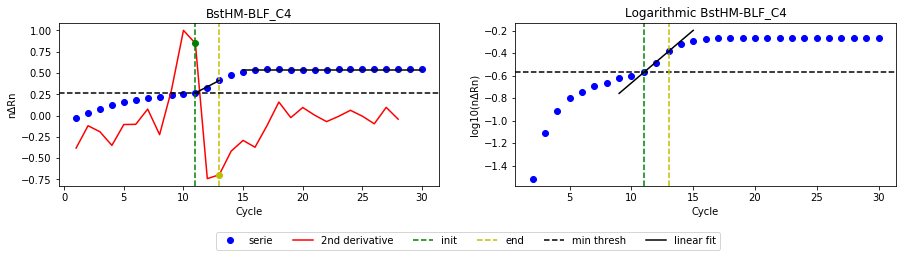


* init (green) = [ 11 , 0.8471452675741615 ]
* end (yellow) = [ 13 , -0.6952196912693527 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.1647836  -1.35446328]
fitted <function f_linear at 0x000001A07B29F158> parameter values [2.50122199e-17 8.05006055e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.16076197 -2.12687412]


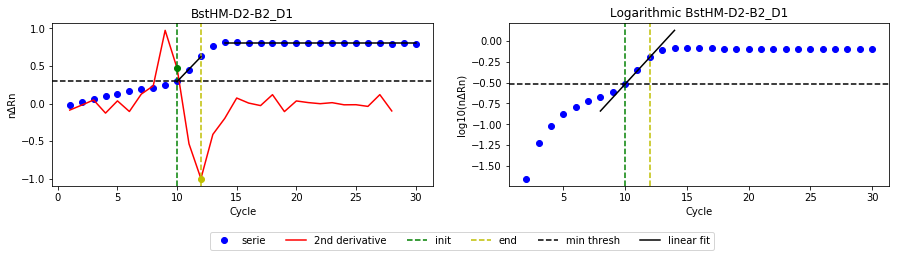


* init (green) = [ 10 , 0.4696273285714762 ]
* end (yellow) = [ 12 , -1.0 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.15050343 -1.22190201]
fitted <function f_linear at 0x000001A07B29F158> parameter values [2.77692299e-17 7.96608226e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.15337395 -2.06791967]


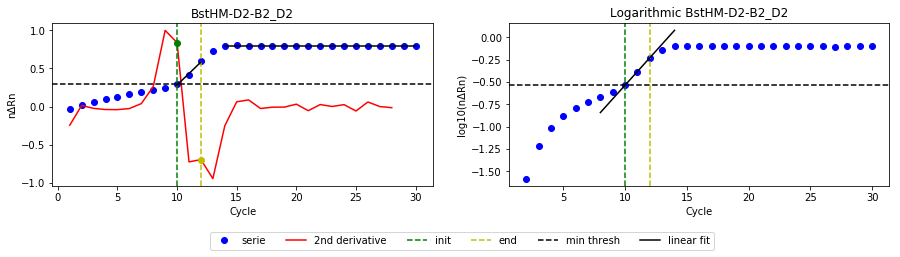


* init (green) = [ 10 , 0.8382340760374389 ]
* end (yellow) = [ 12 , -0.696956508921013 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.06849243 -0.68907133]
fitted <function f_linear at 0x000001A07B29F158> parameter values [8.45260426e-19 7.14788714e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.07337322 -1.57704151]


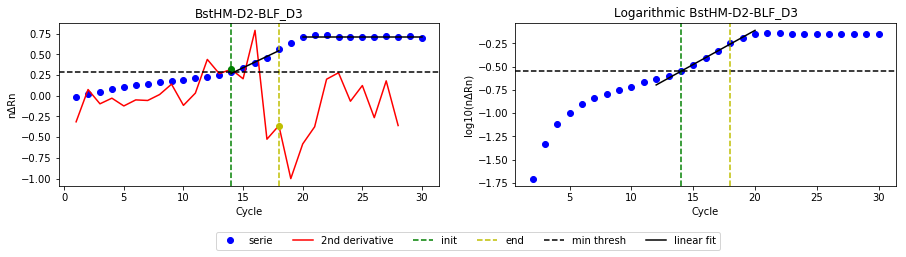


* init (green) = [ 14 , 0.3194118469359977 ]
* end (yellow) = [ 18 , -0.3602615321605588 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.07441899 -0.43590807]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.92595340e-08 7.33433394e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.09709929 -1.51207958]


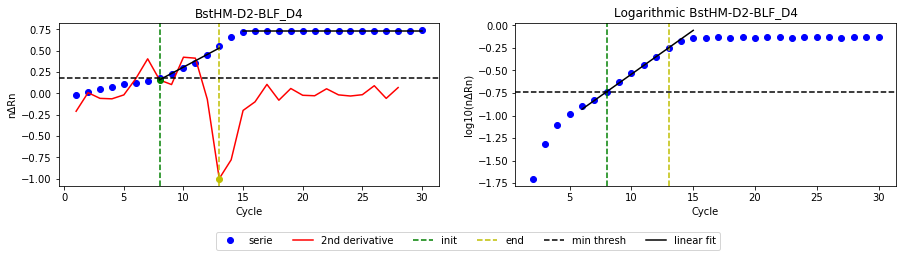


* init (green) = [ 8 , 0.1575811522454799 ]
* end (yellow) = [ 13 , -1.0 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.14351164 -1.52707118]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.99987398e-08 8.89213593e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.15761121 -2.54991388]


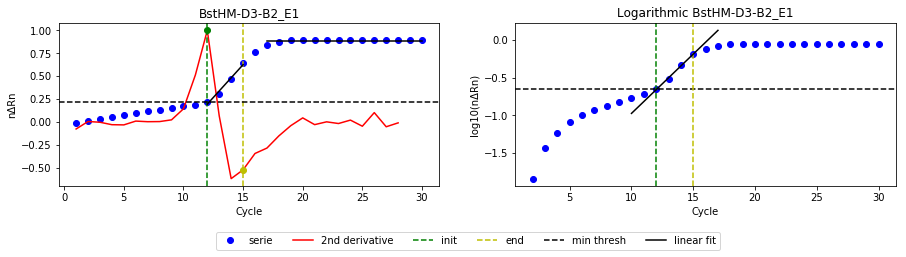


* init (green) = [ 12 , 1.0 ]
* end (yellow) = [ 15 , -0.5228109979829298 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.10049616 -0.983299  ]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.99854972e-08 8.79353888e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.09322867 -1.70550483]


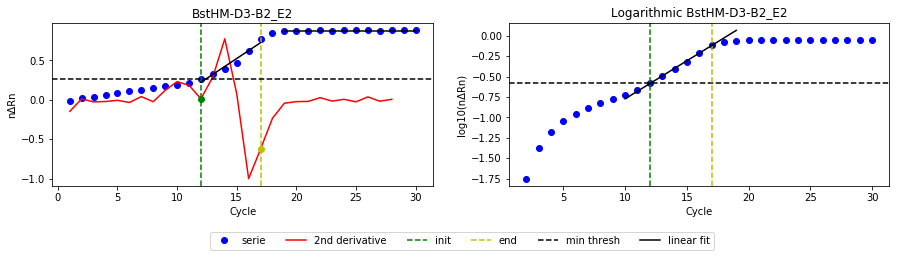


* init (green) = [ 12 , 0.014153381969414944 ]
* end (yellow) = [ 17 , -0.6245883742917215 ]

Are the min and max values appropiate to the response region?
(y/n): n
enter new x position of green line: 11
enter new x position of yellow line: 17
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.09034818 -0.82769659]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.99854972e-08 8.79353888e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.09149344 -1.67889793]


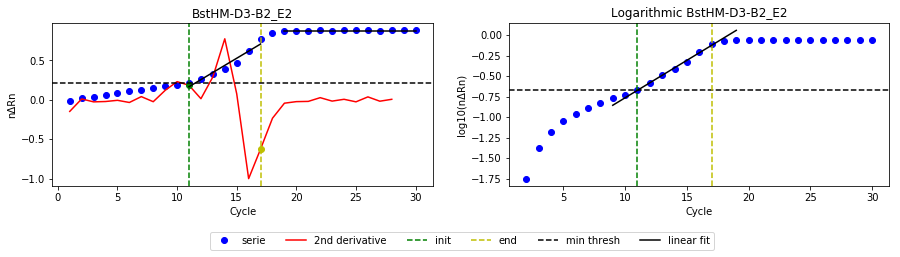


* init (green) = [ 11 , 0.18426656540920117 ]
* end (yellow) = [ 17 , -0.6245883742917215 ]

are the new values appropiate?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.14586377 -2.11450215]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.99998289e-08 8.36049548e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.14850853 -2.98901132]


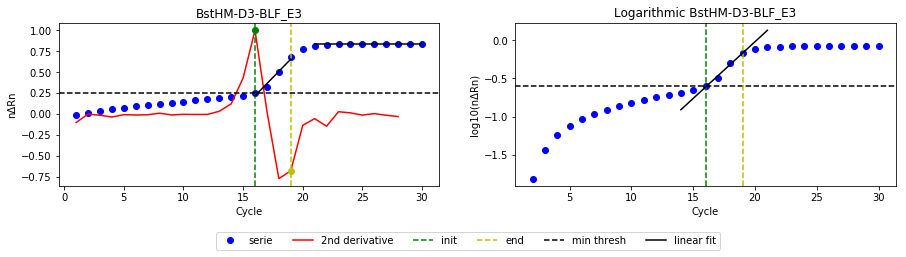


* init (green) = [ 16 , 1.0 ]
* end (yellow) = [ 19 , -0.6756503338844715 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.1541519  -2.22231425]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.86418942e-08 7.84336184e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.16939025 -3.30174118]


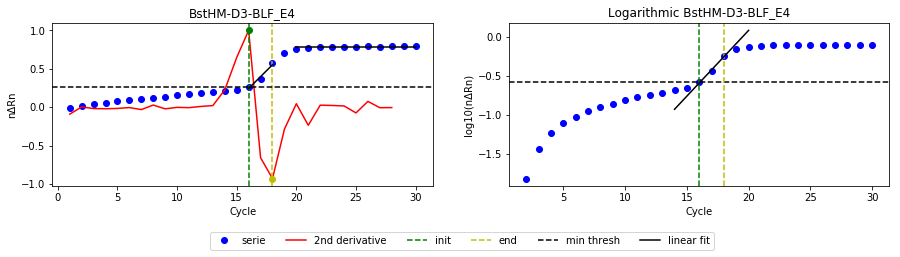


* init (green) = [ 16 , 1.0 ]
* end (yellow) = [ 18 , -0.9288206369893781 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.11242341 -1.58600022]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.99998334e-08 8.76158217e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.15896825 -3.24722759]


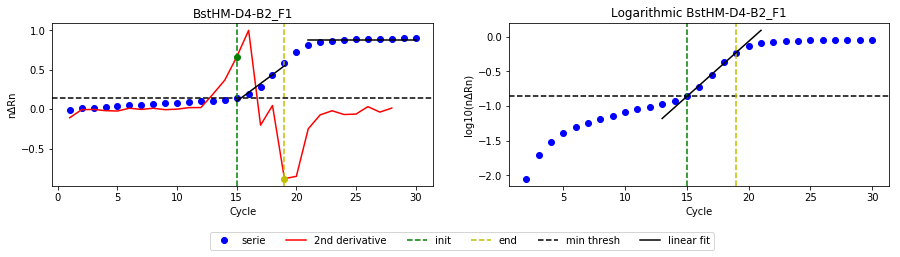


* init (green) = [ 15 , 0.6630716038647586 ]
* end (yellow) = [ 19 , -0.8813076139194591 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.16640716 -2.48718355]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.99932568e-08 9.27642550e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.17699424 -3.51371944]


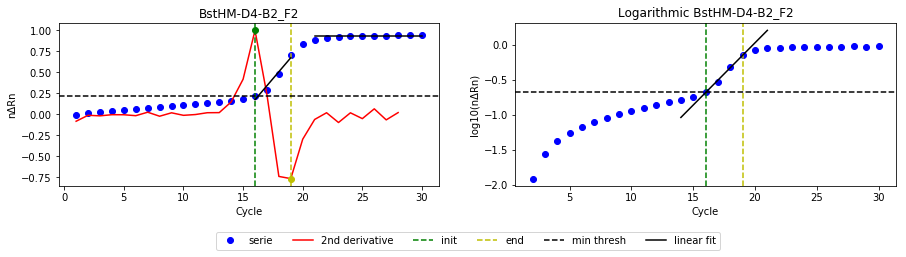


* init (green) = [ 16 , 1.0 ]
* end (yellow) = [ 19 , -0.7633857854327751 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.1131691  -1.35297141]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.99999699e-08 8.63835876e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.17560926 -3.13134456]


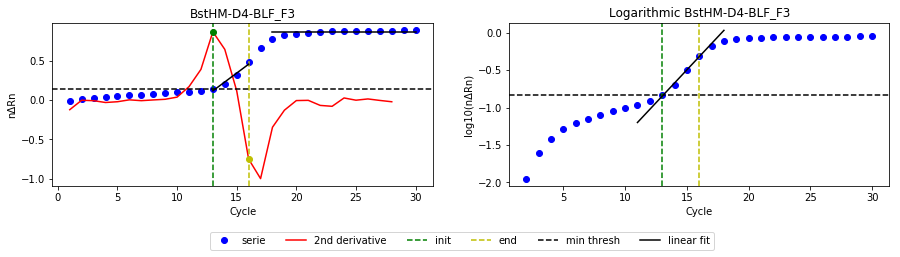


* init (green) = [ 13 , 0.8708004747935215 ]
* end (yellow) = [ 16 , -0.7513690386536647 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.11258138 -1.95637133]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.99996136e-08 8.61339885e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.12245497 -2.99557267]


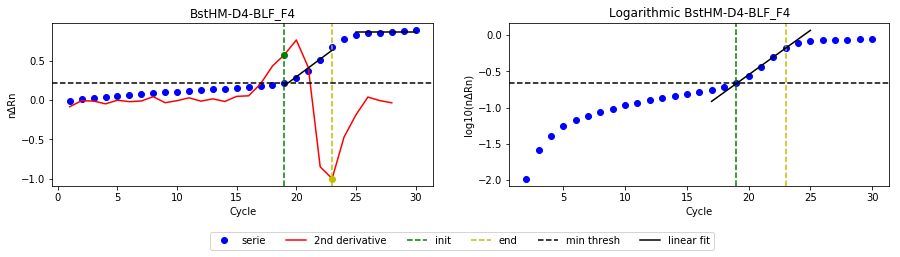


* init (green) = [ 19 , 0.5754512116670095 ]
* end (yellow) = [ 23 , -1.0 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.10787433 -2.3750892 ]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.62081335e-08 7.89551208e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.15420925 -4.40109224]


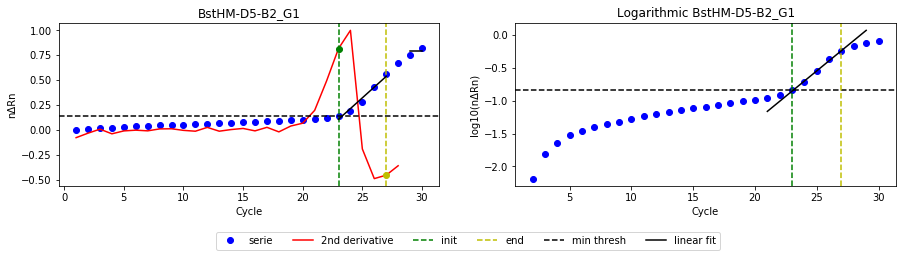


* init (green) = [ 23 , 0.8166841717365313 ]
* end (yellow) = [ 27 , -0.4553941566095086 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.12263592 -2.61412234]
fitted <function f_linear at 0x000001A07B29F158> parameter values [9.99994199e-08 8.46761224e-01]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.17122298 -4.65821306]


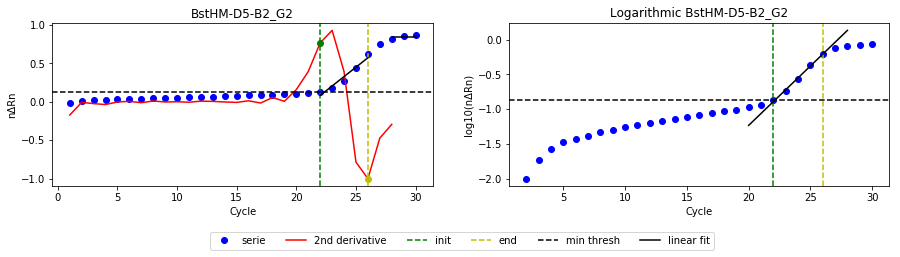


* init (green) = [ 22 , 0.7685625823331103 ]
* end (yellow) = [ 26 , -1.0 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.00650227 -0.02302686]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.01767101 -1.29402326]


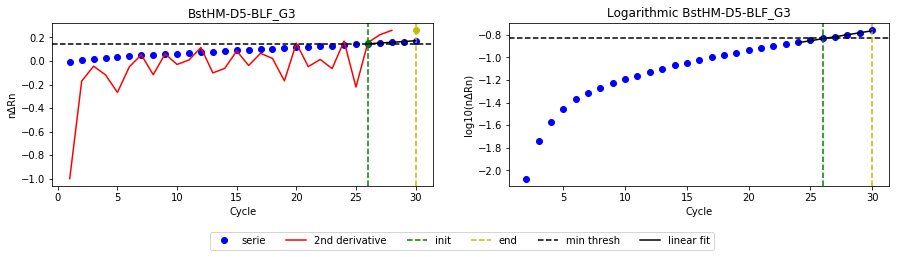


* init (green) = [ 26 , 0.156639369603198 ]
* end (yellow) = [ 30 , 0.26046647062629863 ]

Are the min and max values appropiate to the response region?
(y/n): y

There is a stored Amplification response region


** if you change it, this version will be replaced **

fitted <function f_linear at 0x000001A07B29F158> parameter values [0.00462294 0.00757645]
fitted <function f_linear at 0x000001A07B29F158> parameter values [ 0.0146793  -1.27473733]


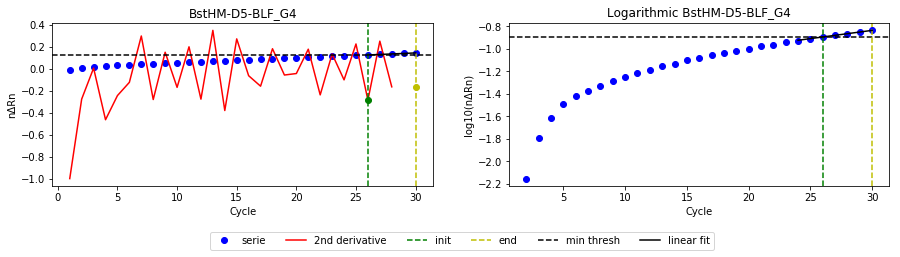


* init (green) = [ 26 , -0.28469492812886255 ]
* end (yellow) = [ 30 , -0.1629890770692562 ]

Are the min and max values appropiate to the response region?
(y/n): y


In [42]:
dataset_idx = 0
thr_lims, points = rdm.exponential_region(data_sets[dataset_idx], derivative ='forward')

Know it's time to define the the threshold value. It should be between the limits defined in the previous step (`thr_lims`).<br>
A first approach is to define it as `thr_lims[0]` but it could anyone

In [43]:
thr_lims

[100889.890625, 44994.703125]

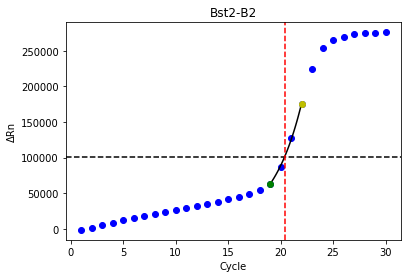

Ct value is: 20.379597063080066


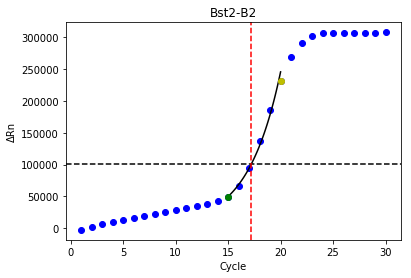

Ct value is: 17.212169940101333


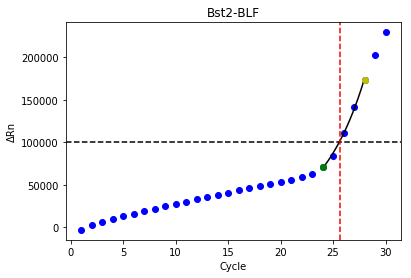

Ct value is: 25.617905706153493


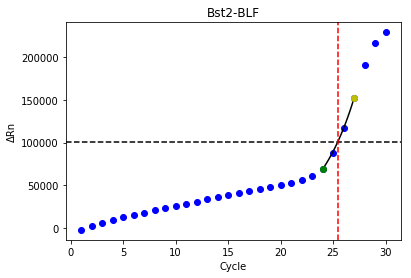

Ct value is: 25.45223043536747


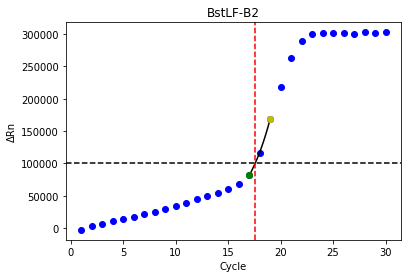

Ct value is: 17.594325941833088


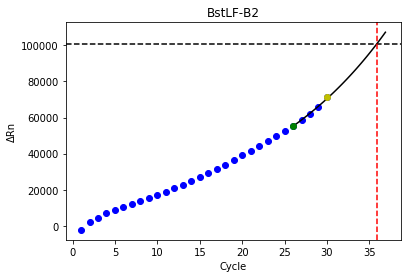

Ct value is: 35.894455062007296


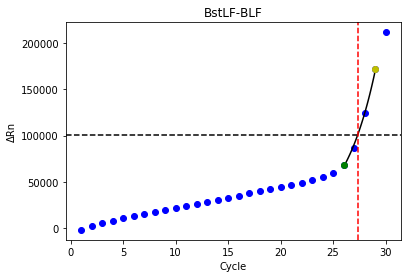

Ct value is: 27.352804534398537


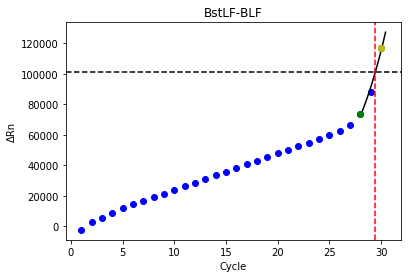

Ct value is: 29.43152582620138


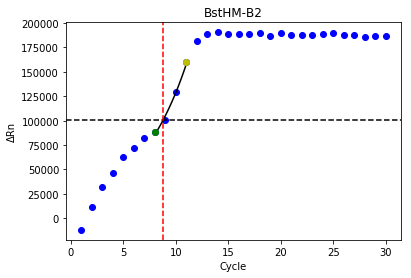

Ct value is: 8.808473870541775


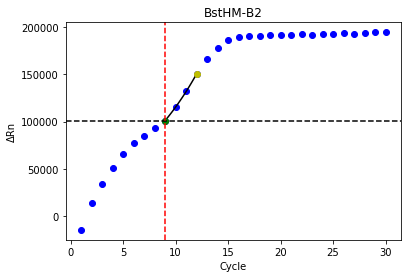

Ct value is: 8.984192417040198


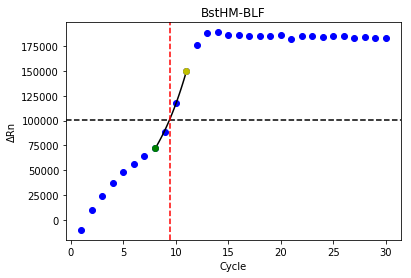

Ct value is: 9.412003698409917


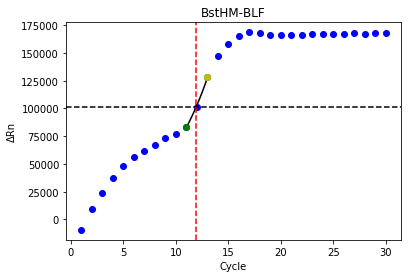

Ct value is: 11.92286698017417


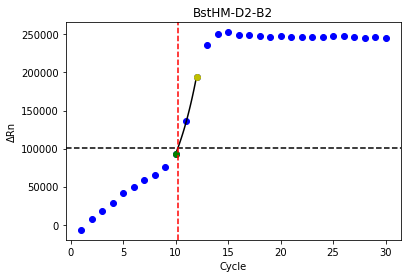

Ct value is: 10.216379574940754


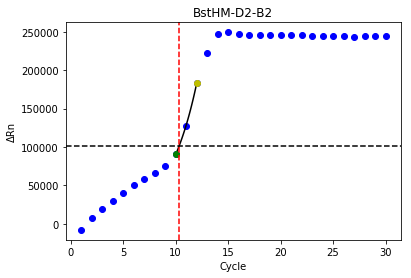

Ct value is: 10.324118629169401


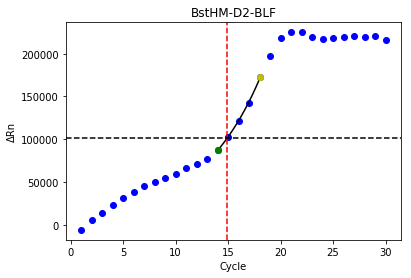

Ct value is: 14.890618145800815


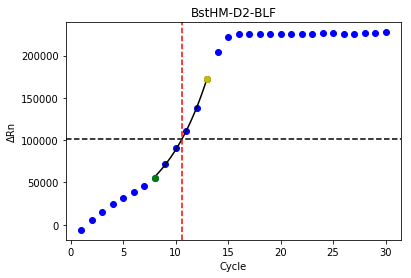

Ct value is: 10.583091965177081


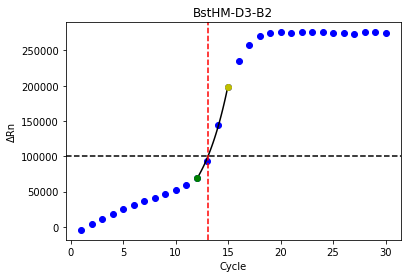

Ct value is: 13.104683938569547


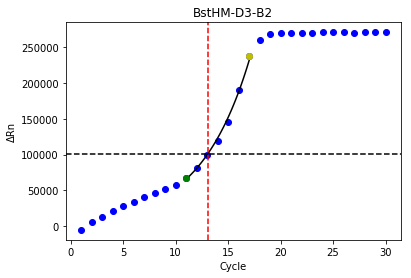

Ct value is: 13.054806315017485


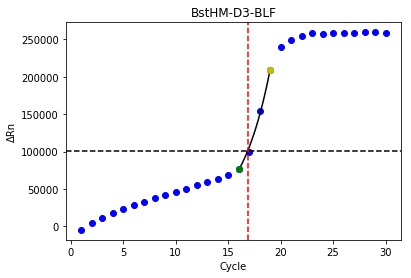

Ct value is: 16.864636787960126


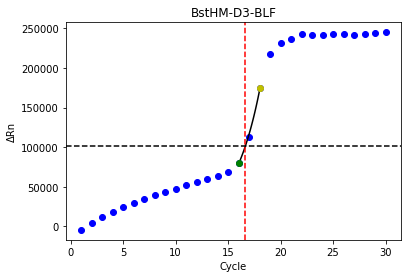

Ct value is: 16.631845196227456


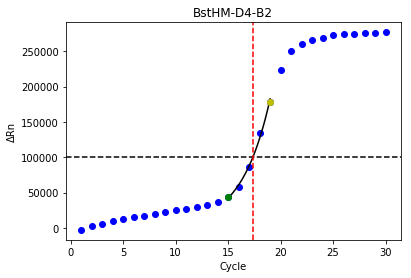

Ct value is: 17.37931149056052


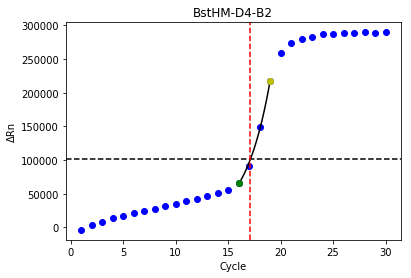

Ct value is: 17.114966678235866


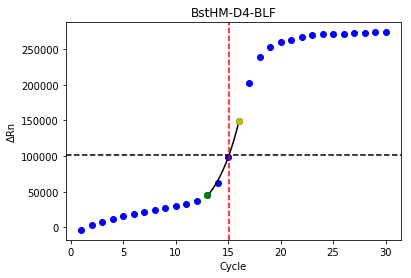

Ct value is: 15.072529392542016


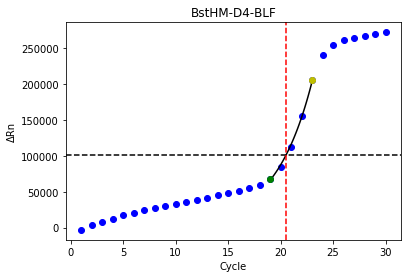

Ct value is: 20.506344529671694


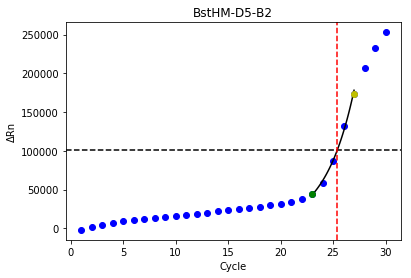

Ct value is: 25.39810955052911


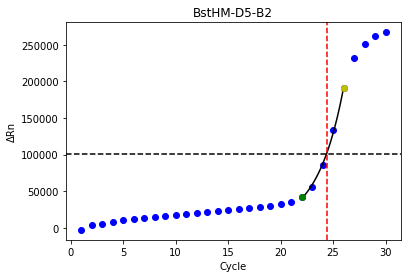

Ct value is: 24.376075188469436


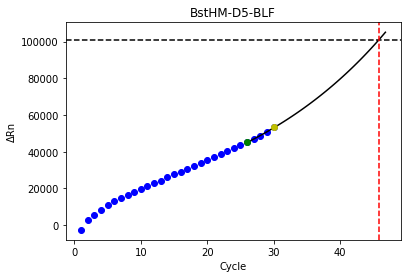

Ct value is: 45.8125825656303


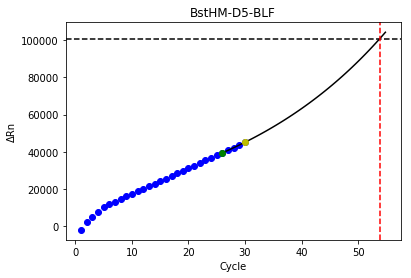

Ct value is: 53.835554158079596


[20.379597063080066,
 17.212169940101333,
 25.617905706153493,
 25.45223043536747,
 17.594325941833088,
 35.894455062007296,
 27.352804534398537,
 29.43152582620138,
 8.808473870541775,
 8.984192417040198,
 9.412003698409917,
 11.92286698017417,
 10.216379574940754,
 10.324118629169401,
 14.890618145800815,
 10.583091965177081,
 13.104683938569547,
 13.054806315017485,
 16.864636787960126,
 16.631845196227456,
 17.37931149056052,
 17.114966678235866,
 15.072529392542016,
 20.506344529671694,
 25.39810955052911,
 24.376075188469436,
 45.8125825656303,
 53.835554158079596]

In [44]:
thr_value = thr_lims[0]
rdm.explore_Ct(thr_value, data_sets[dataset_idx], function = rdm.f_10exp_lineal, fp_name=['a','b','N'], lp_name='Amplification response region')

if agree with the threshold value, then assign it to the *theshold* data_set attribute <br>
Also assign the Ct value as a parameter to each well.

In [45]:
thr_value = thr_lims[0]
# assign the threshold
data_sets[dataset_idx].threshold = thr_value

# assign the Ct values
for serie in data_sets[dataset_idx].series:
    well = serie.well
    rdm.assign_Ct(thr_value, well)


to determine the concentration:
<ol>
<li>assign the concentration to each BstHM</li> 
<li>fit a function</li>
<li>compute the reverse</li>
<li>compute the Bst2.0 and BstLF values</li>
</ol>

In [46]:
# Relation between name and concentration
name_concentration = {
    'BstHM-B2': 2.0,
    'BstHM-BLF':2.0,
    'D2' : 1.066666667,
    'D3' : 0.533333333,
    'D4' : 0.266666667,
    'D5' : 0.133333333
}

In [47]:
# assign the relation as a well parameter
for serie in data_sets[dataset_idx].series:
    well = serie.well
    for name in list(name_concentration.keys()):
        if name in well.s_name:
            
            concentration = name_concentration[name]
            print(well.s_name, 'is', concentration)
            setattr(well, 'Bst_concentration', concentration)

BstHM-B2 is 2.0
BstHM-B2 is 2.0
BstHM-BLF is 2.0
BstHM-BLF is 2.0
BstHM-D2-B2 is 1.066666667
BstHM-D2-B2 is 1.066666667
BstHM-D2-BLF is 1.066666667
BstHM-D2-BLF is 1.066666667
BstHM-D3-B2 is 0.533333333
BstHM-D3-B2 is 0.533333333
BstHM-D3-BLF is 0.533333333
BstHM-D3-BLF is 0.533333333
BstHM-D4-B2 is 0.266666667
BstHM-D4-B2 is 0.266666667
BstHM-D4-BLF is 0.266666667
BstHM-D4-BLF is 0.266666667
BstHM-D5-B2 is 0.133333333
BstHM-D5-B2 is 0.133333333
BstHM-D5-BLF is 0.133333333
BstHM-D5-BLF is 0.133333333


In [48]:
# select wells using AND logic
wells_HMB2=rdm.select_objects(wells, 's_name','BstHM')
wells_HMB2=rdm.select_objects(wells_HMB2, 's_name','B2')

# 1 create labels
label_wells = wells_HMB2
label_attr = ['s_name']  # list with the attribute names cathegories to use as well labels
labels, _, _ = rdm.get_attribute_labels(wells_HMB2 ,label_attr)

# 2 create cathegory objects, assign them to wells and create classification object 
classification_name = 'Rep3, BstHM in B2 well name classification'
classification = rdm.create_classification(label_wells, labels, classification_name)

20 objects were selected based on ['s_name'] attribute
10 objects were selected based on ['s_name'] attribute
non redundant list: 

0: 'BstHM-B2'
1: 'BstHM-D2-B2'
2: 'BstHM-D3-B2'
3: 'BstHM-D4-B2'
4: 'BstHM-D5-B2'

5 where created


wells in classification groups:

[ BstHM-B2 ] -->  ['C1', 'C2']
[ BstHM-D2-B2 ] -->  ['D1', 'D2']
[ BstHM-D3-B2 ] -->  ['E1', 'E2']
[ BstHM-D4-B2 ] -->  ['F1', 'F2']
[ BstHM-D5-B2 ] -->  ['G1', 'G2']


In [49]:
# create a parameter data serie
gs_clf = classification
ds_name = 'BstHM-B2, R3'
p_serie = rdm.param_data_serie(gs_clf, 'Ct', 'Bst_concentration', ds_name)
#(wells, yp_name, x_att_name ='Bst_concentration', ds_name, g_name)

In [50]:
## use a stored dataset to assign the data serie
d_bst_con = []
d_name = 'Bst concentration vs Ct'
for ds in database.elements['data_sets']:
    if ds.name == d_name:
        d_bst_con  = ds
        print(ds.__dict__)

{'name': 'Bst concentration vs Ct', 'group_names': ['BstLF', 'Bst2', 'BstHM'], 'wells': [], 'series': [<rt_module.rt_data_manage.Data_serie object at 0x000001A07B31ECC0>, <rt_module.rt_data_manage.Data_serie object at 0x000001A07B31ECF8>], 'x_name': 'BstLF concentration', 'y_name': 'Ct', 'x_units': '$\\mu g/ \\mu L$', 'y_units': '', 'y_max': 0, 'threshold': 91333.953125}


In [51]:
# assign the data serie
d_bst_con.series.append(p_serie)    # it modify the database.elements['data_sets'] too

In [52]:
# select wells using AND logic
wells_NE = rdm.select_objects(wells, 's_name',['BstHM','Bst2','BstLF','ND'], not_in = True)
#wells_NE=select_objects(wells_NE, 's_name','B2')

# 1 create labels
label_wells = wells_NE
label_attr = ['s_name']  # list with the attribute names cathegories to use as well labels
labels, _, _ = rdm.get_attribute_labels(label_wells ,label_attr)

# 2 create cathegory objects, assign them to wells and create classification object 
classification_name = 'Rep1, No Enzyme, well name classification'
classification = rdm.create_classification(label_wells, labels, classification_name)

4 objects were selected based on ['s_name'] attribute
non redundant list: 

0: 'B2'
1: 'BLF'

2 where created


wells in classification groups:

[ B2 ] -->  ['H1', 'H2']
[ BLF ] -->  ['H3', 'H4']


In [58]:
data_sets.append(rdm.create_dataset(classification))
#Amplification data BstLF Units, No Enzyme, R3

enter a name for the dataset: Amplification data BstLF Units, No Enzyme, R3
choose the data to use: 

[ 0 ] Amplification data

input the number: 0

" Amplification data " was selected

current series are: 

[ 0 ] Cycle
[ 1 ] ΔRn

choose x data index: 0

choose y data index: 1


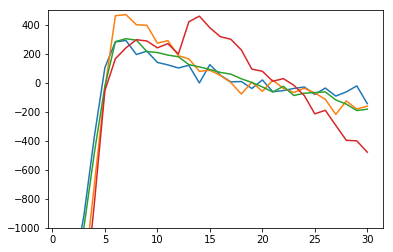

In [59]:
plt.figure()
for serie in data_sets[-1].series:
    x = serie.x
    y = serie.y
    plt.plot(x,y)
    plt.ylim(-1000,500)
    

In [60]:
## add all the new objects to the database
database.append_objs('wells', wells)
database.append_objs('classifications', classifications)
database.append_objs('data_sets', data_sets)
database.append_objs('figures', figures)

In [61]:
# update the database
database.save()


there is a previous version of " database_BstLF.pkl " file

do you want to update it? (y/n): y

file " database_BstLF.pkl " was updated


In [53]:
def select_objects(obj_list, att_name, att_values, not_in = False):
    """
    select the objects from obj_list which are "att_value" on attribute "att_name"
    if not_in  = True --> select the object which aren´t "att_value" on attribute "att_name"
    
    if att_value is list, then select the objects using OR logic over that att_values.
    
    if you want to select objects based on two att_names:
        - for AND logic selection, run this function with the second att_name 
          over the output list obtained with the first att_name 
        - for OR logic selection, run the function for each att_name over the 
          well_list. Then use nr_list function over them.
    
    well_list = list of well objects
    att_name = attribute name to select the wells
    att_values = attibute values to select the wells
    not_in = Boolean
        to perform positive or negative selection
    
    """    
    if type(att_name) != list:
        att_name = [att_name]
    
    if type(att_values) != list:
        att_values = [att_values]
    
    selected_objs = []
    for obj in obj_list:
        obj_value = obj.get_attrs(att_name)[0]
        
        if not_in == False:

            for att_value in att_values:
                if att_value in obj_value:      # if att_value is part or equal to obj_value
                    selected_objs.append(obj)
        else:
            select = True
            for att_value in att_values:
                if att_value in obj_value:   # if any att_value is part or equal to obj_value
                    select = False           # --> not select the object
                    
            if select == True:
                selected_objs.append(obj)
    
    print(str(len(selected_objs)),'objects were selected based on',str(att_name),'attribute')
    
    return(selected_objs)

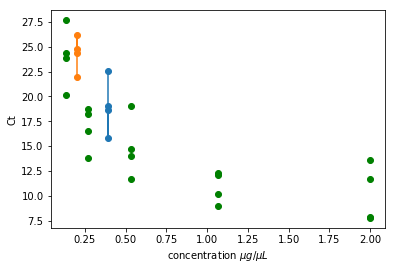

In [111]:
plot_parameter(data_sets[dataset_idx], 'Ct', ['Bst2', 'BstLF'], [0.39,0.2], x_att_name ='Bst_concentration')

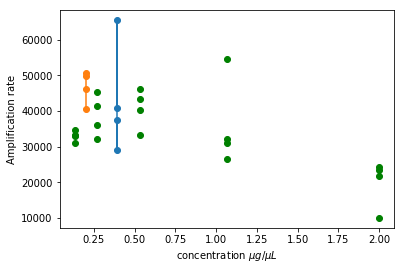

In [128]:
plot_parameter(data_sets[dataset_idx], 'Amplification rate', ['Bst2', 'BstLF'], [0.39,0.2], x_att_name ='Bst_concentration')

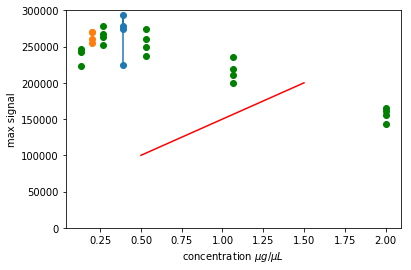

In [133]:
plot_parameter(data_sets[dataset_idx], 'max signal', ['Bst2', 'BstLF'], [0.39,0.2], x_att_name ='Bst_concentration')
plt.gca().set_ylim(0, 300000)
plt.gca().plot([0.5,1.5],[100000, 200000], '-r')

In [134]:
# select wells using AND logic
wells_HMB2=select_objects(wells, 's_name','BstHM')
wells_HMB2=select_objects(wells_HMB2, 's_name','B2')

# 1 create labels
label_wells = wells_HMB2
label_attr = ['s_name']  # list with the attribute names cathegories to use as well labels
labels, _, _ = get_attribute_labels(wells_HMB2 ,label_attr)

# 2 create cathegory objects, assign them to wells and create classification object 
classification_name = 'Rep1, BstHM in B2 well name classification'
classification = create_classification(label_wells, labels, classification_name)

20 objects were selected based on s_name attribute
10 objects were selected based on s_name attribute
non redundant list: 

0: 'BstHM-B2'
1: 'BstHM-D2-B2'
2: 'BstHM-D3-B2'
3: 'BstHM-D4-B2'
4: 'BstHM-D5-B2'

5 where created


wells in classification groups:

[ BstHM-B2 ] -->  ['C1', 'C2']
[ BstHM-D2-B2 ] -->  ['D1', 'D2']
[ BstHM-D3-B2 ] -->  ['E1', 'E2']
[ BstHM-D4-B2 ] -->  ['F1', 'F2']
[ BstHM-D5-B2 ] -->  ['G1', 'G2']


In [141]:
# Create concentration vs Ct dataset
d_name = 'Bst concentration vs Ct'
d_groups = ['BstLF','Bst2','BstHM']
d_wells = []
d_series = []
d_x_name = 'BstLF concentration'
d_y_name = 'Ct'
d_x_units = '$\mu g/ \mu L$'

data_sets.append(Data_set(d_name, d_groups, d_wells, d_series, d_x_name, d_y_name, d_x_units, y_units='', y_max=0, threshold=thr_value))

In [42]:
# create and assign a parameter data serie
gs_clf = classification
ds_name = 'BstHM-B2'
p_serie = param_data_serie(gs_clf, 'Ct', 'Bst_concentration', ds_name)
#(wells, yp_name, x_att_name ='Bst_concentration', ds_name, g_name)

data_sets[-1].series.append(p_serie)

NameError: name 'Data_serie' is not defined

In [171]:
data_sets[-1].series[0].__dict__

{'group': ['BstHM-B2',
  'BstHM-D2-B2',
  'BstHM-D3-B2',
  'BstHM-D4-B2',
  'BstHM-D5-B2'],
 'name': 'BstHM-B2',
 'well': [<__main__.Well at 0x186bdc2e6d8>,
 'well_id': [['C1', 'Bst_Units_1_data.xlsx'],
  ['C2', 'Bst_Units_1_data.xlsx'],
  ['D1', 'Bst_Units_1_data.xlsx'],
  ['D2', 'Bst_Units_1_data.xlsx'],
  ['E1', 'Bst_Units_1_data.xlsx'],
  ['E2', 'Bst_Units_1_data.xlsx'],
  ['F1', 'Bst_Units_1_data.xlsx'],
  ['F2', 'Bst_Units_1_data.xlsx'],
  ['G1', 'Bst_Units_1_data.xlsx'],
  ['G2', 'Bst_Units_1_data.xlsx']],
 'x': [2.0,
  2.0,
  1.066666667,
  1.066666667,
  0.533333333,
  0.533333333,
  0.266666667,
  0.266666667,
  0.133333333,
  0.133333333],
 'y': [7.840417094524441,
  7.7828348192175705,
  8.976009825620014,
  10.187011227311606,
  11.69858120777075,
  13.967375420153257,
  13.772977346107417,
  18.245725995092474,
  24.39898623167684,
  23.82158100447245]}

fitted <function f_reciprocal at 0x00000186BFD2F158> parameter values [4.24391331 0.72982168 5.48417601]


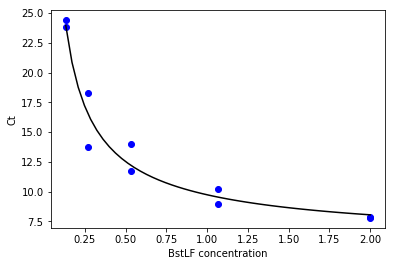

In [212]:
dser_num = 0  # number of the Data_serie to be used
p_fit = fit_concentration(data_sets[-1],dser_num)

fitted <function f_exp_rec at 0x00000186BE4E49D8> parameter values [25.560866   58.57987334  8.72026885]


array([25.560866  , 58.57987334,  8.72026885])

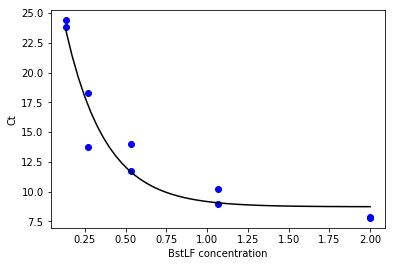

In [213]:
dser_num = 0
fit_concentration(data_sets[-1],dser_num, function=f_exp_rec)


It seem it behaves like reciprocal and not like exponential.<br>
Now, left to compute the bst2 concentration value with the fitted function and assign it to them. <br>
Then perform the same with the other series and compute the mean.

In [211]:
def fit_concentration(d_set,d_serie_num, function=f_reciprocal):
    
    serie = d_set.series[d_serie_num]
    x = serie.x
    y = serie.y
    
    x_fx, p_fit = function_fit(x, y,init = 0, func = function, p_start= [1,2,0], 
                         param_bounds=([0,0.1,0],[np.inf,np.inf,np.inf]), display = False)
    
    x_fit = np.linspace(x[0],x[-1])
    y_fit = function(x_fit, p_fit[0],p_fit[1],p_fit[2])
    
    plt.figure()
    plt.plot(x,y,'bo', label = serie.name)
    plt.plot(x_fit,y_fit, 'k-', label = 'fitting')
    plt.xlabel(d_set.x_name)
    plt.ylabel(d_set.y_name)
    
    return(p_fit)

In [43]:
def param_data_serie(clf, yp_name, x_att_name, ds_name):
    #(wells, yp_name, x_att_name ='Bst_concentration', ds_name):
    """
    clf: classification object
        classification object to be used 
    
    yp_name : str
        name of the parameter (from "well.analysis") to be used in the y axys 
   
    x_att_name: str
        well attribute name to be used in the x axys
        
    ds_name : dataset name
    
    
    """
    x_list = list()
    y_list = list()
    
    for well in clf.wells:
        
        for param in well.analysis:
                if param.name == yp_name:
                    
                    y = param.value
                    break

        
        x = getattr(well, x_att_name)
            
        x_list.append(x)
        y_list.append(y)
        
    
    g_names = list(clf.groups.keys())
    
    data_serie = rdm.Data_serie(x_list, y_list, ds_name, g_names, clf.wells, clf.wells_id)
    return(data_serie)
    

Super!! <br>
ahora lo que hay que hacer es ajustar una función para cada uno de estos tres, y en cada caso ver que pasa si se agrupan por buffer --> 3 ajustes por cada parametro (buffer B2, Buffer BstLF y sin distinguir).
con eso se puede calcular la función inversa y el valor apropiado de concentración asociado.
luego se obtiene el optimo tbn.
repetir esto para los otros set de datos y luego promediar.


In [189]:
def f_reciprocal(x, a, b, c):
    """
    compute the reciprocal function value with given parameters
    
    Parameters
    ----------
        x: int or vector
            independent variable values
                
        a: double
            numerator parameter
        
        b: double
           exponent parameter. b = [1, inf]
        
        c: double
           y asymptotic parameter
           
        
    Returns
    -------
        evaluated reciprocal function with the given parameters for the given x
    """
    fx = a*(x**(-b))+c
    
    return(fx)

In [198]:
def f_exp_rec(x, a, b, c):
    """
    compute the exponential reciprocal function value with given parameters
    
    Parameters
    ----------
        x: int or vector
            independent variable values
                
        a: double
            numerator parameter
        
        b: double
           denominator parameter. b = [1, inf]
        
        c: double
           y asymptotic parameter
           
        
    Returns
    -------
        evaluated reciprocal function with the given parameters for the given x
    """
    fx = a/(b**(x))+c
    
    return(fx)

In [ ]:
def plot_param_ds(data_serie, p_marker):
    """
    
    data_serie: Data_serie object
    
    
    p_marker: plot marker to be used
    
    
    """
    plt.plot(data_serie.x, data_serie.y, p_marker)
    plt.xlabel('concentration $\mu g/ \mu L$')
    plt.ylabel(param_name)#('C$_t$')
    #return(fig,ax)

In [127]:
def plot_parameter(data_set, param_name, other_g, x_aux, x_att_name ='Bst_concentration'):
   #plot_parameter(data_sets[dataset_idx], param_name, ['Bst2', 'BstLF'], [0.39,0.2], x_att_name ='Bst_concentration')
    """
    
    param_name : str
        name of the parameter to be used in the y axys
   
    x_att_name: str
        well attribute name to be used in the x axys
        
    other_g: list
        names (or parts os the name) of other groups to be included
        e.g. ['Bst2', 'BstLF']
        
    x_aux: list
        list with the x value of each other_group.
    
    
    """

    x_list = []
    y_list = []
    
    x_other = {}
    y_other = {}
    for name in other_g:
        x_other[name] = list()
        y_other[name] = list()
    
    for serie in data_set.series:
        well = serie.well

        for param in well.analysis:
                if param.name == param_name:
                    
                    if type(param.value) == list:
                        p_value = param.value[1]   #take the "original" value
                        break
                    
                    else:
                        p_value = param.value
                        break

        
        if x_att_name in list(well.__dict__):

            x = getattr(well, x_att_name)
                        
            x_list.append(x)
            y_list.append(p_value)
            
        else:
            
            for i in range(0, len(other_g)):
                if other_g[i] in well.s_name:
                    y_other[other_g[i]].append(p_value)
                    x_other[other_g[i]].append(x_aux[i])



    fig, ax = plt.figure()
    plt.plot(x_list,y_list, 'go')
    for name in other_g:
        plt.plot(x_other[name], y_other[name], marker = 'o')
    plt.xlabel('concentration $\mu g/ \mu L$')
    plt.ylabel(param_name)#('C$_t$')
    #return(fig,ax)

In [613]:
a = [param.name for param in data_sets[dataset_idx].series[0].well.analysis]
print(a)

['Amplification response region', 'Amplification rate', 'max signal', ['a', 'b', 'N'], 'Ct']


In [663]:
database.__dict__

{'description': 'this database include experiments and analysis performed around home made BstLF home made production and testing on RT-LAMP COVID detection',
 'elements': {'classifications': [<__main__.Classification at 0x1815f0ebc88>],
  'data_sets': [<__main__.Data_set at 0x18162716dd8>],
  'figures': [<__main__.Figure at 0x18160dfef60>,
  'wells': [<__main__.Well at 0x1815e6389b0>,
   <__main__.Well at 0x1815ecf10f0>]},
 'filename': 'database_BstLF',
 'folder': 'Real_time_data/Database/',
 'list_names': ['wells', 'classifications', 'data_sets', 'figures'],
 'name': 'BstLF COVID experiments'}

In [214]:
database.elements['wells'] = wells
database.elements['classifications'] = classifications
database.elements['data_sets'] = data_sets
database.elements['figures'] = figures
save_database(database)


there is a previous version of " database_BstLF.pkl " file

do you want to update it? (y/n): y

file " database_BstLF.pkl " was updated
